# Economic Data Analysis | Welcome Survey

Let's get to know the class!

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'data/'

plt.rcParams.update({
    'font.family': 'serif',              # Set the font family
    'font.serif': ['Times New Roman'],   # Use a specific serif font
    'font.size': 16,                     # Set the general font size
    'axes.titlesize': 20,                # Set the font size of the title
    'axes.labelsize': 16,                # Set the font size of axis labels
    'font.style': 'italic',              # Set the font style to italic
    'figure.dpi': 400   
})

category_color_pal = sns.color_palette("hls", 8)#sns.color_palette("husl", 8)
continuous_color_pal = sns.color_palette("rocket_r", as_cmap=True)

## Data Cleaning

In [6]:
datasets = ['Fall_2025_Survey', 'S26']
file_name = datasets[1]
data = pd.read_csv(file_path + file_name + '_raw.csv')

# Date
data['When is your birthyear?'] = pd.to_datetime(data['When is your birthday?'], errors='coerce').dt.year
data['When is your birthmonth?'] = pd.to_datetime(data['When is your birthday?'], errors='coerce').dt.month

# Color
color_mapping = {
    # Standardize capitalization
    'blue': 'Blue',
    'purple': 'Purple', 
    'green': 'Green',
    'red': 'Red',
    'yellow': 'Yellow',
    'pink': 'Pink',
    'orange': 'Orange',
    'black': 'Black',
    
    # Fix typos
    'Greeen': 'Green',
    
    # Group light/dark variations with main color
    'Light Blue': 'Blue',
    'Dark blue': 'Blue',
    'Navy blue': 'Blue', 
    'Navy Blue': 'Blue',
    'Baby Blue': 'Blue',
    
    'Dark Green': 'Green',
    'Dark green': 'Green', 
    'dark green': 'Green',
    'Melon Green': 'Green',  # Assuming this is a green shade
    
    'Deep Red': 'Red',
    
    # Standardize other colors
    'white': 'White',
    'Grey': 'Gray',  # or keep as 'Grey' if you prefer
    'Gold': 'Yellow',  # Gold is yellowish
    
    # Handle the complex answer - they said green as backup
    'Black (if that doesn’t count then probably green)': 'Black',
}
data['What is your favorite color?'] = data['What is your favorite color?'].replace(color_mapping)

# Distance
data['Approximately how many miles away from Pittsburgh is your hometown?'] = data['Approximately how many miles away from Pittsburgh is your hometown?'].str.extract(r'(\d+(?:\.\d+)?)', expand=False).astype(float)

# Save
data.to_csv(file_path + file_name + '.csv')

/var/folders/v7/n92bbkrn50x_rhkvsgm29llc0000gn/T/ipykernel_99987/3804551674.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['When is your birthyear?'] = pd.to_datetime(data['When is your birthday?'], errors='coerce').dt.year
/var/folders/v7/n92bbkrn50x_rhkvsgm29llc0000gn/T/ipykernel_99987/3804551674.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['When is your birthmonth?'] = pd.to_datetime(data['When is your birthday?'], errors='coerce').dt.month


## Load Survey Data

In [4]:
data = pd.read_csv(file_path + 'Fall_2025_Survey.csv')

## Hometown Distance

How far away are you coming from?

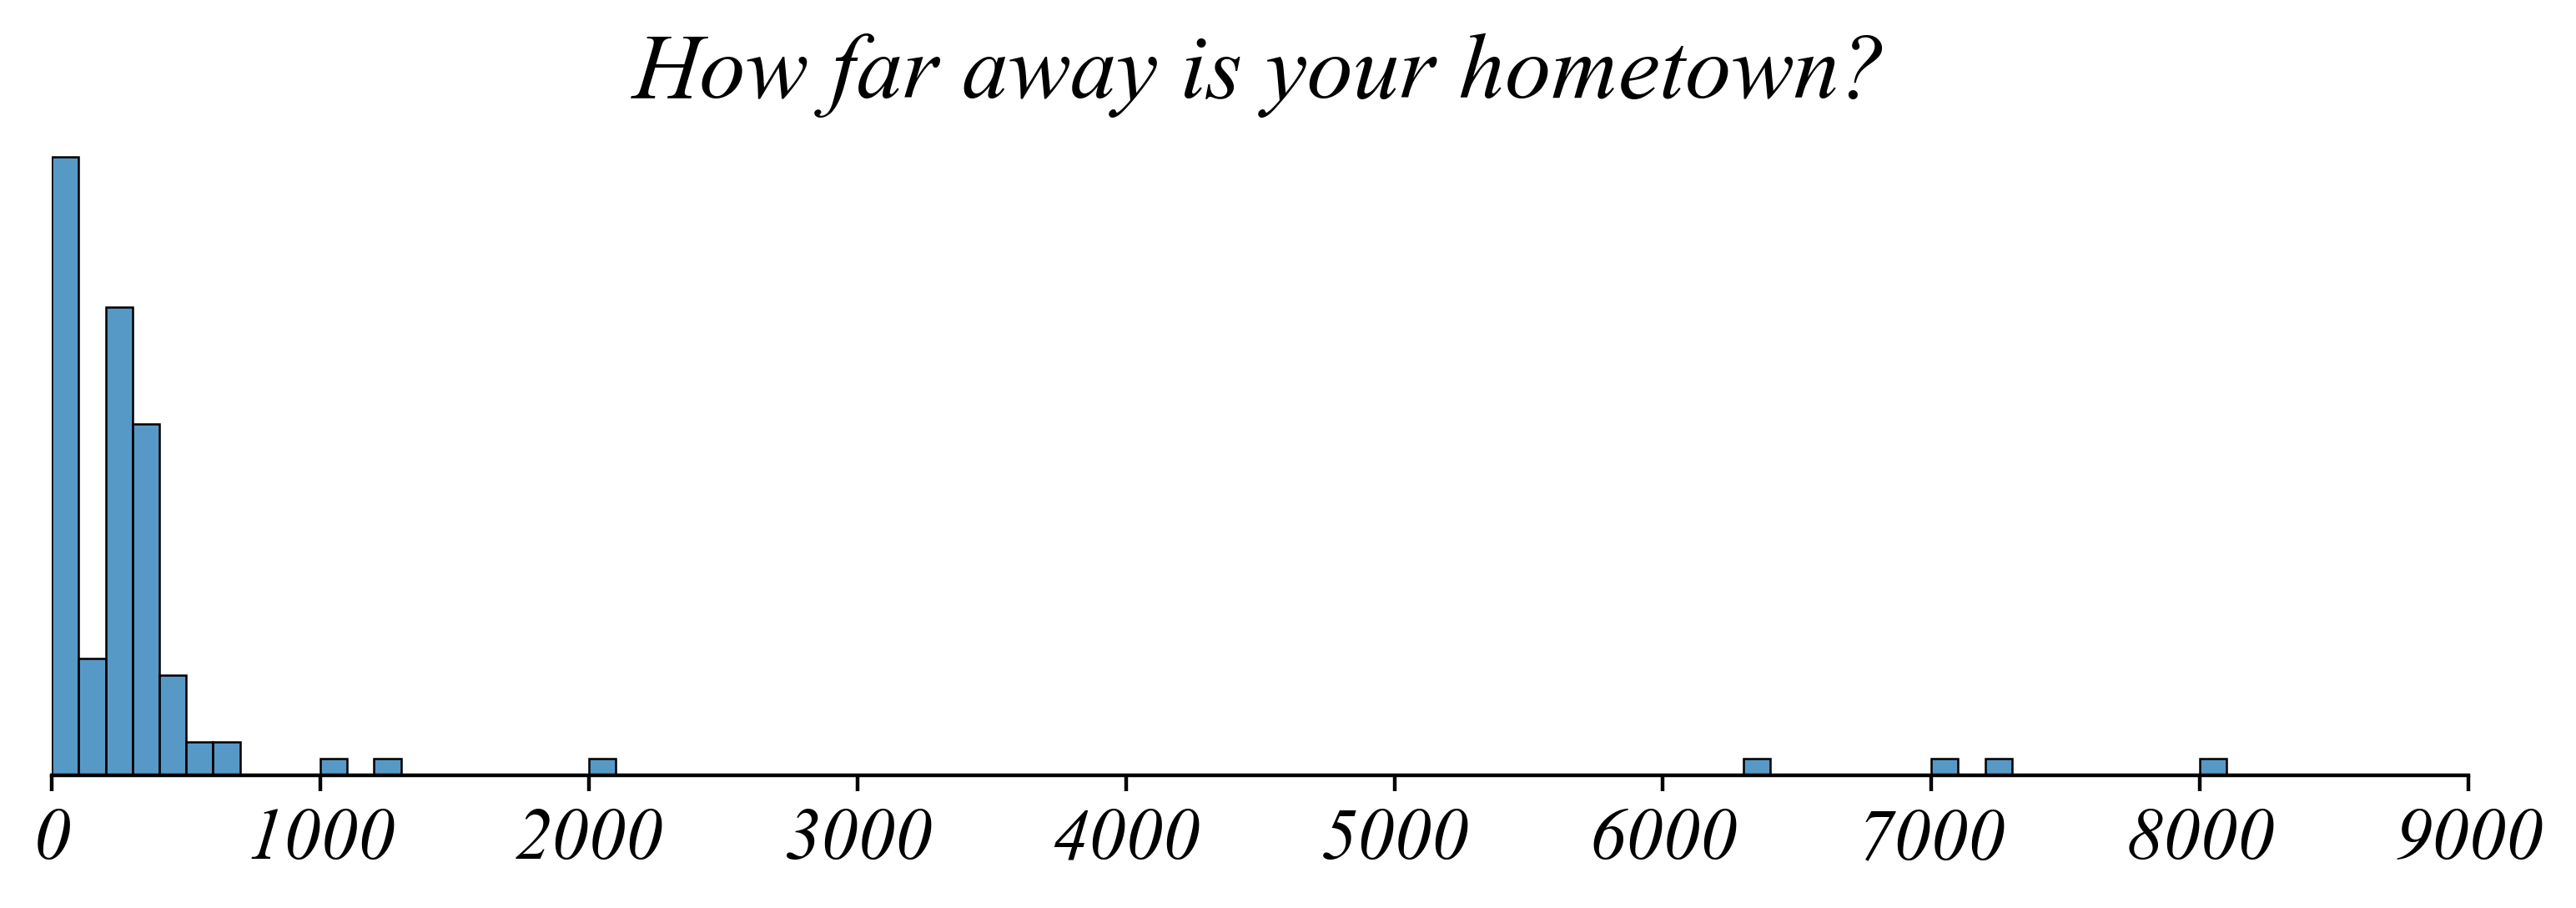

In [50]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.histplot(data=data, bins=range(0,9000,100),
    x='Approximately how many miles away from Pittsburgh is your hometown?')

# Styling
plt.title('How far away is your hometown?')
plt.xlabel('')
plt.xlim(0,9000)
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, right=True, top=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_01.png')

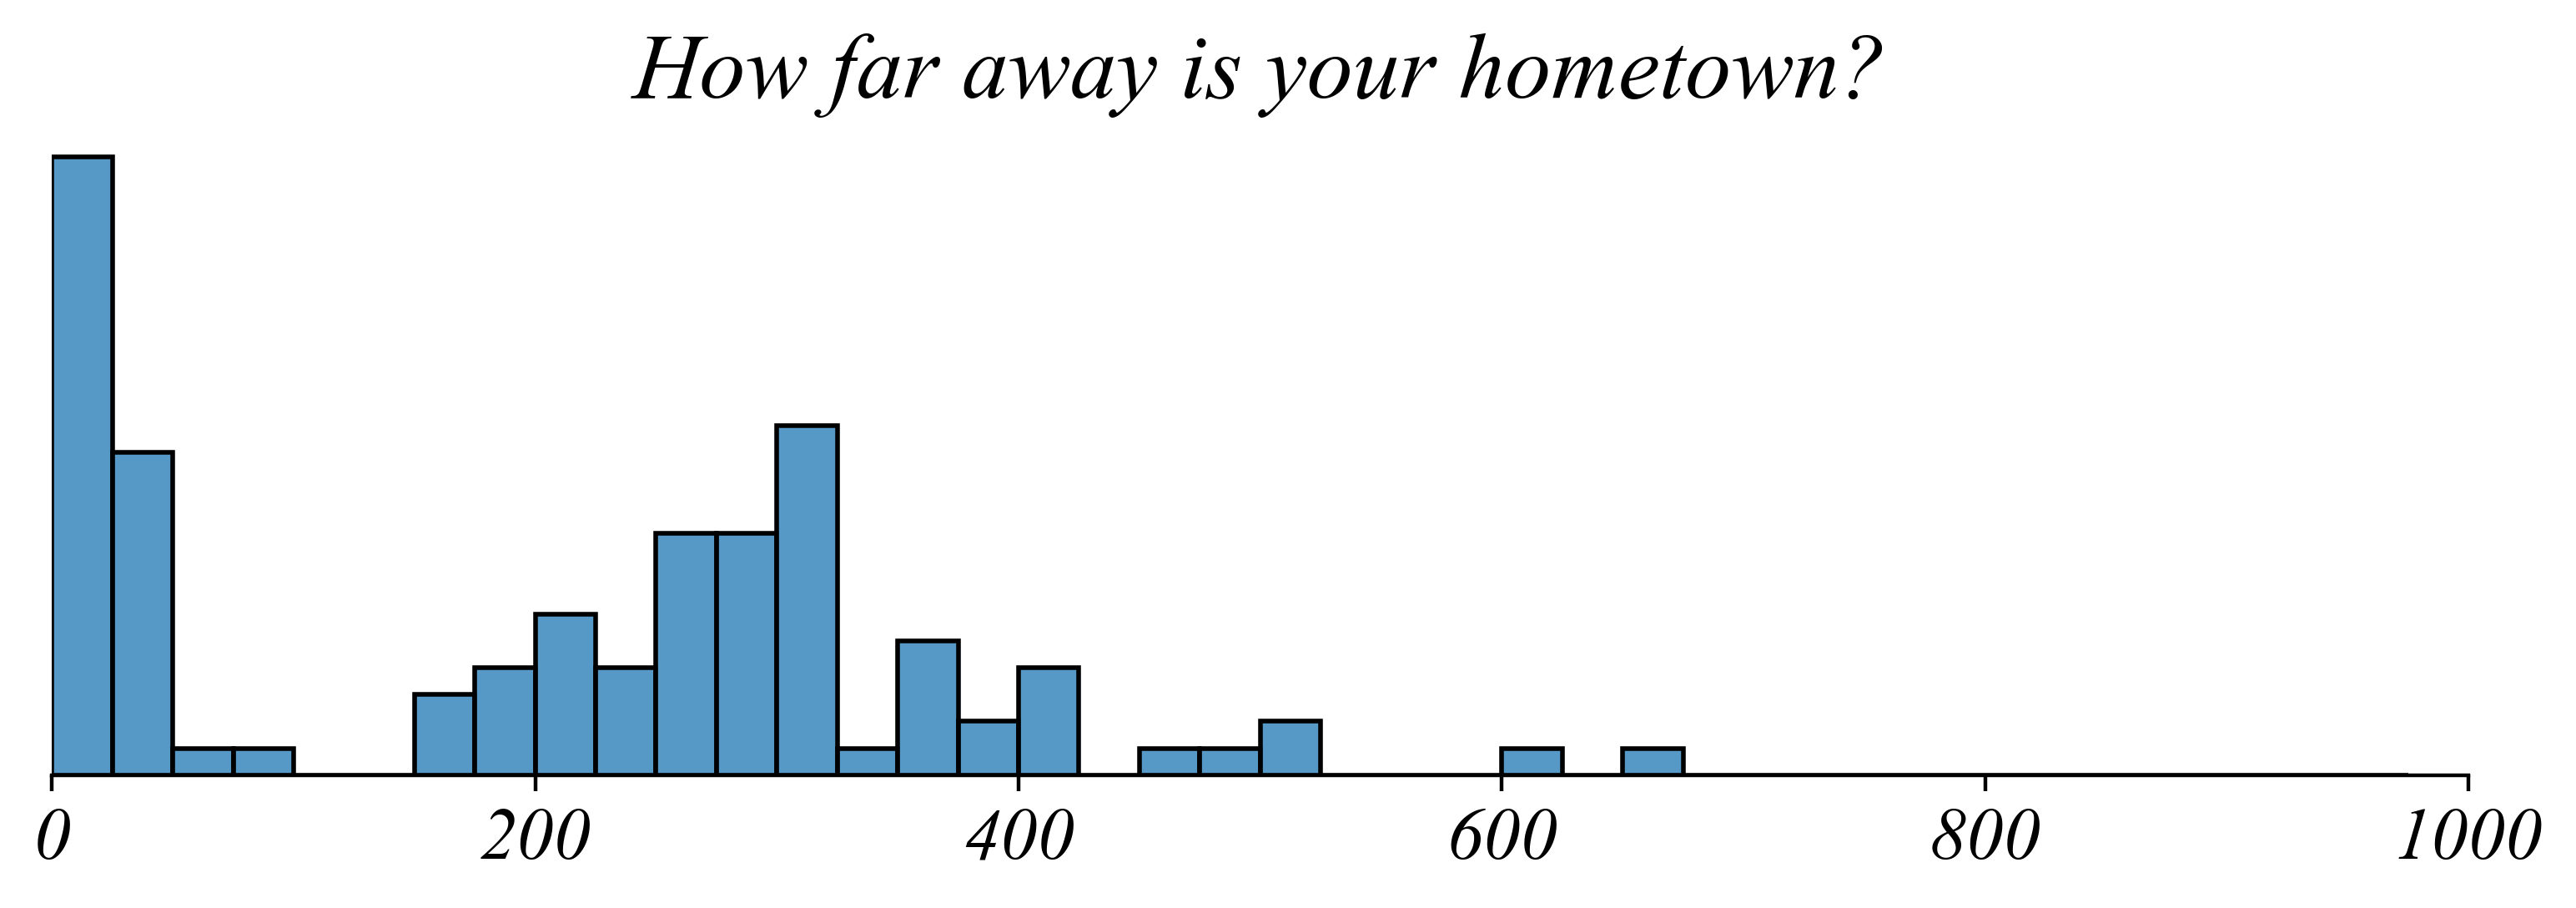

In [49]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.histplot(data=data, bins=range(0,1000,25),
    x='Approximately how many miles away from Pittsburgh is your hometown?')

# Styling
plt.title('How far away is your hometown?')
plt.xlabel('')
plt.xlim(0,1000)
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, right=True, top=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_02.png')

## Birthday

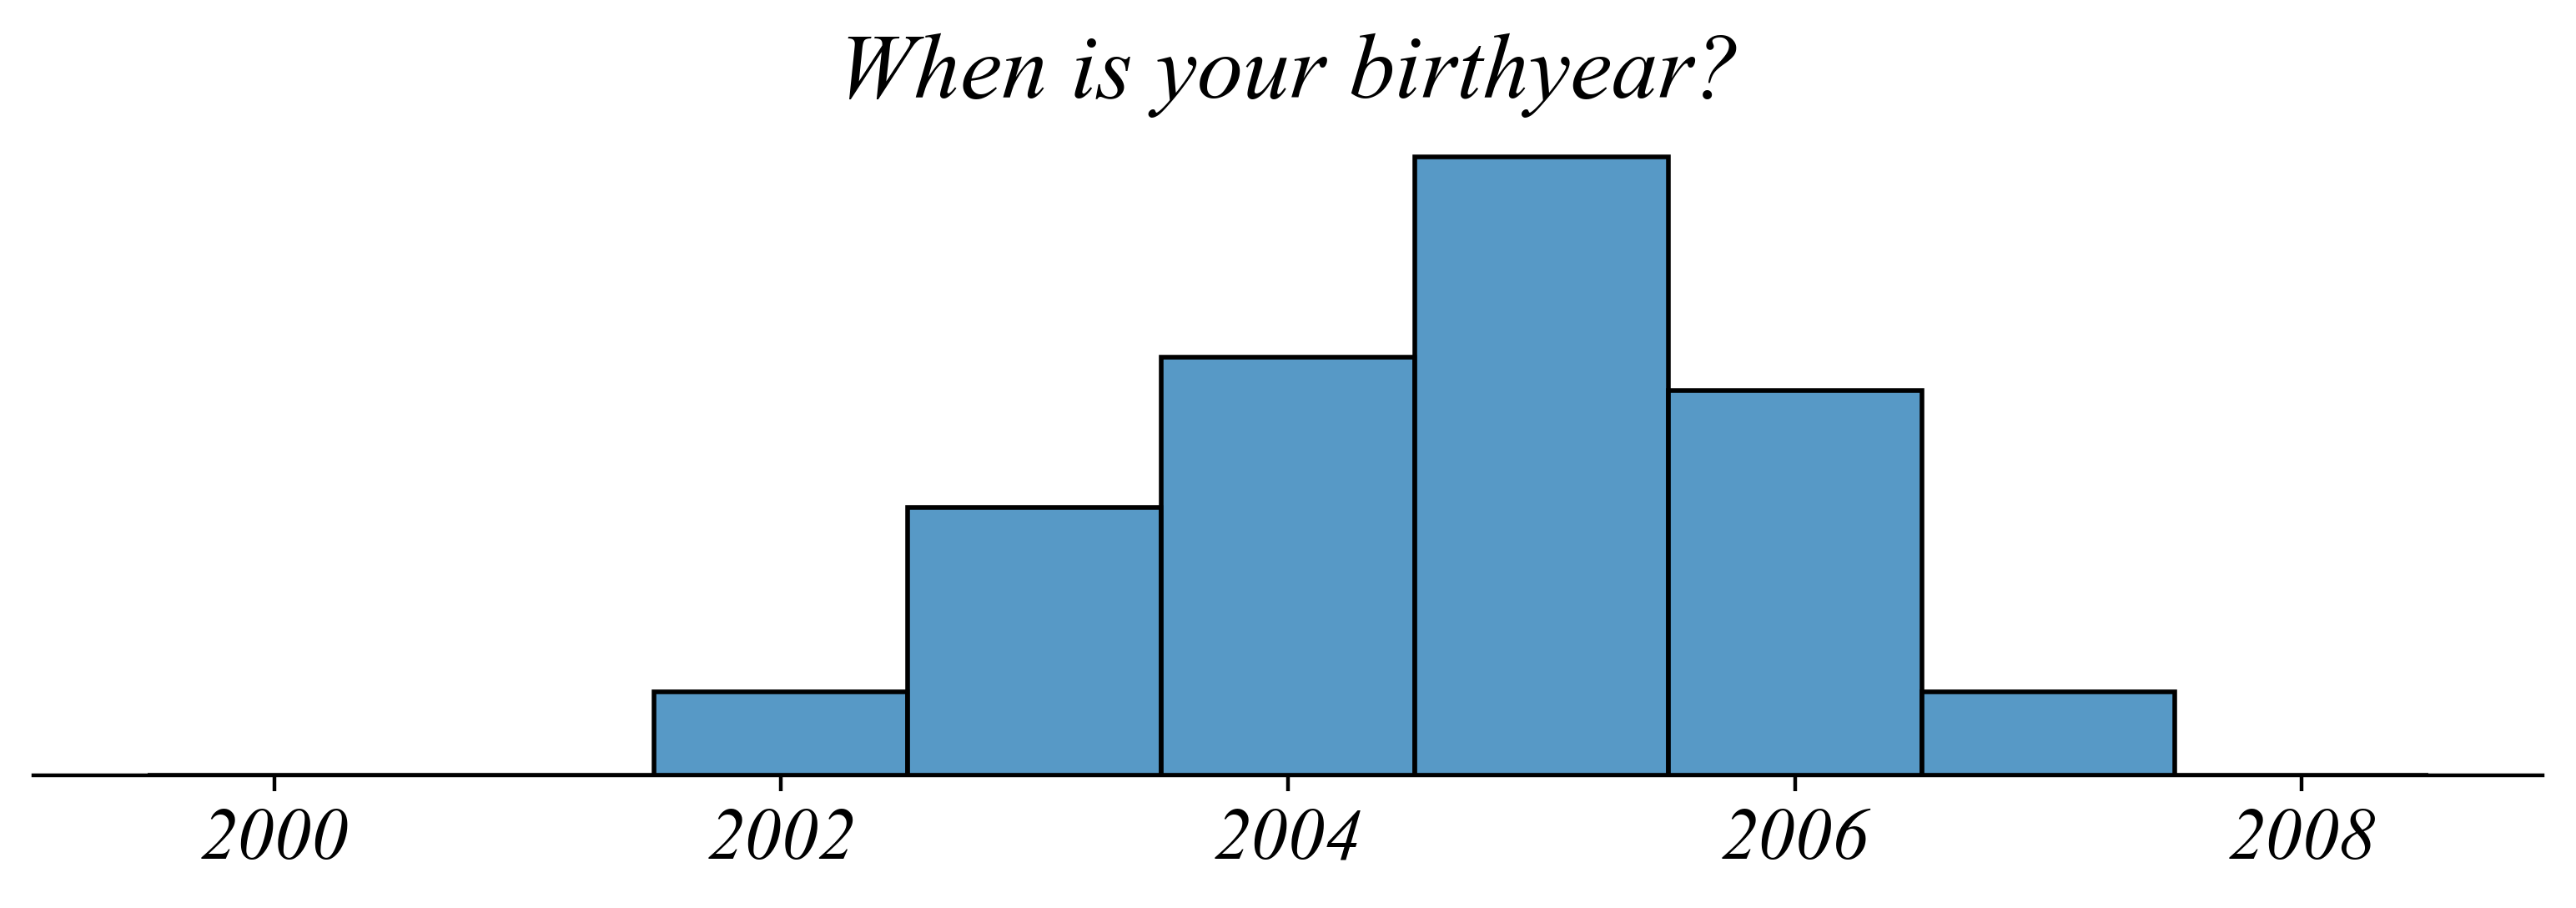

In [48]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
bins = np.arange(2000,2010,1)
sns.histplot(data=data, x='When is your birthyear?', bins=bins-0.5)

# Styling
plt.title('When is your birthyear?')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, right=True, top=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_03.png')

## Major

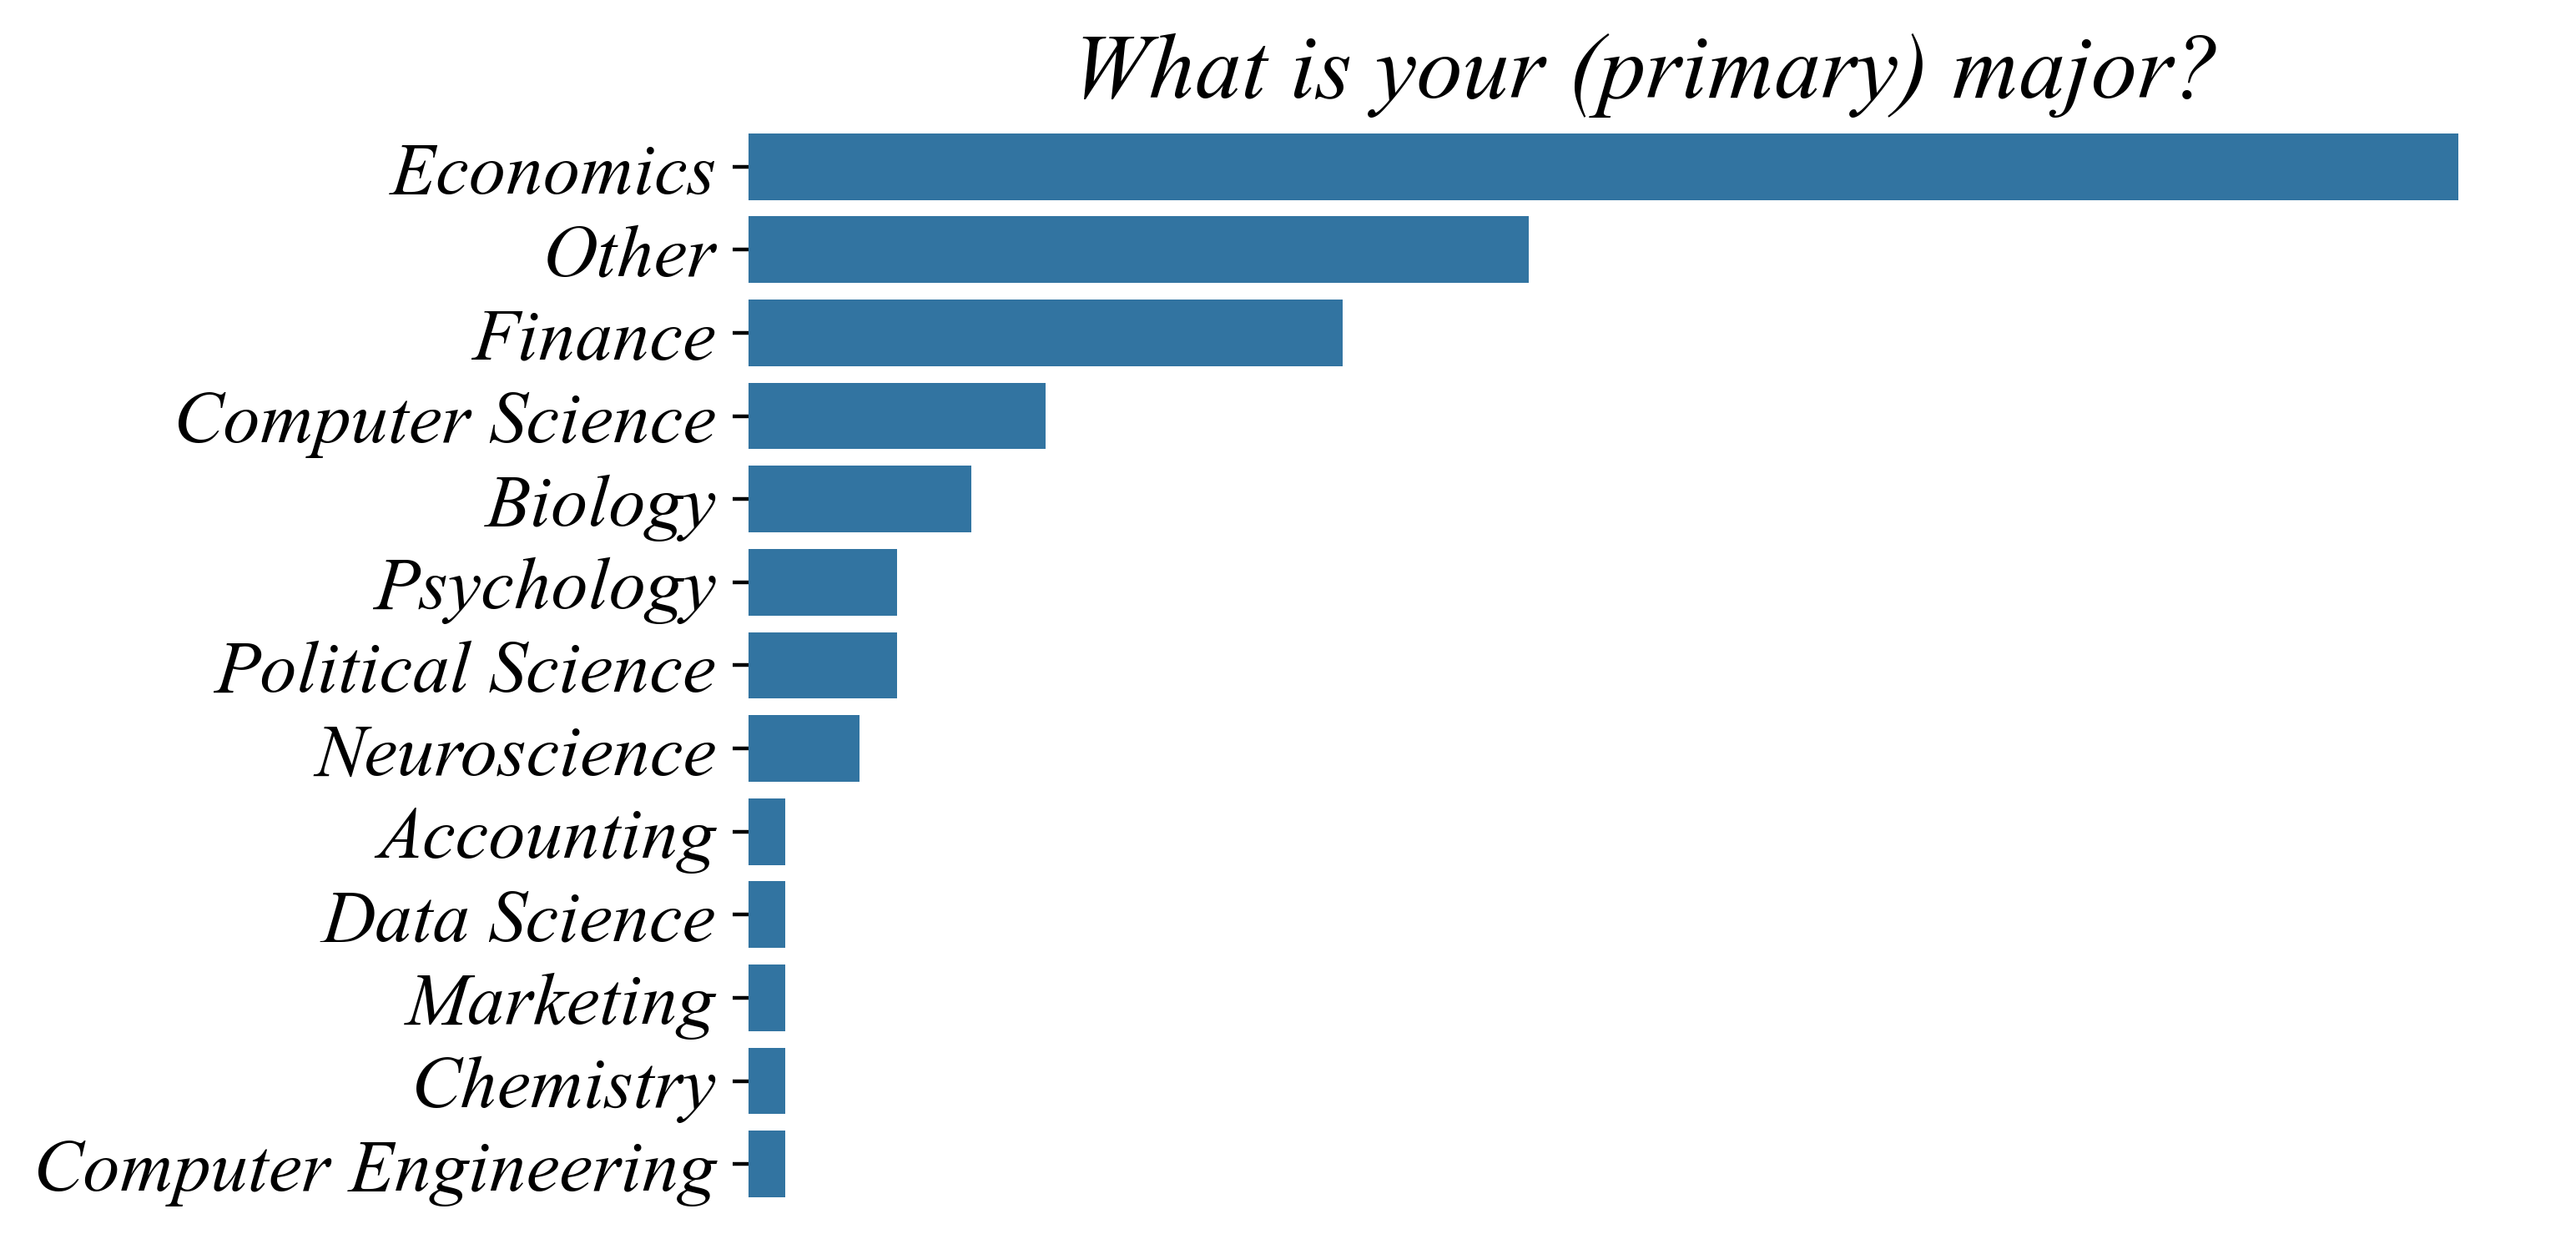

In [46]:
# Figure
plt.figure(figsize=(8, 4), dpi=400)
order = data['What is your (primary) major?'].value_counts().index
sns.countplot(data=data, y='What is your (primary) major?', order=order)

# Styling
plt.title('What is your (primary) major?')
plt.xlabel('')
plt.xticks([])
plt.ylabel('')
sns.despine(left=True, right=True, top=True, bottom=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_04.png')

## Statistics

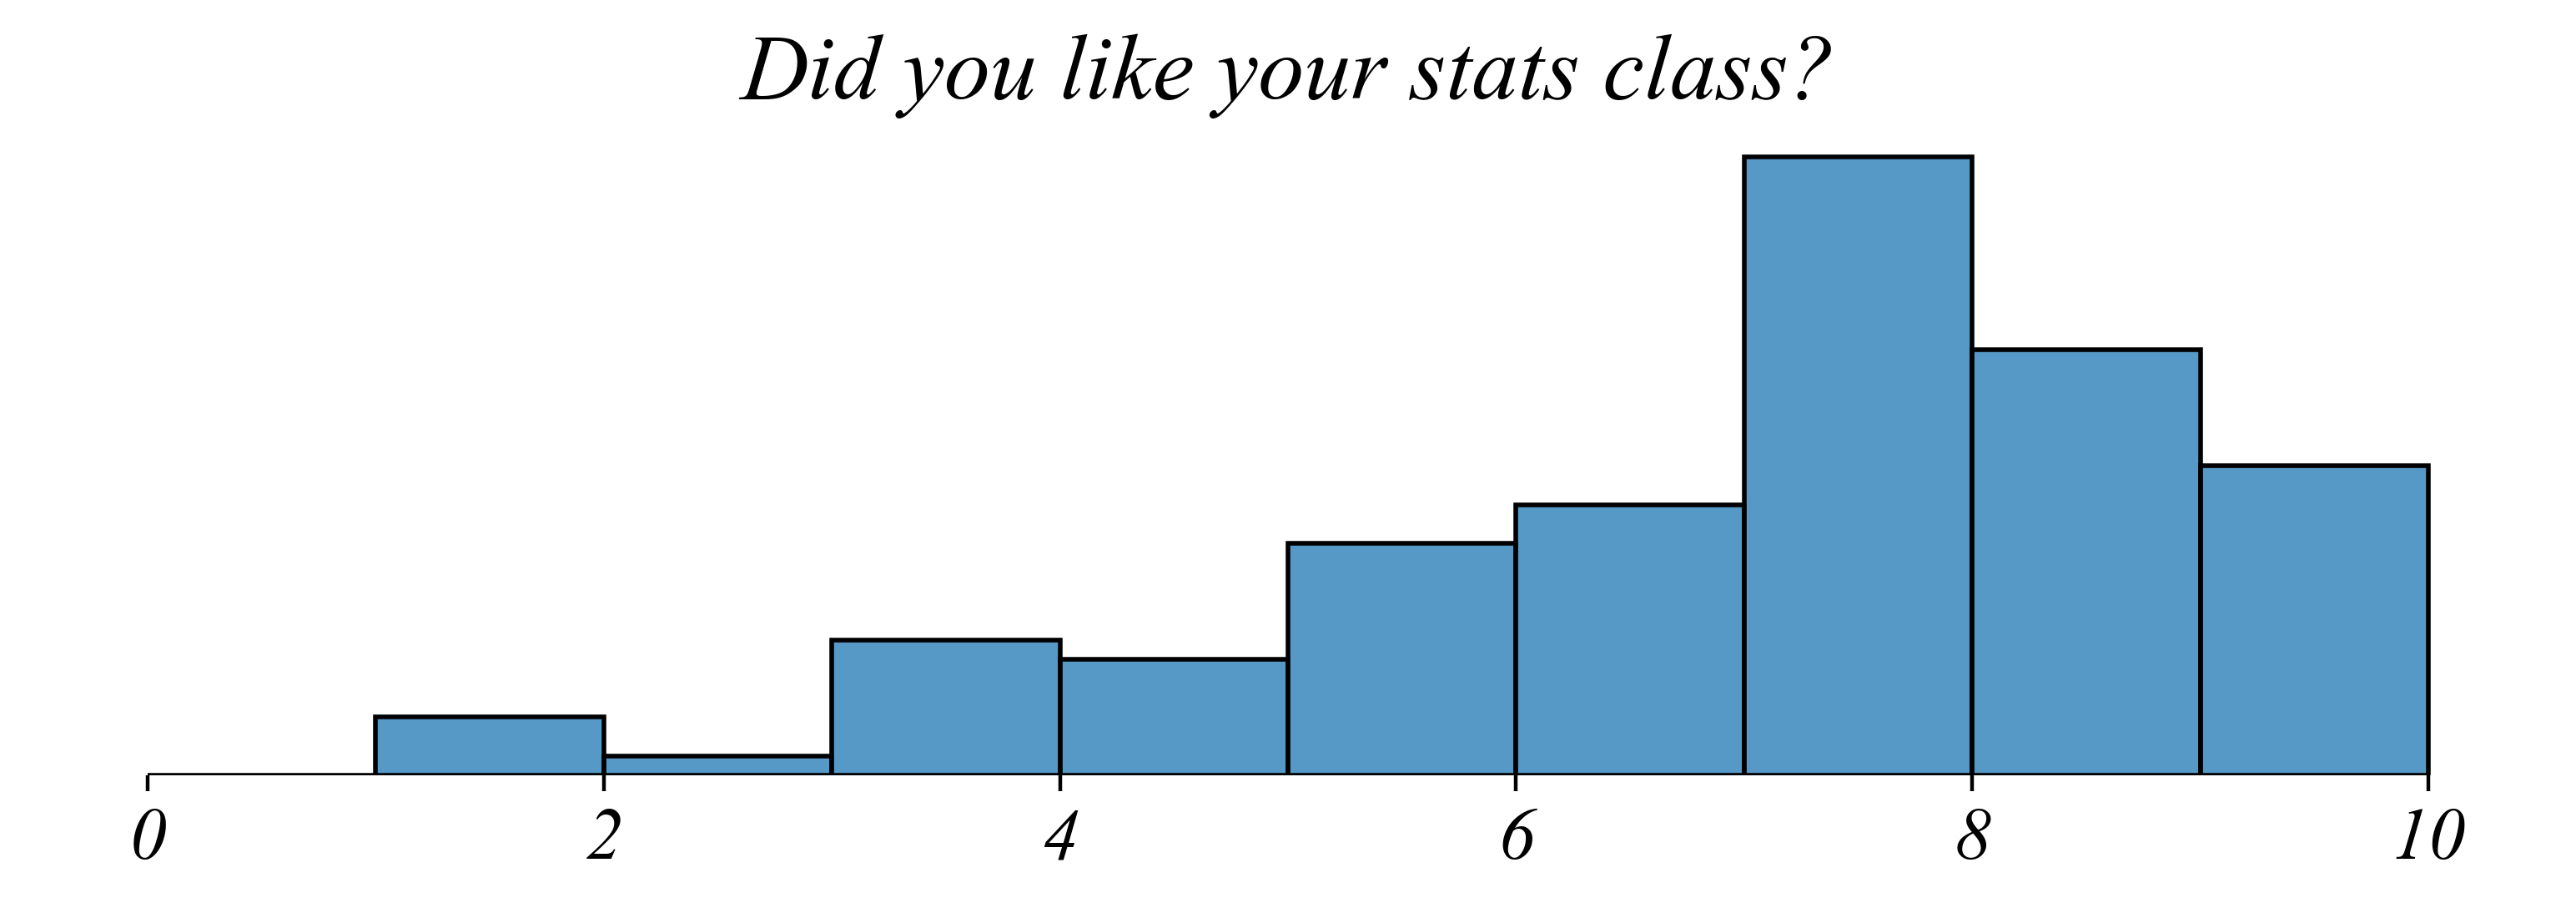

In [53]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.histplot(data=data, x='How much did you like your statistics class?', bins=range(0,11,1))

# Styling
plt.title('Did you like your stats class?')
plt.xlabel('')
plt.yticks([])
plt.ylabel('')
sns.despine(left=True, right=True, top=True, bottom=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_05.png')

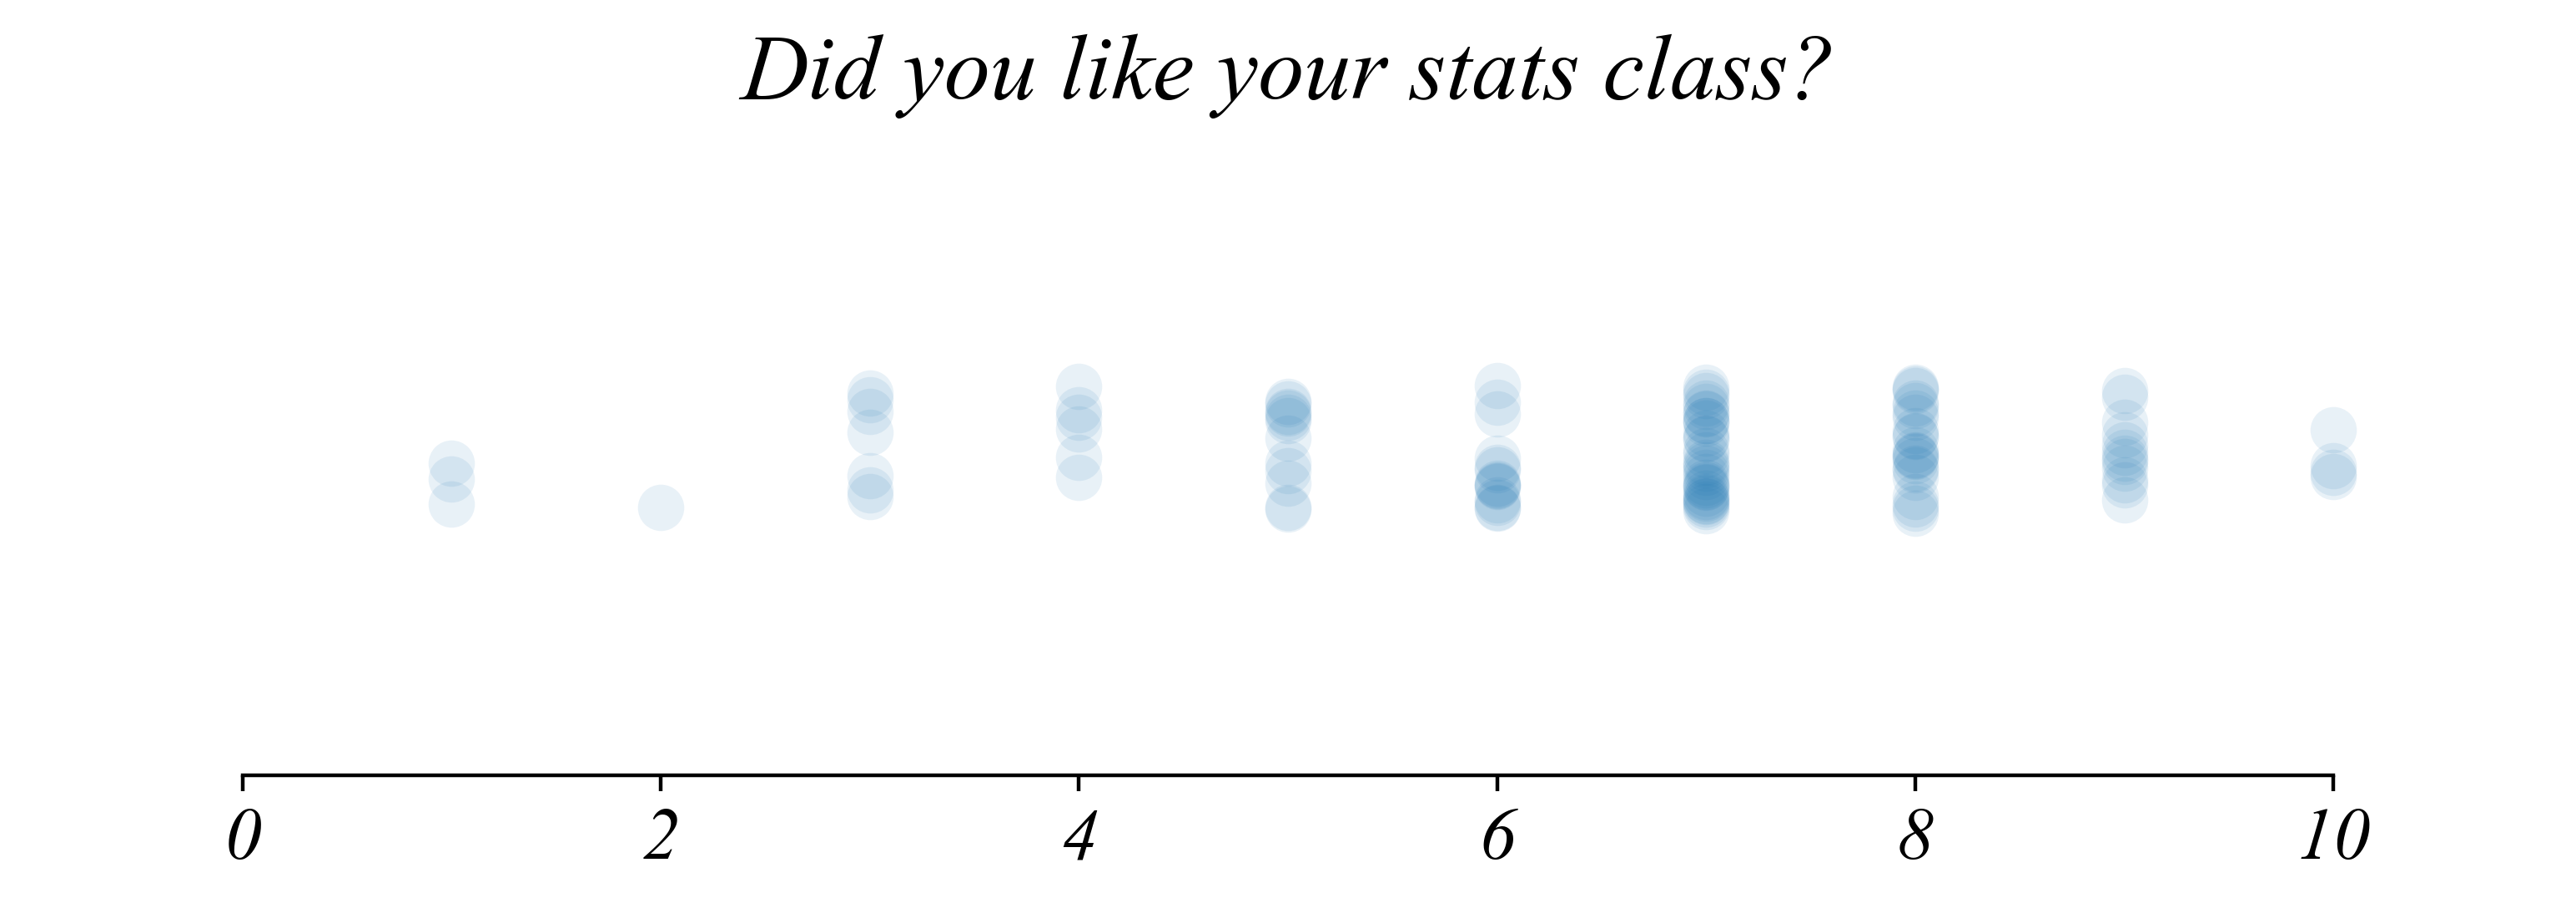

In [68]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.stripplot(data=data, x='How much did you like your statistics class?', alpha=0.1, s=10)

# Styling
plt.title('Did you like your stats class?')
plt.xlabel('')
plt.xlim(-1,11)
plt.yticks([])
plt.ylabel('')
sns.despine(left=True, right=True, top=True, bottom=False, trim=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_05_a.png')

## Statistics and Economic Data Analysis

<Figure size 3200x3200 with 0 Axes>

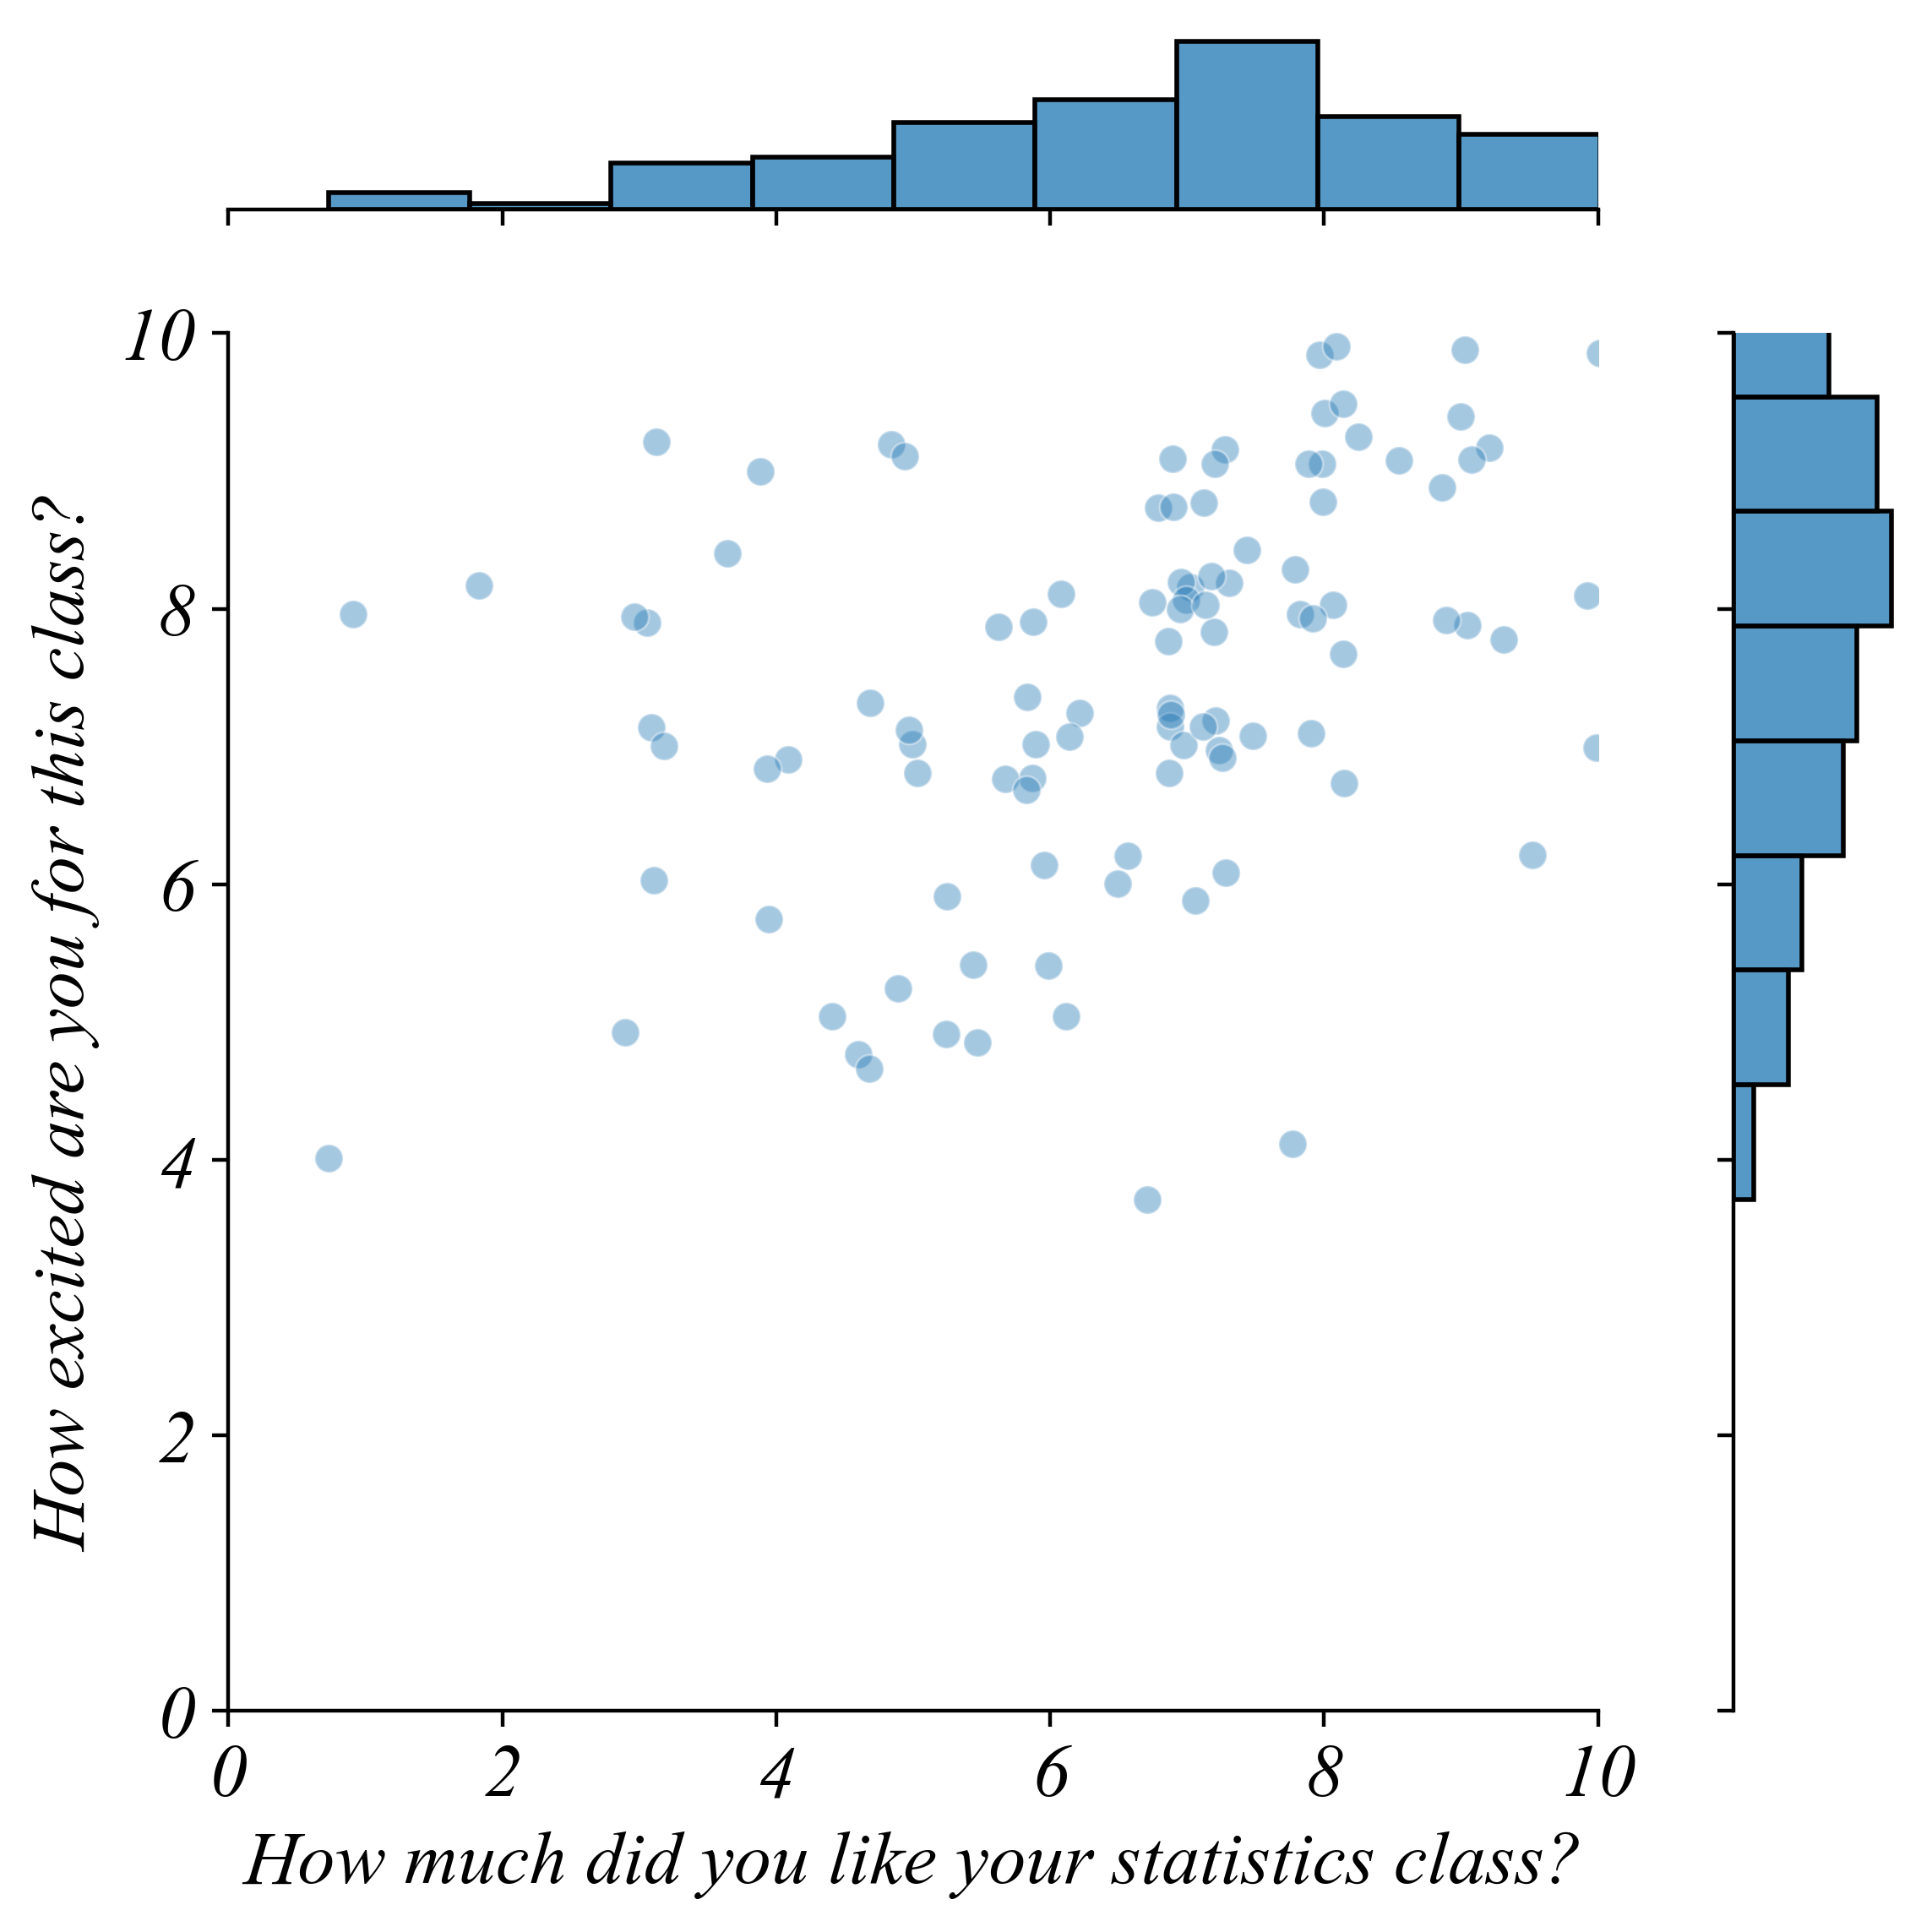

In [153]:
# Figure
plt.figure(figsize=(8, 8), dpi=400)

x_jitter = data['How much did you like your statistics class?'] + np.random.normal(0, 0.2, len(data))
y_jitter = data['How excited are you for this class?'] + np.random.normal(0, 0.2, len(data))

sns.jointplot(x=x_jitter, y=y_jitter, alpha=0.4)

# Styling
plt.xlabel('How much did you like your statistics class?')
plt.xlim(0,10)
plt.ylabel('How excited are you for this class?')
plt.ylim(0,10)
plt.tight_layout()

# Save
plt.savefig('i/survey_06.png')

## Economic Data and Excel

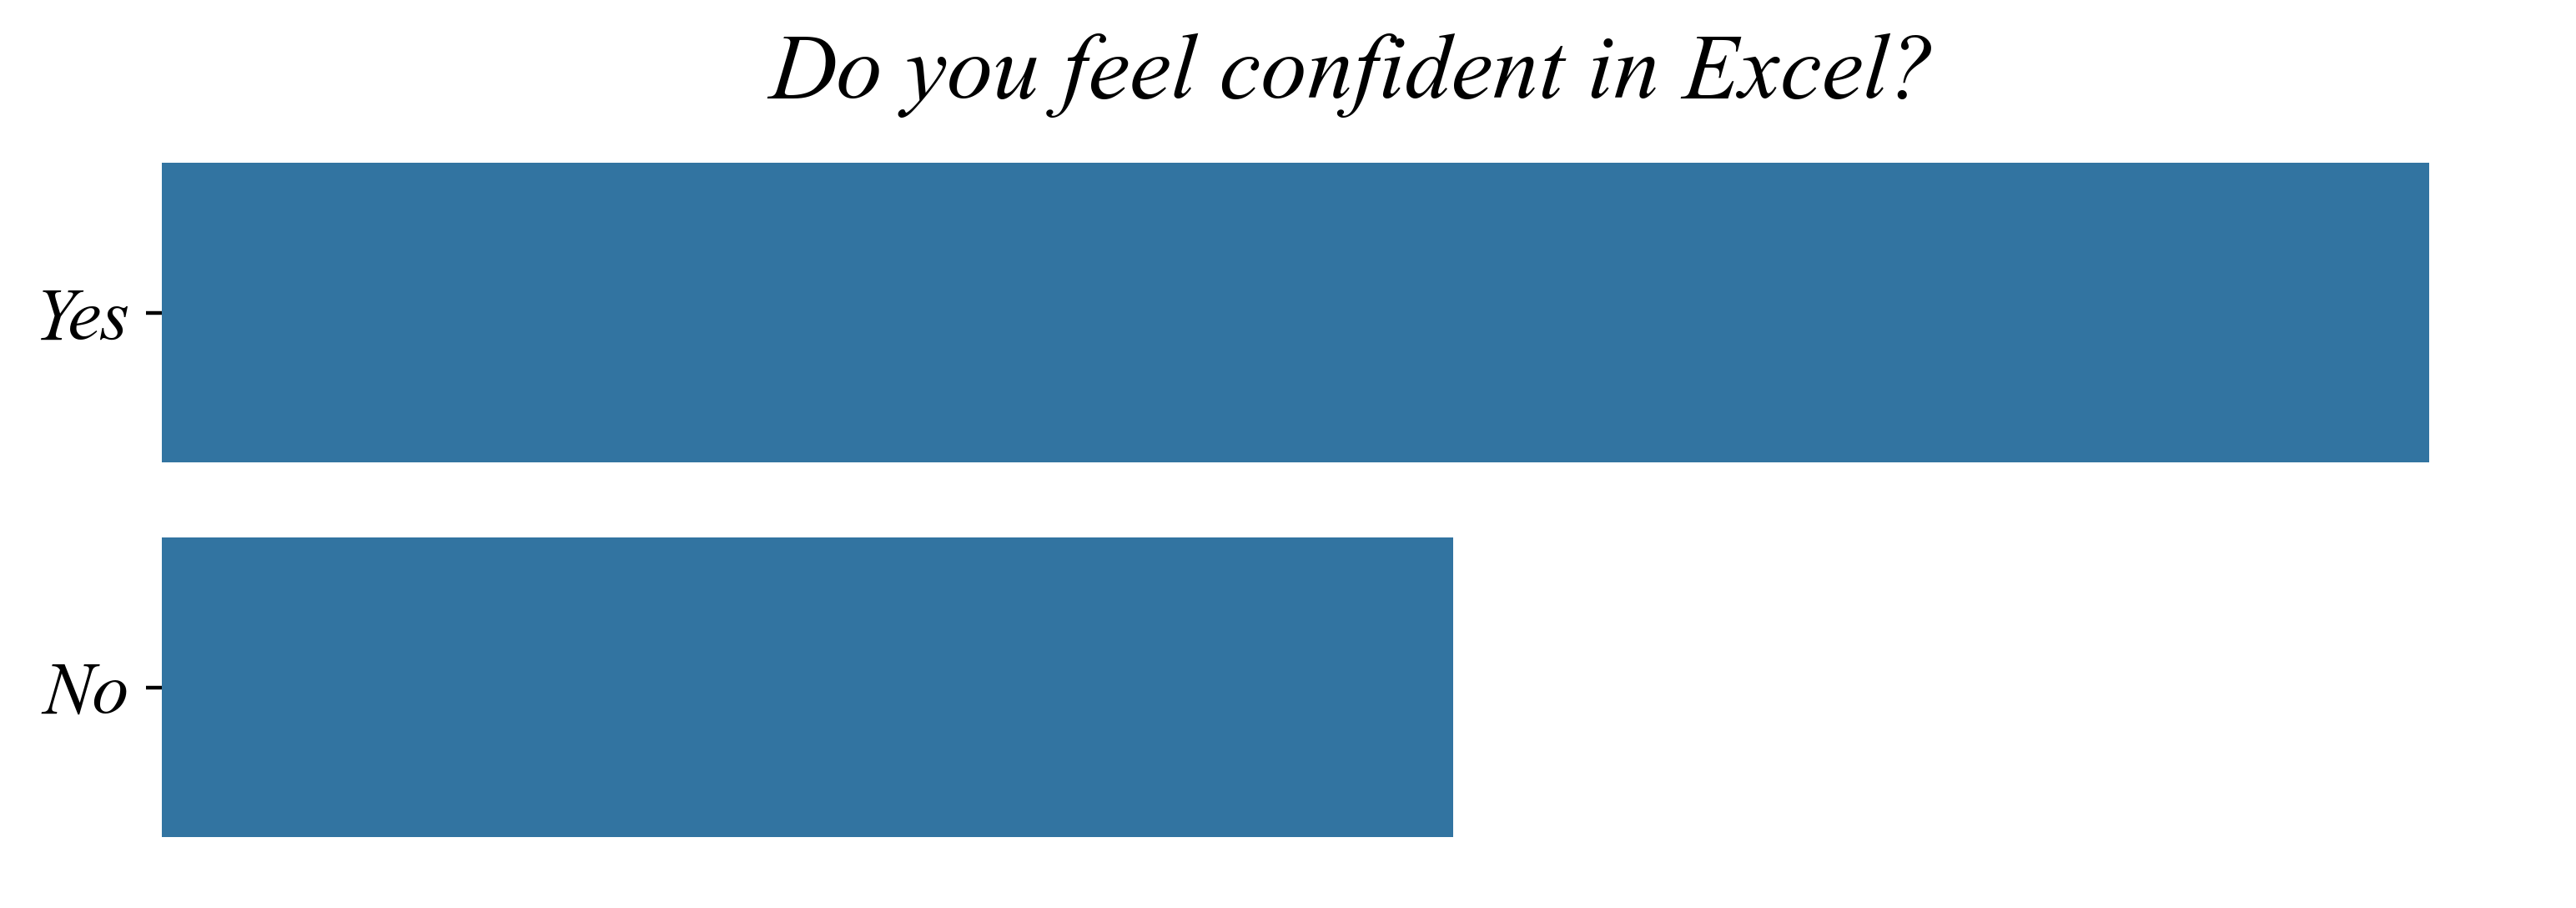

In [83]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.countplot(data=data, y='Do you feel confident in Excel?')

# Styling
plt.title('Do you feel confident in Excel?')
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, right=True, top=True, bottom=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_07.png')

/var/folders/xc/wlq2_w5j6zncfqys5_nfww4w0000gn/T/ipykernel_1246/3431006187.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:firebrick'` for the same effect.

  sns.swarmplot(y=data['Do you feel confident in Excel?'],


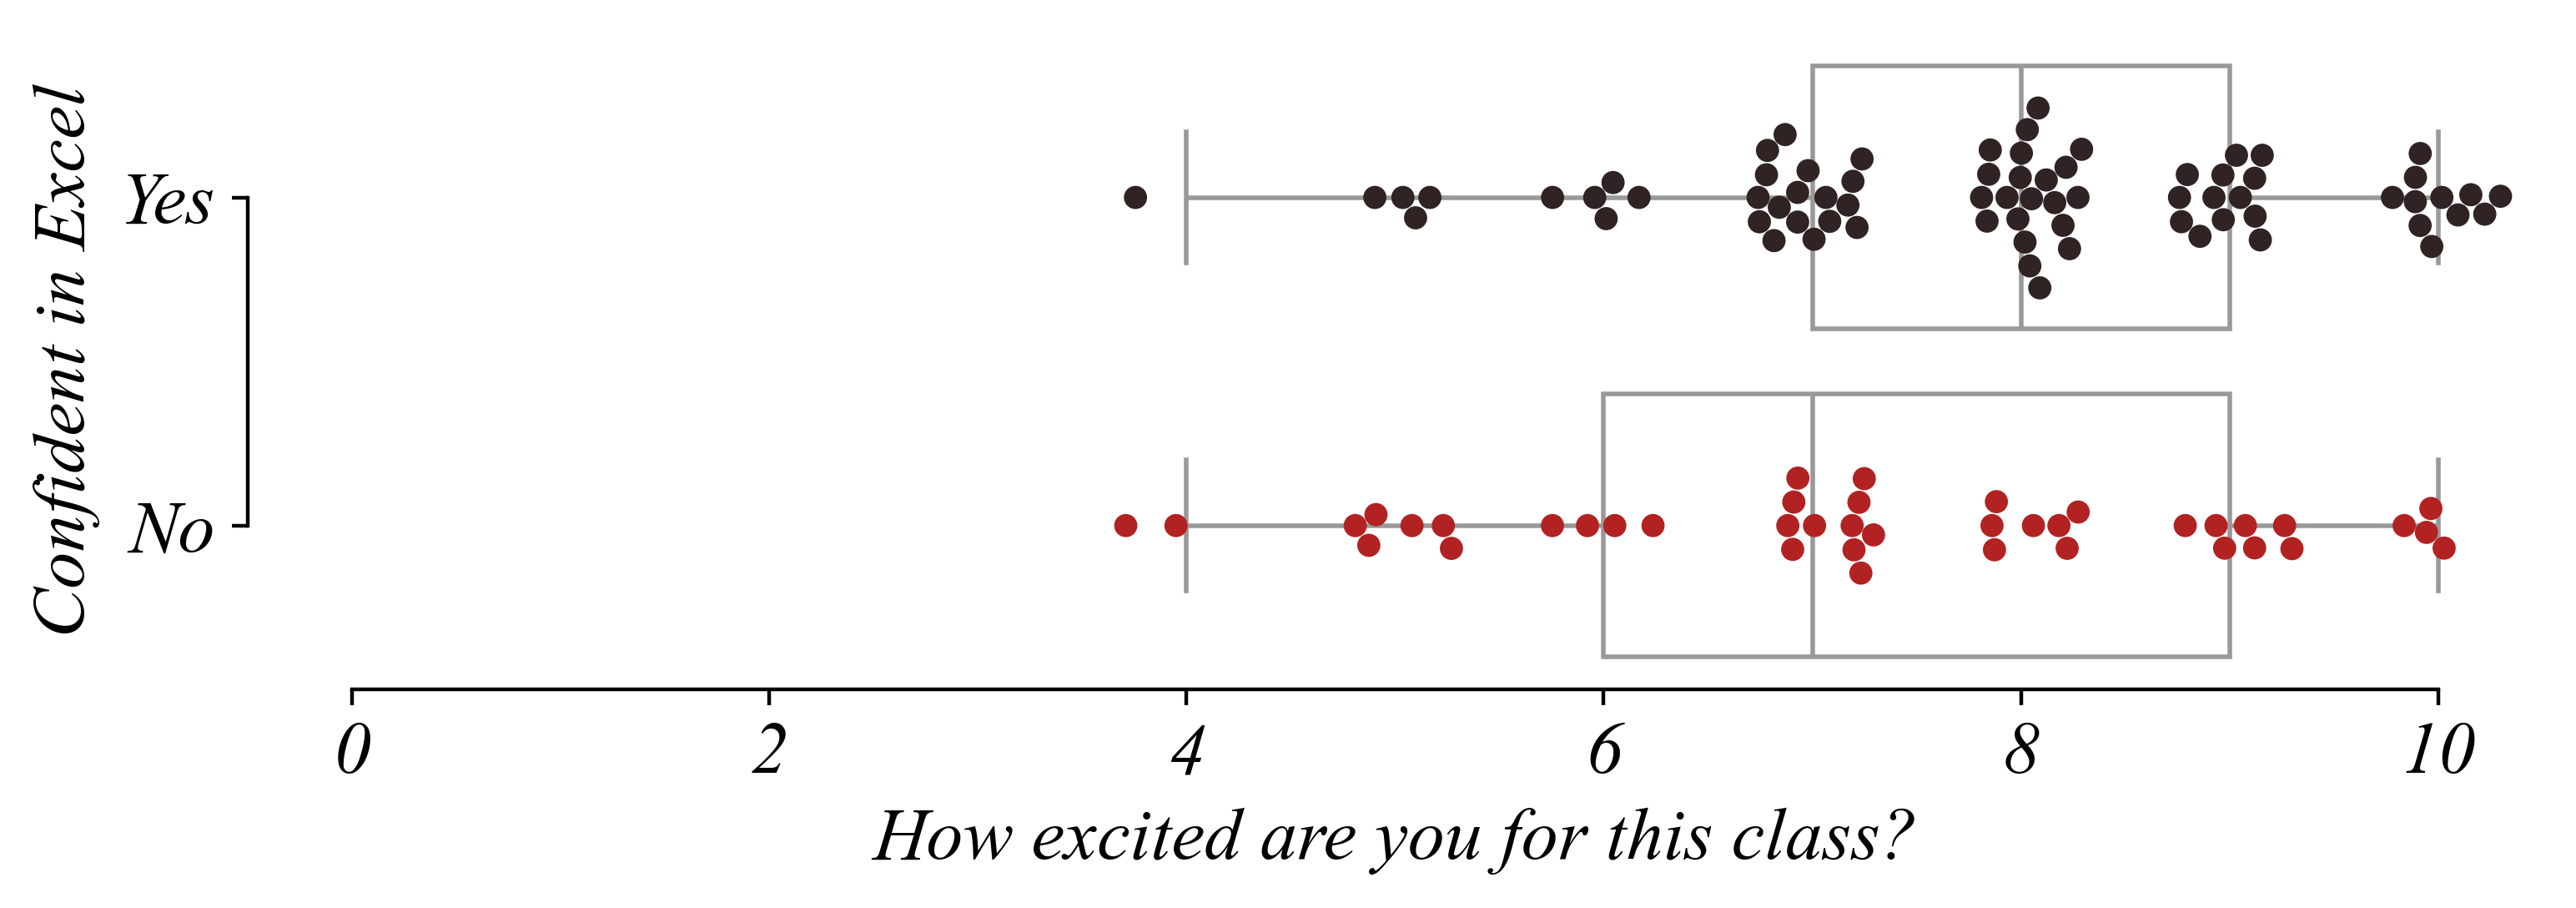

In [142]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)

sns.boxplot(data=data, y='Do you feel confident in Excel?', 
            x='How excited are you for this class?',
            color='white')

x_jittered = data['How excited are you for this class?'] + np.random.uniform(-0.3, 0.3, len(data))
sns.swarmplot(y=data['Do you feel confident in Excel?'], 
              x=x_jittered,
              hue=data['Do you feel confident in Excel?'],
              color='firebrick')

# Styling
plt.xticks()
plt.xlim(-0.5,10.5)
plt.xlabel('How excited are you for this class?')
plt.ylabel('Confident in Excel')
sns.despine(left=False, right=True, top=True, bottom=False, trim=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_07.png')

## Economic Data and Python

<Figure size 3200x3200 with 0 Axes>

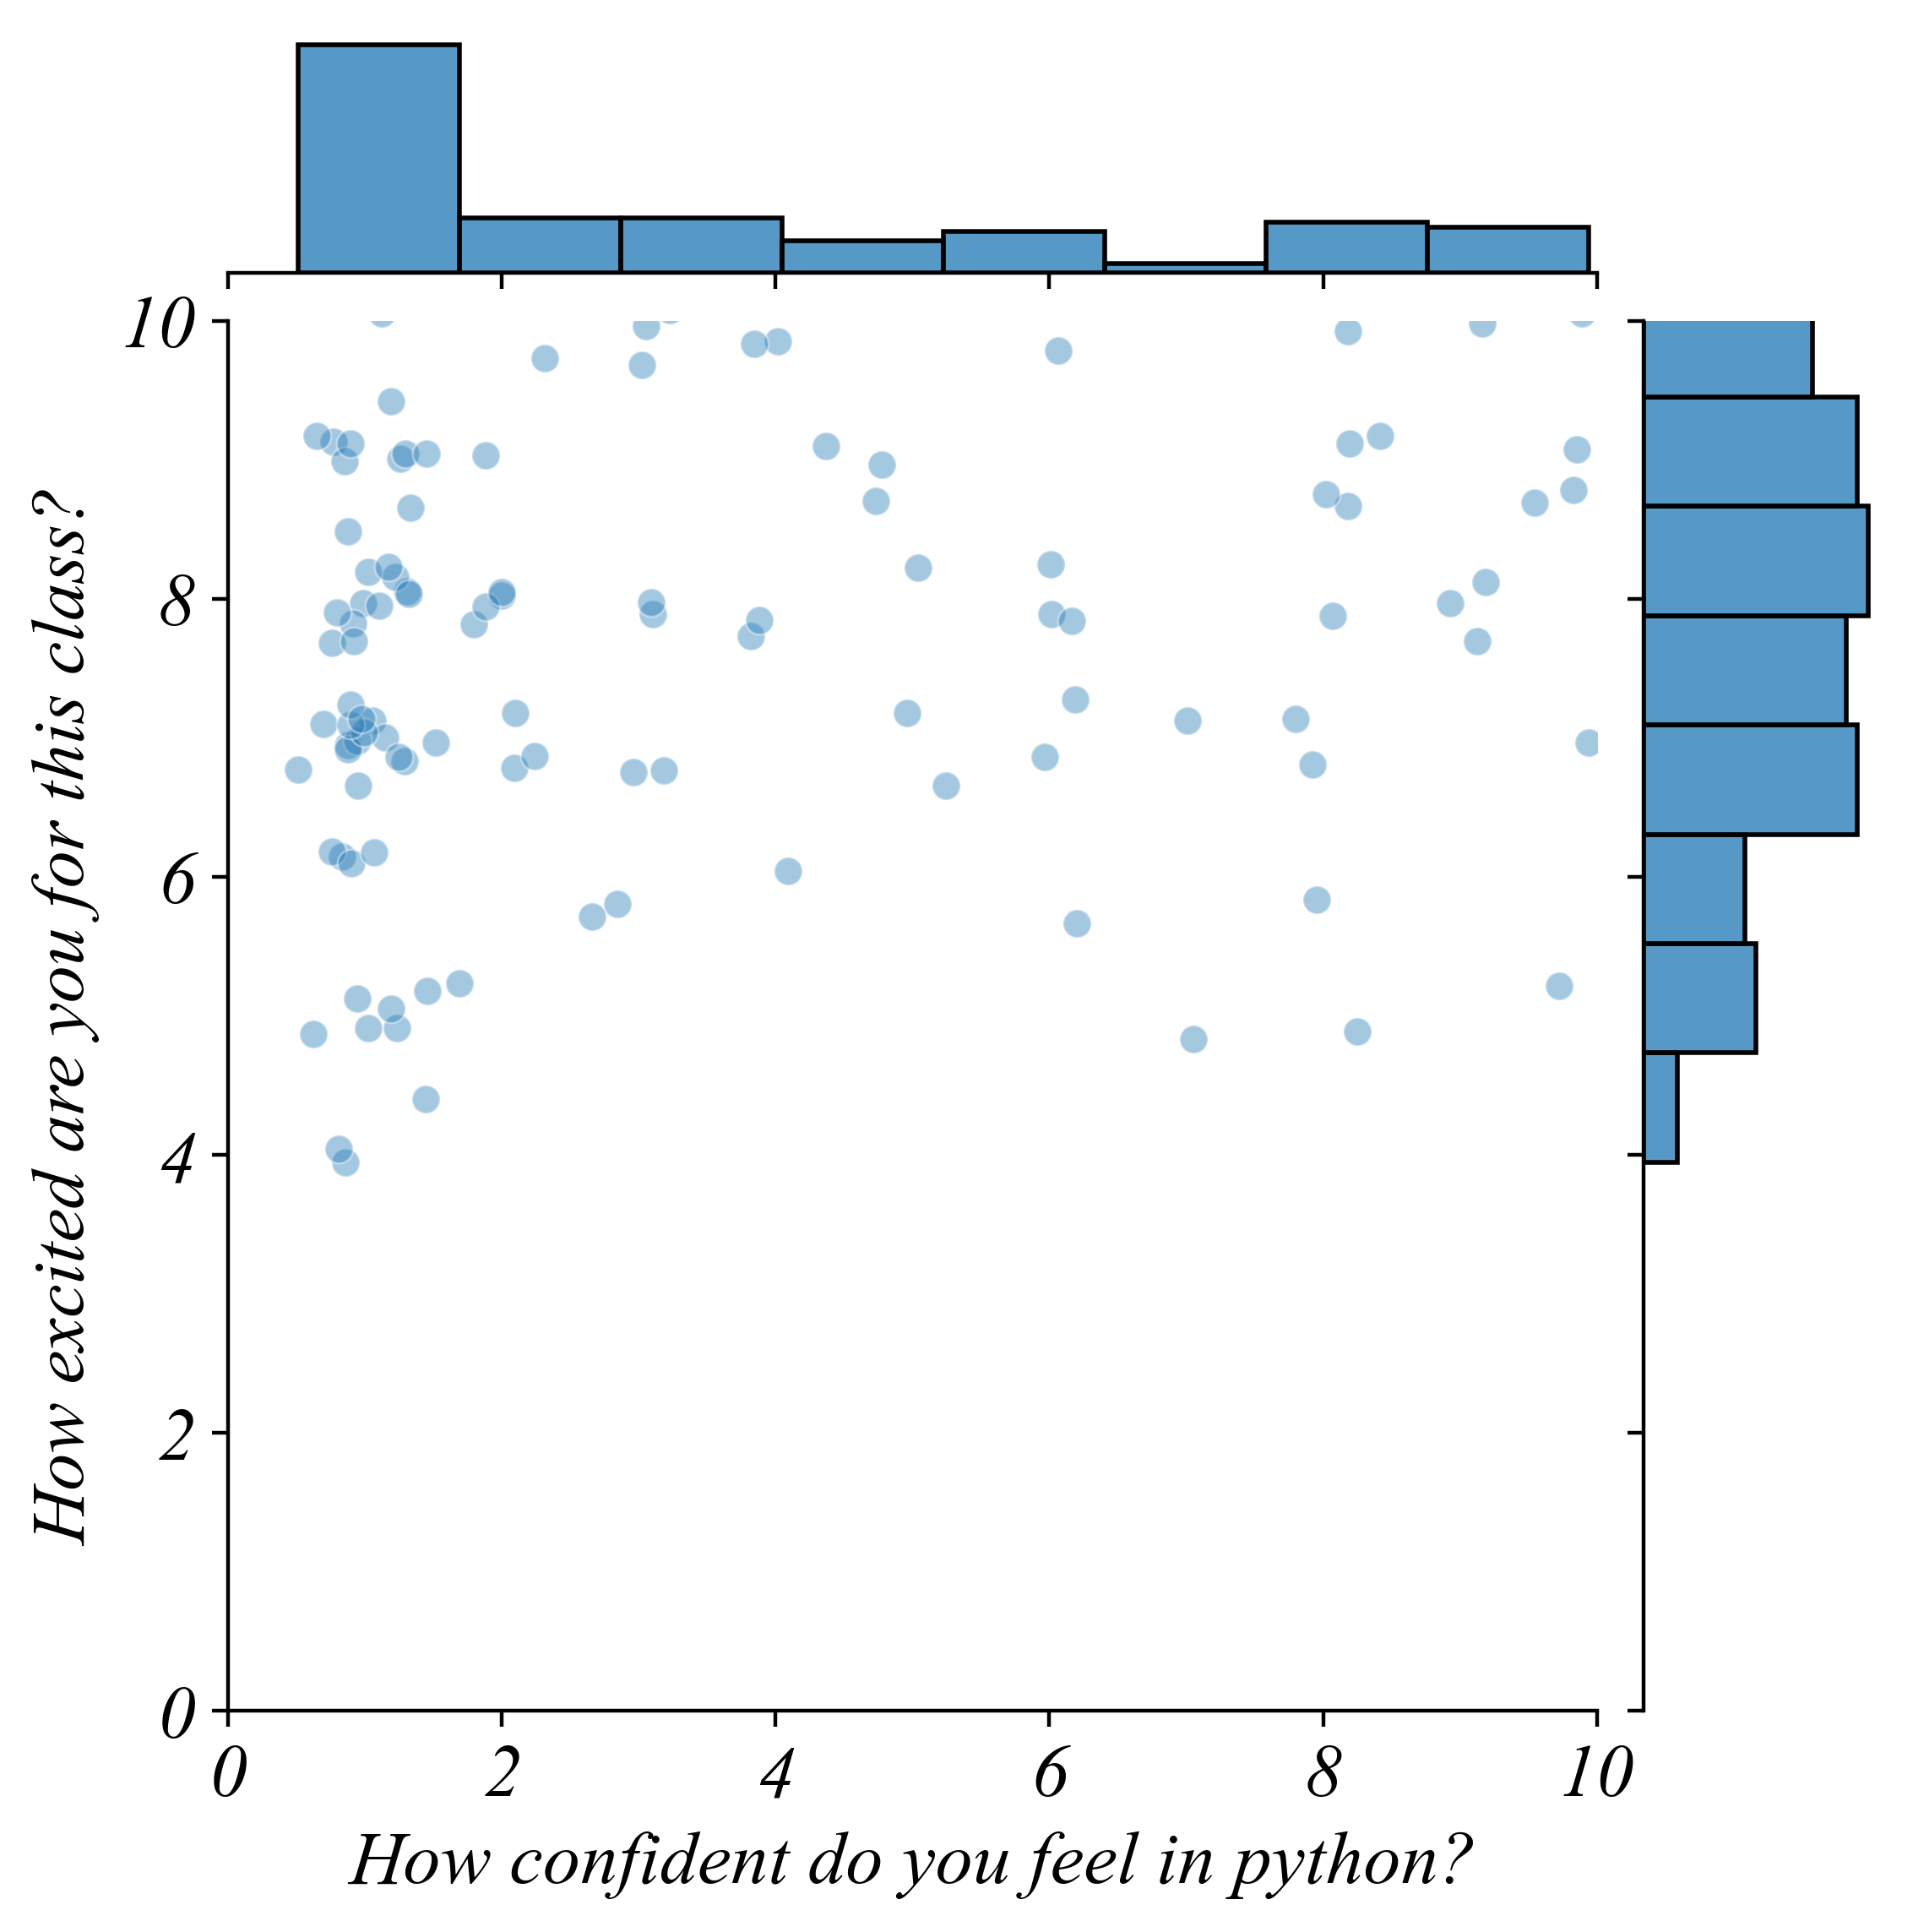

In [160]:
# Figure
plt.figure(figsize=(8, 8), dpi=400)

x_jitter = data['How confident do you feel in python?'] + np.random.normal(0, 0.2, len(data))
y_jitter = data['How excited are you for this class?'] + np.random.normal(0, 0.2, len(data))

sns.jointplot(x=x_jitter, y=y_jitter, alpha=0.4)

# Styling
plt.xlabel('How confident do you feel in python?')
plt.ylabel('How excited are you for this class?')
plt.ylim(0,10)
plt.xlim(0,10)

# Save
plt.savefig('i/survey_08.png')

## Economics Majors and Excitement

(0.0, 11.0)

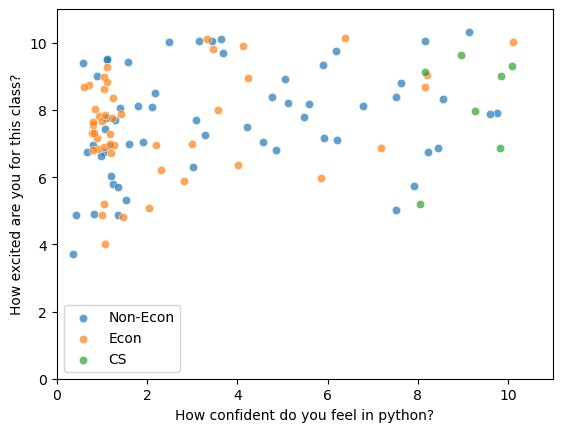

In [55]:

nmdata = data[~data['What is your (primary) major?'].isin(['Computer Science', 'Economics'])]
x_jitter = nmdata['How confident do you feel in python?'] + np.random.normal(0, 0.3, len(nmdata))
y_jitter = nmdata['How excited are you for this class?'] + np.random.normal(0, 0.3, len(nmdata))

sns.scatterplot(x=x_jitter, y=y_jitter, alpha=0.7, label='Non-Econ')

mdata = data[data['What is your (primary) major?'] == 'Economics']
x_jitter = mdata['How confident do you feel in python?'] + np.random.normal(0, 0.3, len(mdata))
y_jitter = mdata['How excited are you for this class?'] + np.random.normal(0, 0.3, len(mdata))

sns.scatterplot(x=x_jitter, y=y_jitter, alpha=0.7, label='Econ')

csdata = data[data['What is your (primary) major?'].isin(['Computer Science'])]
x_jitter = csdata['How confident do you feel in python?'] + np.random.normal(0, 0.3, len(csdata))
y_jitter = csdata['How excited are you for this class?'] + np.random.normal(0, 0.3, len(csdata))

sns.scatterplot(x=x_jitter, y=y_jitter, alpha=0.7, label='CS')

plt.xlabel('How confident do you feel in python?')
plt.ylabel('How excited are you for this class?')

plt.ylim(0,11)
plt.xlim(0,11)

# ECON 0150 | Part 0 | Figures

Figures for the Card & Krueger minimum wage case study slides.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Common settings for theory figures
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 18,
    'font.style': 'italic'
})

## Figure 1: Supply and Demand

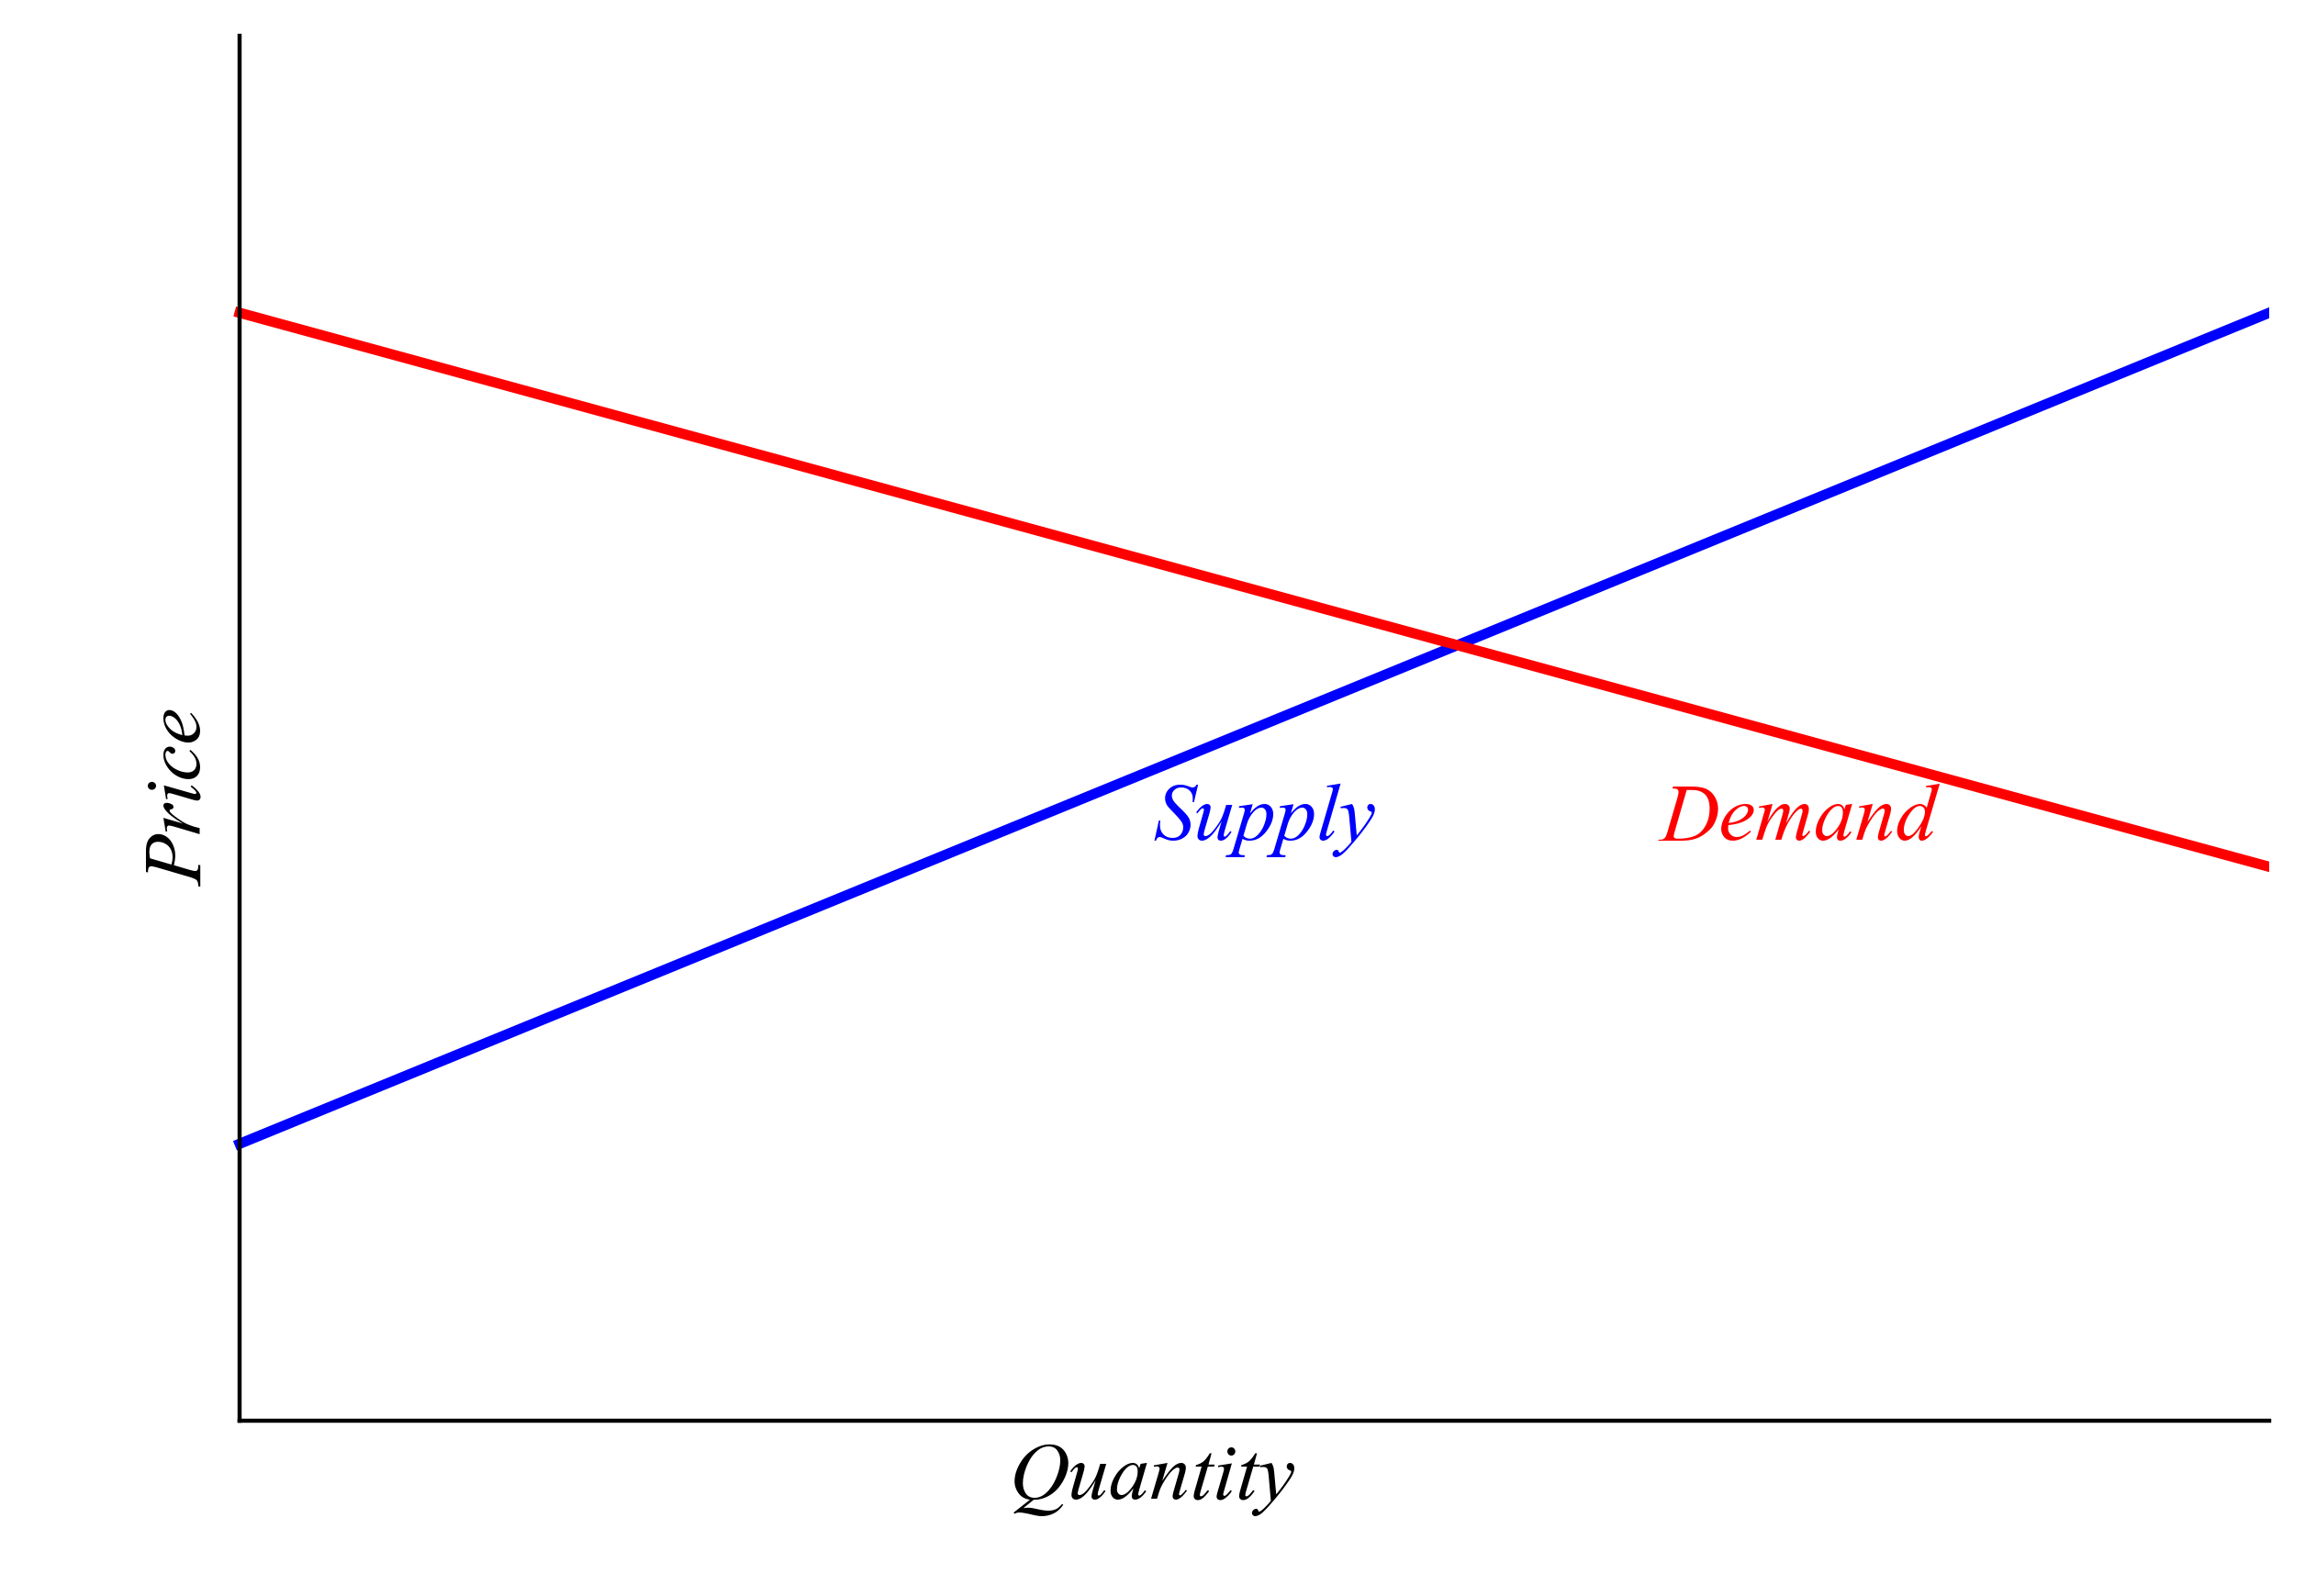

In [3]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=400)

Q = np.linspace(0, 10, 100)
supply = 2 + 0.6 * Q
demand = 8 - 0.4 * Q

ax.plot(Q, supply, color='blue', linewidth=2)
ax.plot(Q, demand, color='red', linewidth=2)

# Labels on curves instead of legend
ax.text(4.5, 4.2, 'Supply', color='blue', fontsize=16)
ax.text(7, 4.2, 'Demand', color='red', fontsize=16)

ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_xticks([])
ax.set_yticks([])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_bounds(0, 10)
ax.spines['bottom'].set_bounds(0, 10)

plt.subplots_adjust(left=0.12, right=0.88, top=0.95, bottom=0.12)
plt.savefig('i/fig_supply_demand.png', dpi=150, facecolor='white')
plt.show()

## Figure 2: Equilibrium

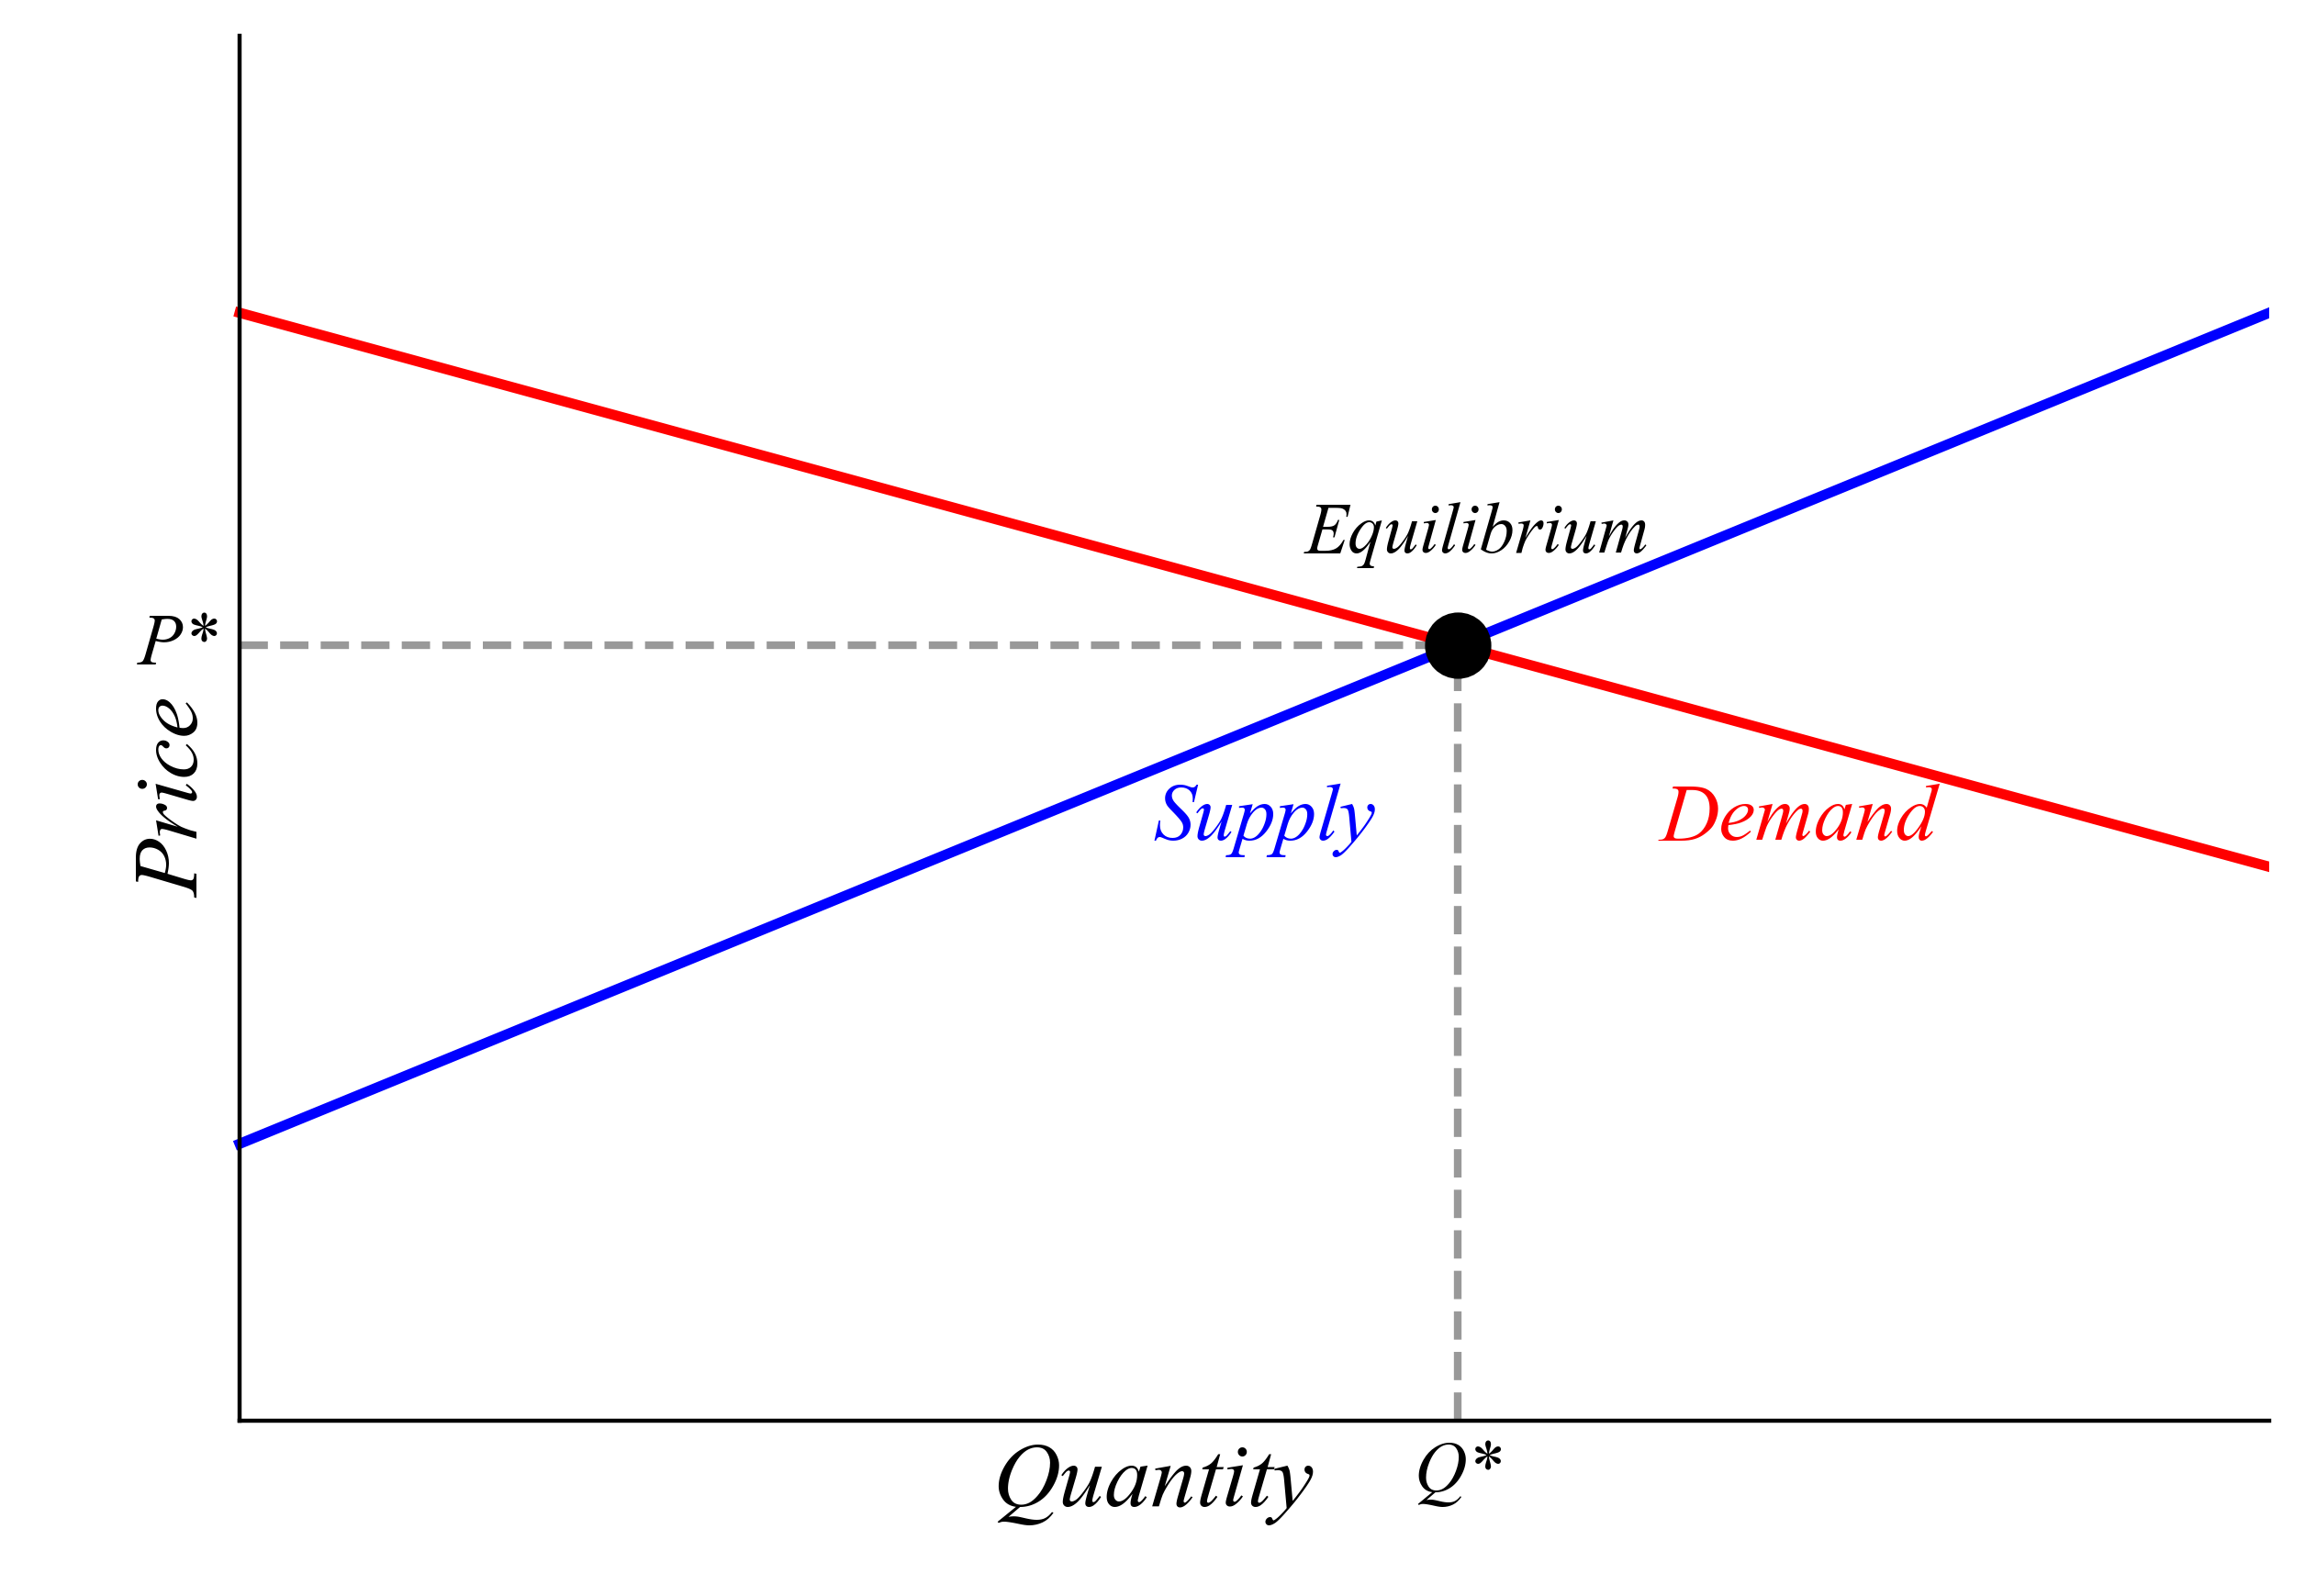

In [68]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=400)

Q = np.linspace(0, 10, 100)
supply = 2 + 0.6 * Q
demand = 8 - 0.4 * Q

ax.plot(Q, supply, color='blue', linewidth=2)
ax.plot(Q, demand, color='red', linewidth=2)

# Equilibrium
Q_eq = 6
P_eq = 5.6

ax.plot(Q_eq, P_eq, 'ko', markersize=12)

# Dashed lines to axes
ax.plot([Q_eq, Q_eq], [0, P_eq], 'k--', alpha=0.4)
ax.plot([0, Q_eq], [P_eq, P_eq], 'k--', alpha=0.4)

# Labels
ax.text(4.5, 4.2, 'Supply', color='blue', fontsize=16)
ax.text(7, 4.2, 'Demand', color='red', fontsize=16)
ax.text(Q_eq + 0.1, P_eq + 0.3 + 0.5, 'Equilibrium', fontsize=14, ha='center', va='center')
ax.text(Q_eq, -0.5, 'Q*', ha='center', fontsize=14)
ax.text(-0.5, P_eq, 'P*', va='center', fontsize=14)

ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_xticks([])
ax.set_yticks([])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_bounds(0, 10)
ax.spines['bottom'].set_bounds(0, 10)

plt.subplots_adjust(left=0.12, right=0.88, top=0.95, bottom=0.12)
plt.savefig('i/fig_equilibrium.png', dpi=150, facecolor='white')
plt.show()

## Figure 3: Price Ceiling (Shortage)

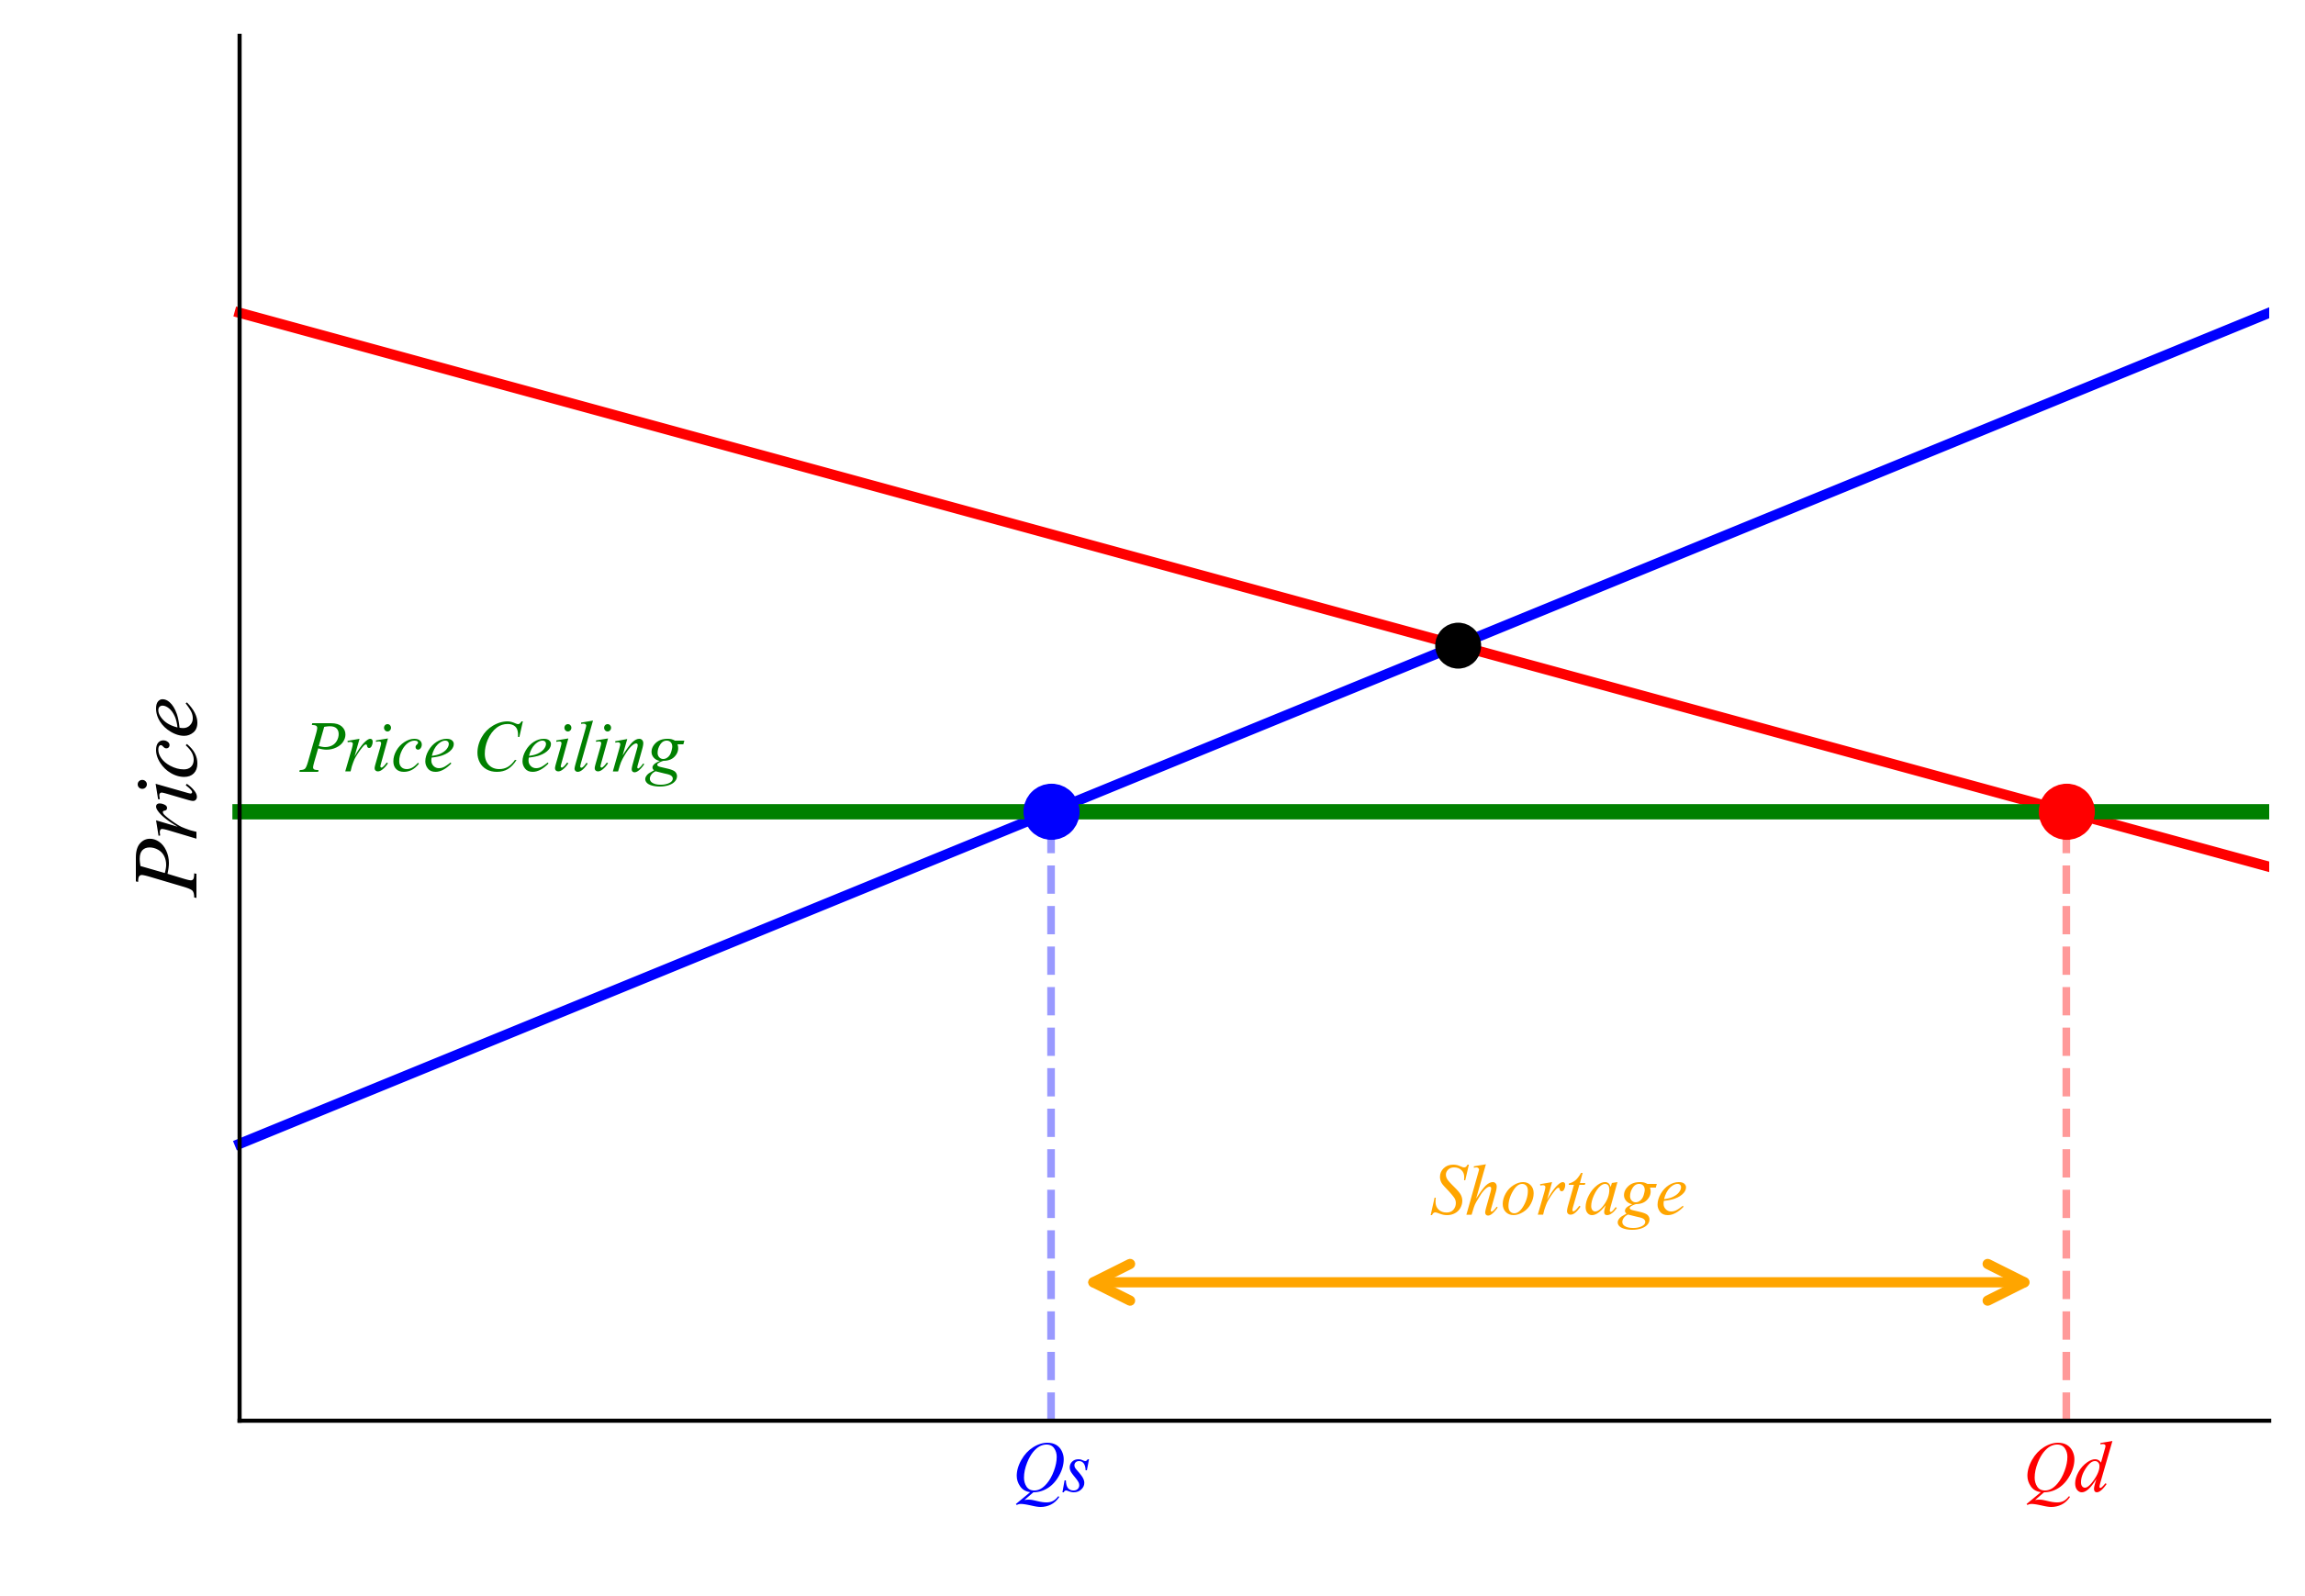

In [69]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=400)

Q = np.linspace(0, 10, 100)
supply = 2 + 0.6 * Q
demand = 8 - 0.4 * Q

ax.plot(Q, supply, color='blue', linewidth=2)
ax.plot(Q, demand, color='red', linewidth=2)

# Equilibrium
Q_eq = 6
P_eq = 5.6

ax.plot(Q_eq, P_eq, 'ko', markersize=8)

# Price ceiling below equilibrium
P_ceiling = 4.4
Q_supplied = (P_ceiling - 2) / 0.6  # = 4
Q_demanded = (8 - P_ceiling) / 0.4  # = 9

ax.plot([0, 10], [P_ceiling, P_ceiling], color='green', linewidth=3)
ax.text(0.3, P_ceiling + 0.3, 'Price Ceiling', color='green', fontsize=14)

# Points on curves
ax.plot(Q_supplied, P_ceiling, 'bo', markersize=10)
ax.plot(Q_demanded, P_ceiling, 'ro', markersize=10)

# Dashed lines
ax.plot([Q_supplied, Q_supplied], [0, P_ceiling], 'b--', alpha=0.4)
ax.plot([Q_demanded, Q_demanded], [0, P_ceiling], 'r--', alpha=0.4)

# Labels
ax.text(Q_supplied, -0.5, 'Qs', ha='center', fontsize=14, color='blue')
ax.text(Q_demanded, -0.5, 'Qd', ha='center', fontsize=14, color='red')

# Shortage bracket
ax.annotate('', xy=(Q_demanded - 0.1, 1), xytext=(Q_supplied + 0.1, 1),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=2))
ax.text((Q_supplied + Q_demanded)/2, 1.5, 'Shortage', ha='center', color='orange', fontsize=14)

ax.set_ylabel('Price')
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_xticks([])
ax.set_yticks([])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_bounds(0, 10)
ax.spines['bottom'].set_bounds(0, 10)

plt.subplots_adjust(left=0.12, right=0.88, top=0.95, bottom=0.12)
plt.savefig('i/fig_price_ceiling.png', dpi=150, facecolor='white')
plt.show()

## Figure 4: Price Floor (Surplus)

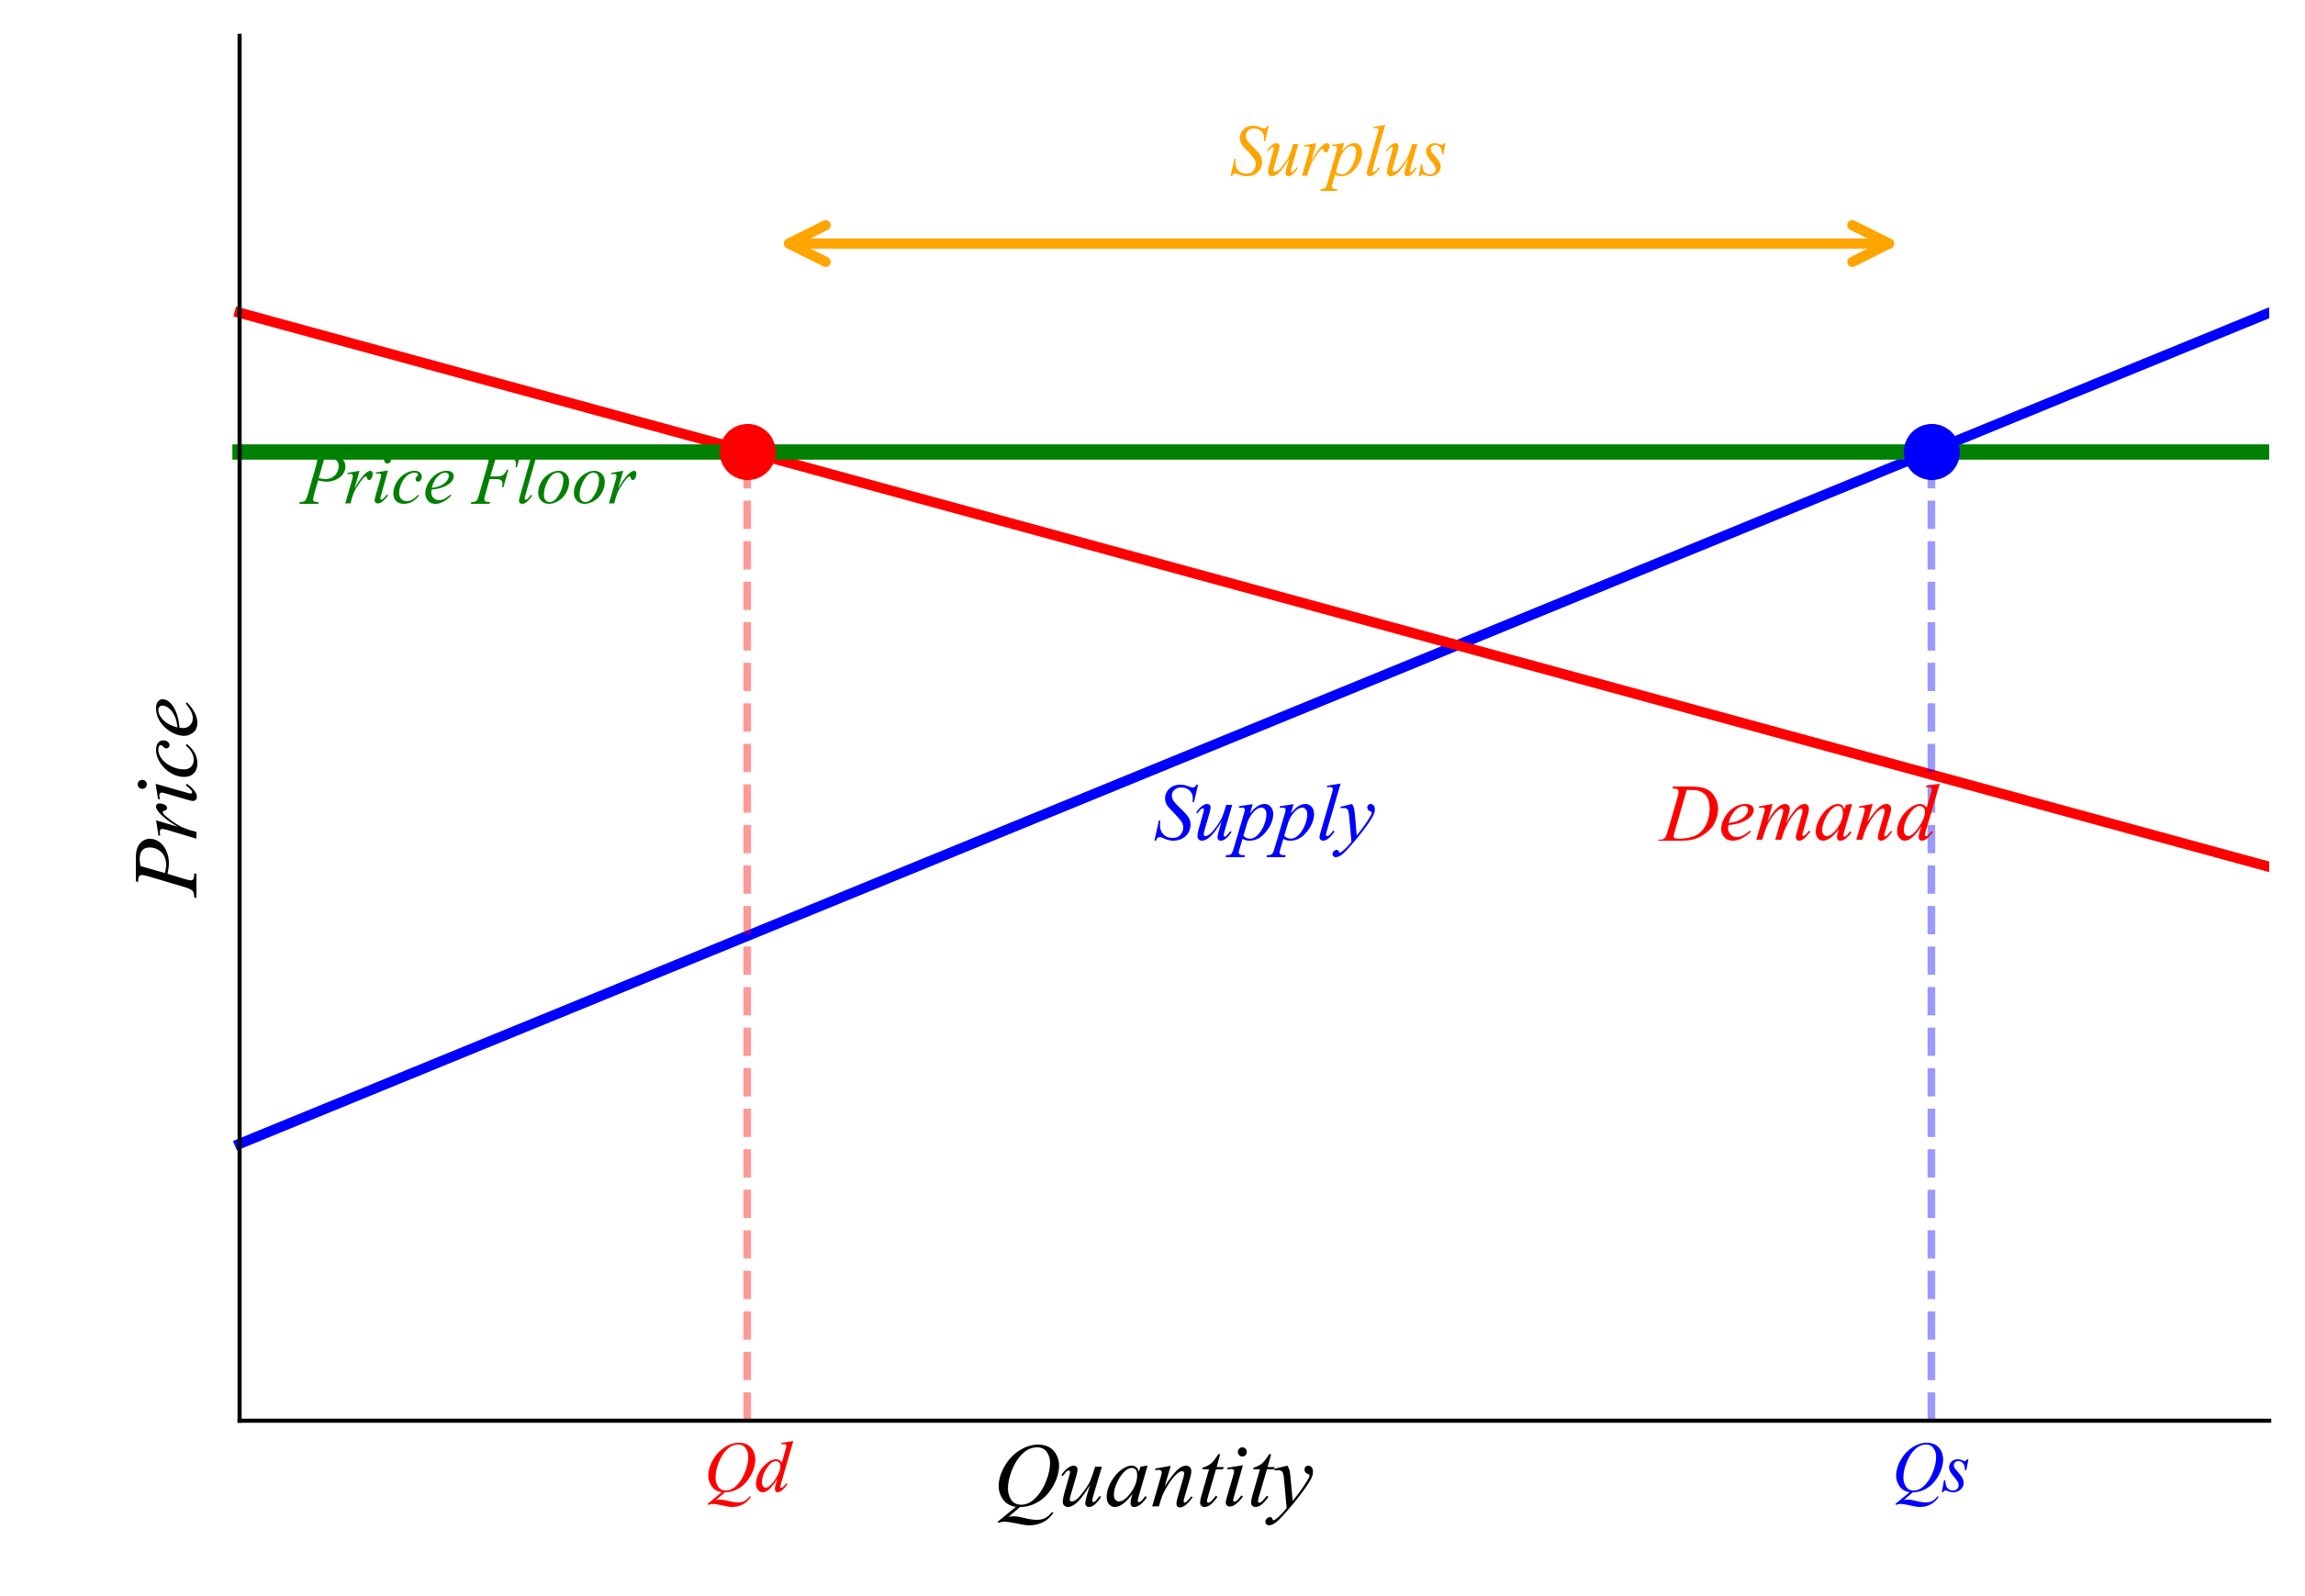

In [70]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=400)

Q = np.linspace(0, 10, 100)
supply = 2 + 0.6 * Q
demand = 8 - 0.4 * Q

ax.plot(Q, supply, color='blue', linewidth=2)
ax.plot(Q, demand, color='red', linewidth=2)

# Price floor above equilibrium
P_floor = 7
Q_demanded = (8 - P_floor) / 0.4  # = 2.5
Q_supplied = (P_floor - 2) / 0.6  # ~8.33

ax.plot([0, 10], [P_floor, P_floor], color='green', linewidth=3)
ax.text(0.3, P_floor, 'Price Floor', color='green', fontsize=14, va='top')

# Points on curves
ax.plot(Q_demanded, P_floor, 'ro', markersize=10)
ax.plot(Q_supplied, P_floor, 'bo', markersize=10)

# Dashed lines
ax.plot([Q_demanded, Q_demanded], [0, P_floor], 'r--', alpha=0.4)
ax.plot([Q_supplied, Q_supplied], [0, P_floor], 'b--', alpha=0.4)

# Labels
ax.text(4.5, 4.2, 'Supply', color='blue', fontsize=16)
ax.text(7, 4.2, 'Demand', color='red', fontsize=16)
ax.text(Q_demanded, -0.5, 'Qd', ha='center', fontsize=14, color='red')
ax.text(Q_supplied, -0.5, 'Qs', ha='center', fontsize=14, color='blue')

# Surplus bracket
ax.annotate('', xy=(Q_supplied - 0.1, 8.5), xytext=(Q_demanded + 0.1, 8.5),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=2))
ax.text((Q_demanded + Q_supplied)/2, 9, 'Surplus', ha='center', color='orange', fontsize=14)

ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_xticks([])
ax.set_yticks([])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_bounds(0, 10)
ax.spines['bottom'].set_bounds(0, 10)

plt.subplots_adjust(left=0.12, right=0.88, top=0.95, bottom=0.12)
plt.savefig('i/fig_price_floor.png', dpi=150, facecolor='white')
plt.show()

## Figure 5: Labor Market

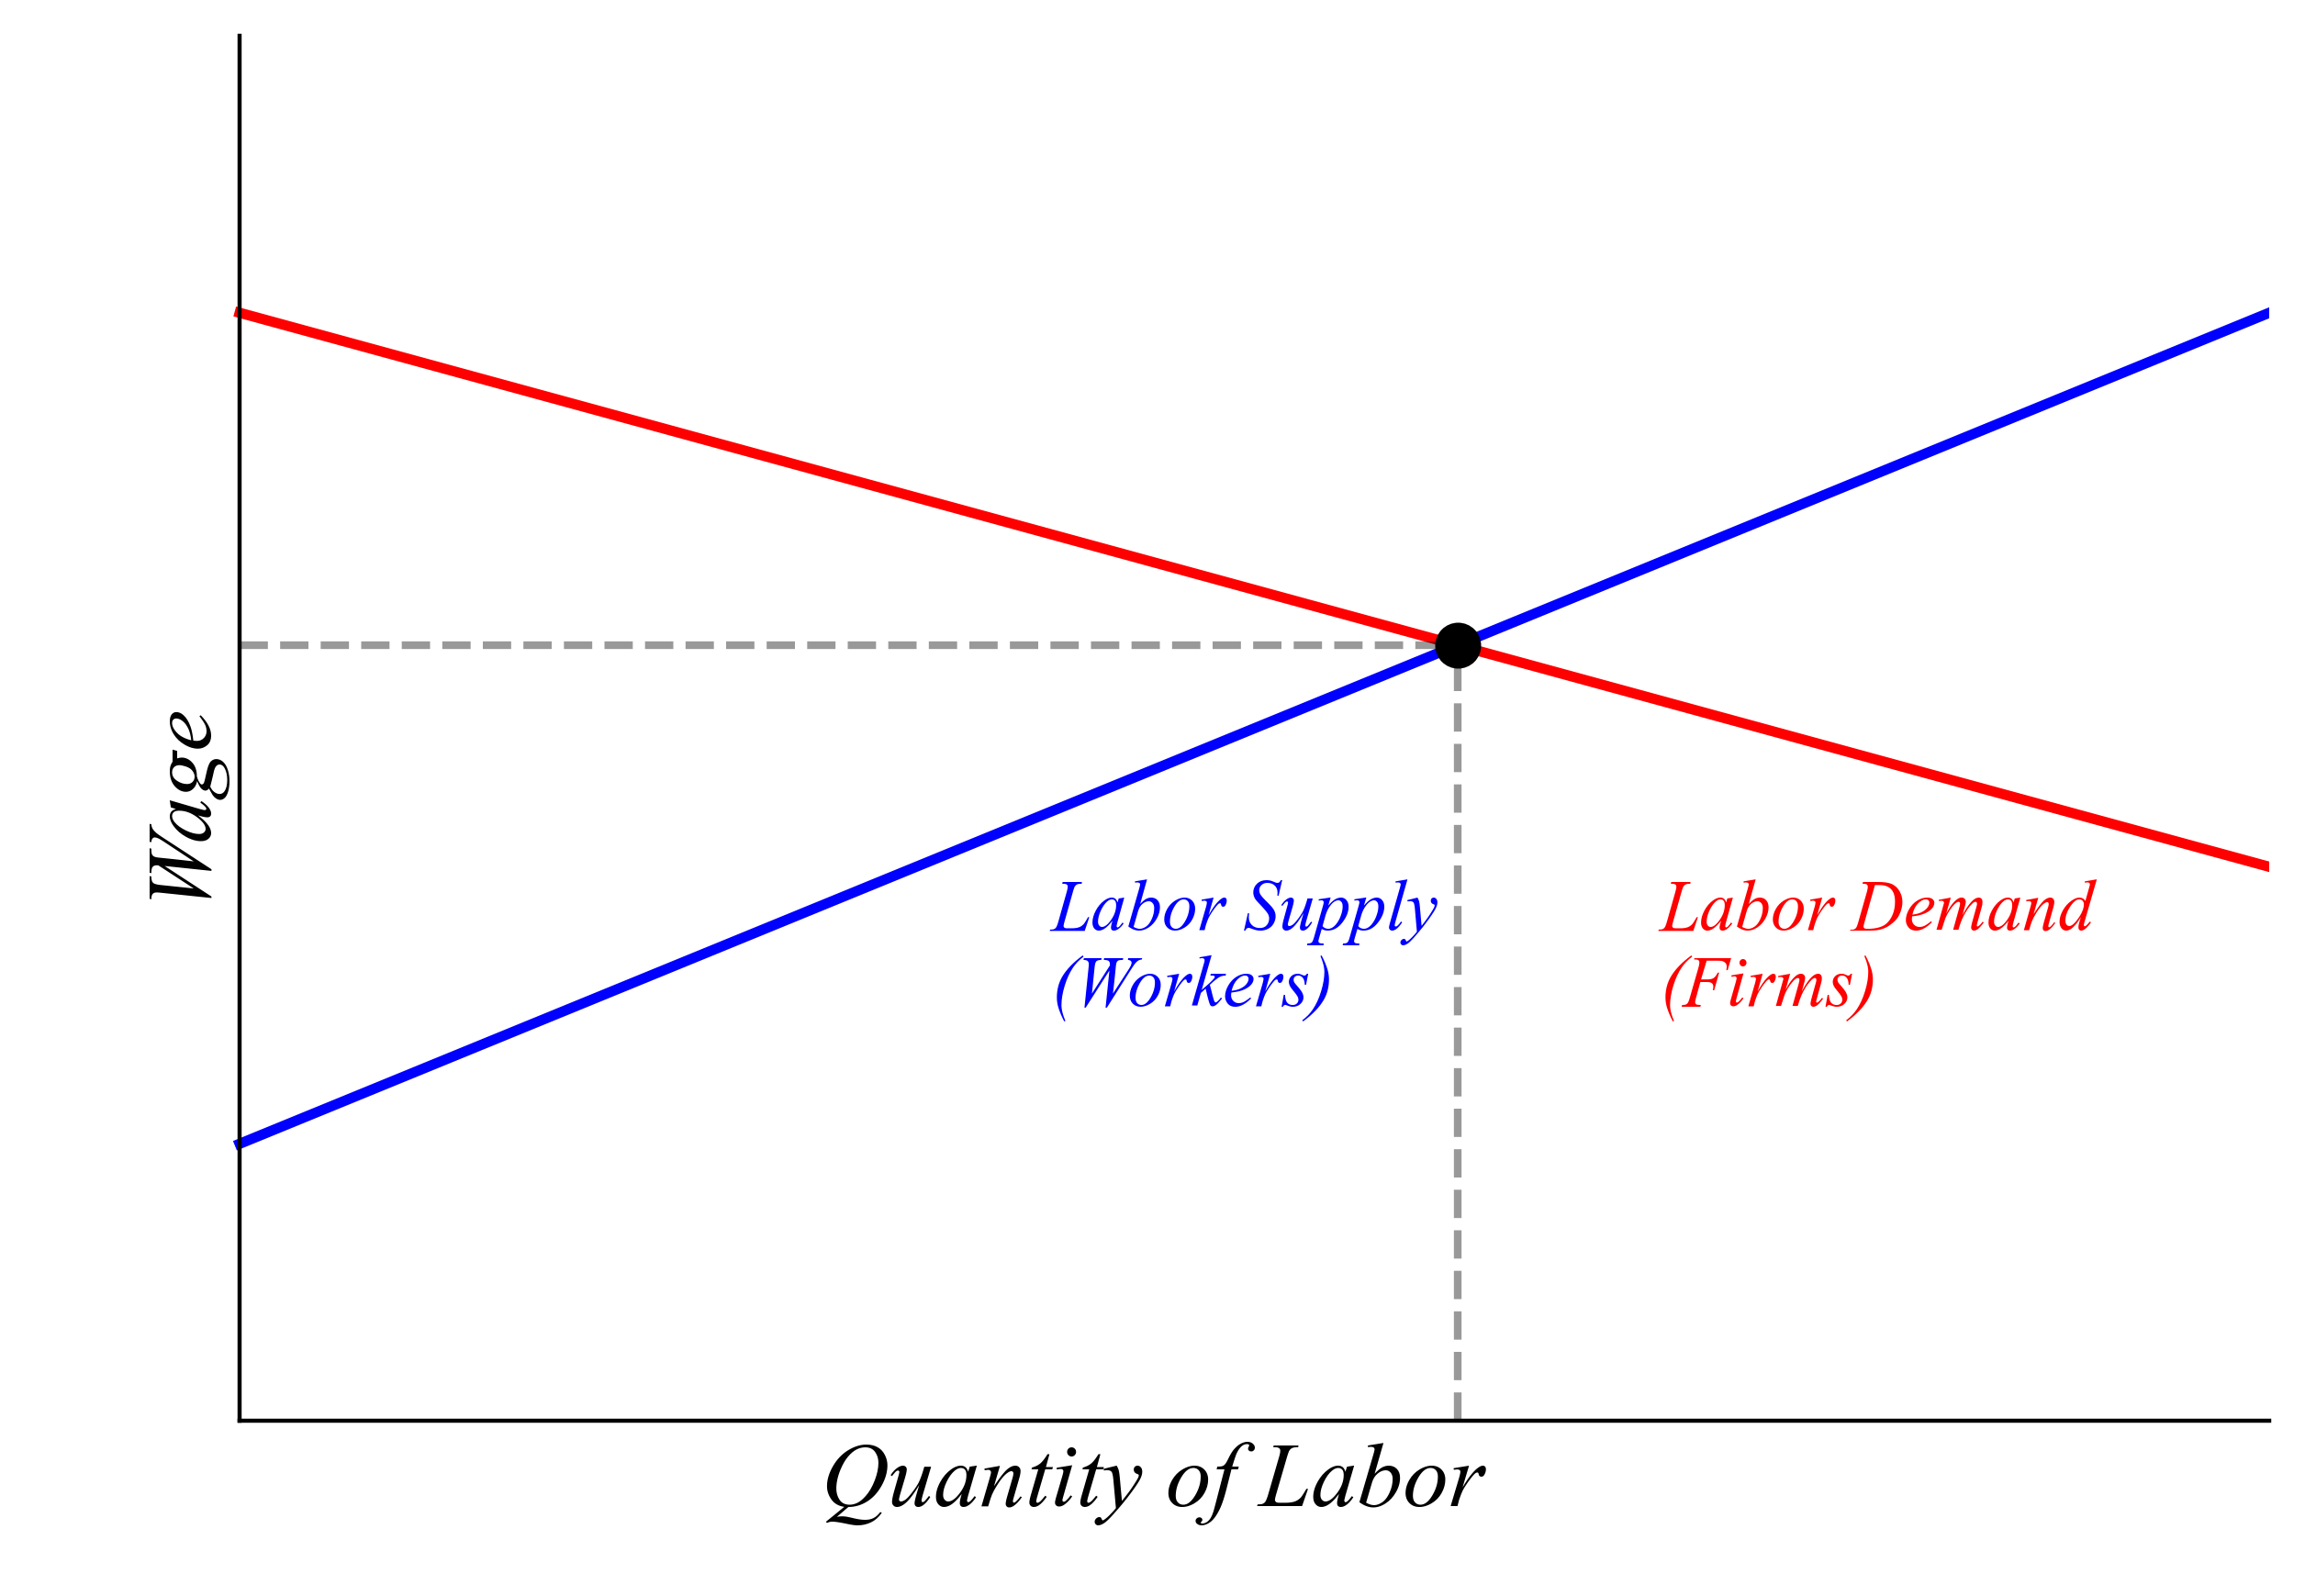

In [71]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=400)

Q = np.linspace(0, 10, 100)
supply = 2 + 0.6 * Q
demand = 8 - 0.4 * Q

ax.plot(Q, supply, color='blue', linewidth=2)
ax.plot(Q, demand, color='red', linewidth=2)

# Equilibrium
Q_eq = 6
W_eq = 5.6

ax.plot(Q_eq, W_eq, 'ko', markersize=8)
ax.plot([Q_eq, Q_eq], [0, W_eq], 'k--', alpha=0.4)
ax.plot([0, Q_eq], [W_eq, W_eq], 'k--', alpha=0.4)

# Labels on curves
ax.text(4, 3, 'Labor Supply\n(Workers)', color='blue', fontsize=14)
ax.text(7, 3, 'Labor Demand\n(Firms)', color='red', fontsize=14)
ax.set_xlabel('Quantity of Labor')
ax.set_ylabel('Wage')
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_xticks([])
ax.set_yticks([])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_bounds(0, 10)
ax.spines['bottom'].set_bounds(0, 10)

plt.subplots_adjust(left=0.12, right=0.88, top=0.95, bottom=0.12)
plt.savefig('i/fig_labor_market.png', dpi=150, facecolor='white')
plt.show()

## Figure 6: Minimum Wage (Unemployment)

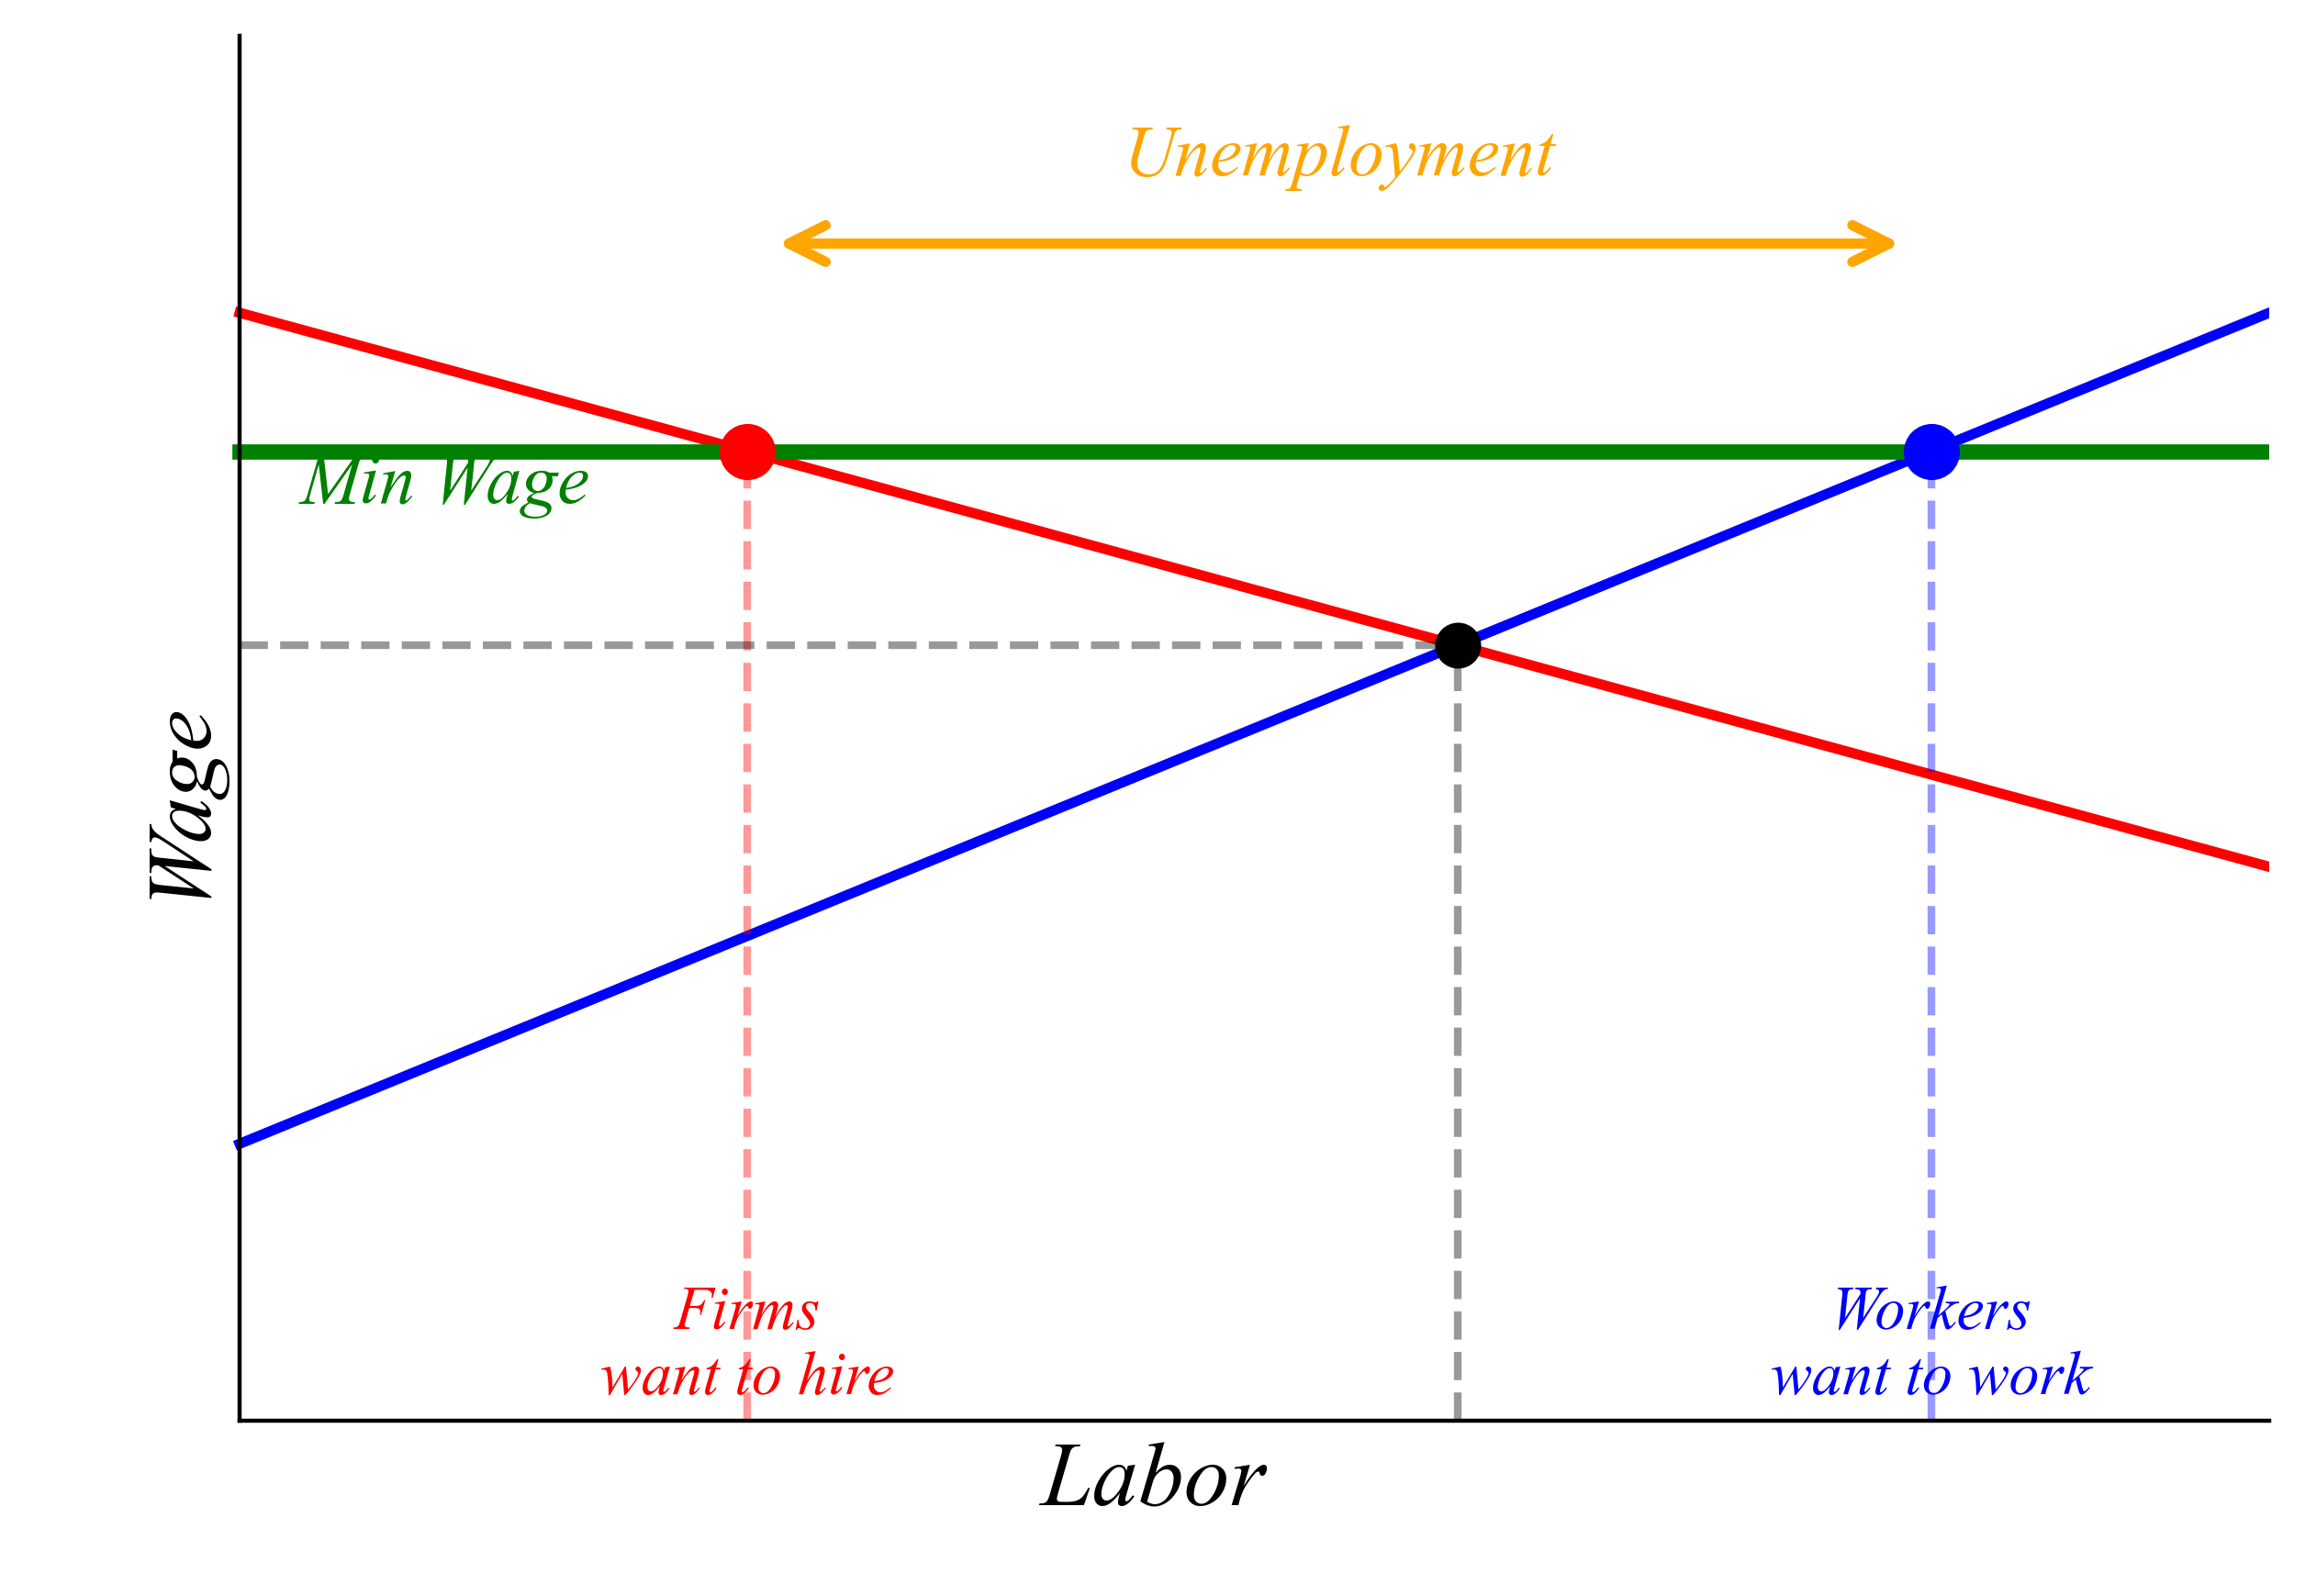

In [72]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=400)

Q = np.linspace(0, 10, 100)
supply = 2 + 0.6 * Q
demand = 8 - 0.4 * Q

ax.plot(Q, supply, color='blue', linewidth=2)
ax.plot(Q, demand, color='red', linewidth=2)

# Minimum wage above equilibrium
W_min = 7
Q_demanded = (8 - W_min) / 0.4  # = 2.5
Q_supplied = (W_min - 2) / 0.6  # ~8.33

ax.plot([0, 10], [W_min, W_min], color='green', linewidth=3)
ax.text(0.3, W_min, 'Min Wage', color='green', fontsize=14, va='top')

# Points on curves
ax.plot(Q_demanded, W_min, 'ro', markersize=10)
ax.plot(Q_supplied, W_min, 'bo', markersize=10)

# Dashed lines
ax.plot([Q_demanded, Q_demanded], [0, W_min], 'r--', alpha=0.4)
ax.plot([Q_supplied, Q_supplied], [0, W_min], 'b--', alpha=0.4)

# Equilibrium
Q_eq = 6
W_eq = 5.6

ax.plot(Q_eq, W_eq, 'ko', markersize=8)
ax.plot([Q_eq, Q_eq], [0, W_eq], 'k--', alpha=0.4)
ax.plot([0, Q_eq], [W_eq, W_eq], 'k--', alpha=0.4)

# Labels on curves
ax.text(Q_demanded, 0.2, 'Firms\nwant to hire', ha='center', fontsize=12, color='red')
ax.text(Q_supplied, 0.2, 'Workers\nwant to work', ha='center', fontsize=12, color='blue')

# Unemployment bracket
ax.annotate('', xy=(Q_supplied - 0.1, 8.5), xytext=(Q_demanded + 0.1, 8.5),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=2))
ax.text((Q_demanded + Q_supplied)/2, 9, 'Unemployment', ha='center', color='orange', fontsize=14)

ax.set_xlabel('Labor')
ax.set_ylabel('Wage')
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_xticks([])
ax.set_yticks([])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_bounds(0, 10)
ax.spines['bottom'].set_bounds(0, 10)

plt.subplots_adjust(left=0.12, right=0.88, top=0.95, bottom=0.12)
plt.savefig('i/fig_minimum_wage.png', dpi=150, facecolor='white')
plt.show()

## Figure 7: Difference-in-Differences

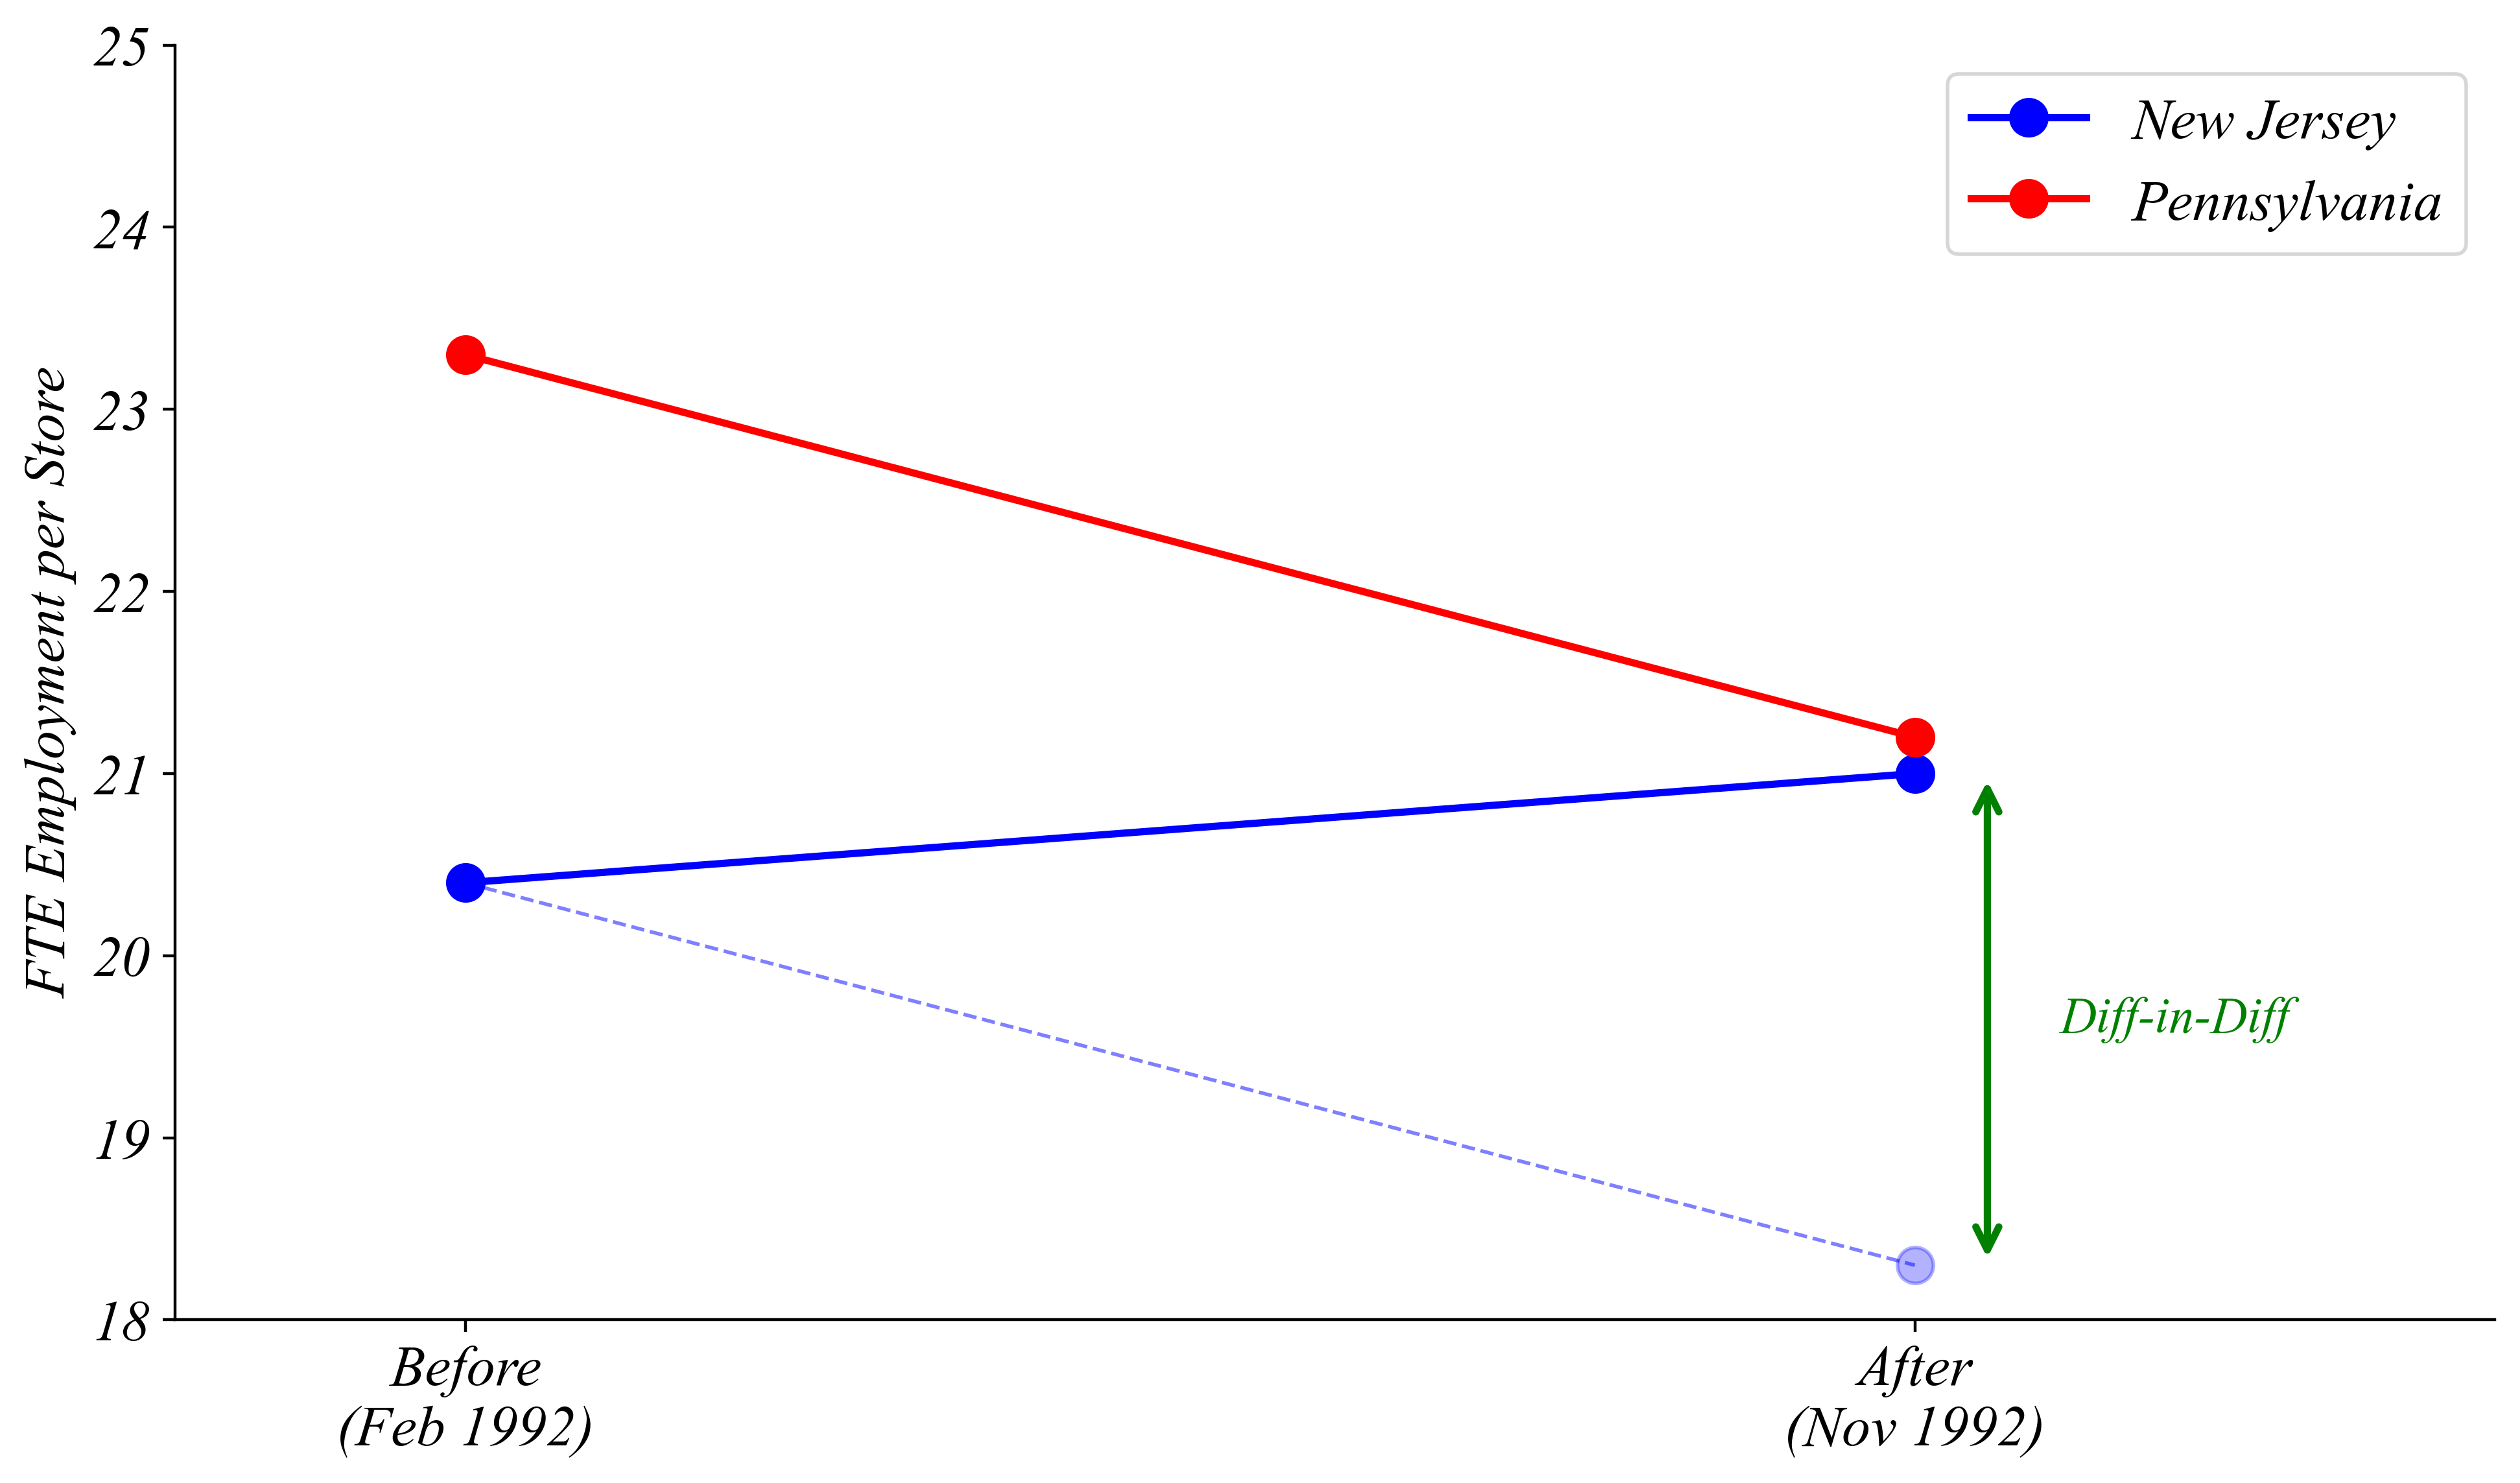

In [73]:
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 16,
    'font.style': 'italic'
})

fig, ax = plt.subplots(figsize=(10, 6), dpi=400)

time = [0, 1]
nj_before, nj_after = 20.4, 21.0
pa_before, pa_after = 23.3, 21.2

ax.plot(time, [nj_before, nj_after], 'b-o', linewidth=2, markersize=10, label='New Jersey')
ax.plot(time, [pa_before, pa_after], 'r-o', linewidth=2, markersize=10, label='Pennsylvania')

nj_counterfactual = nj_before + (pa_after - pa_before)
ax.plot([0, 1], [nj_before, nj_counterfactual], 'b--', linewidth=1, alpha=0.5)
ax.plot(1, nj_counterfactual, 'bo', markersize=10, alpha=0.3)

ax.annotate('', xy=(1.05, nj_after), xytext=(1.05, nj_counterfactual),
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax.text(1.1, (nj_after + nj_counterfactual)/2, 'Diff-in-Diff',
        color='green', fontsize=14, va='center')

ax.set_xticks(time)
ax.set_xticklabels(['Before\n(Feb 1992)', 'After\n(Nov 1992)'])
ax.set_ylabel('FTE Employment per Store')
ax.set_ylim(18, 25)
ax.set_xlim(-0.2, 1.4)
ax.legend(loc='upper right')

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig('i/fig_diff_in_diff.png', dpi=150, facecolor='white')
plt.show()

## Figure 8: Employment Changes (Bar Chart)

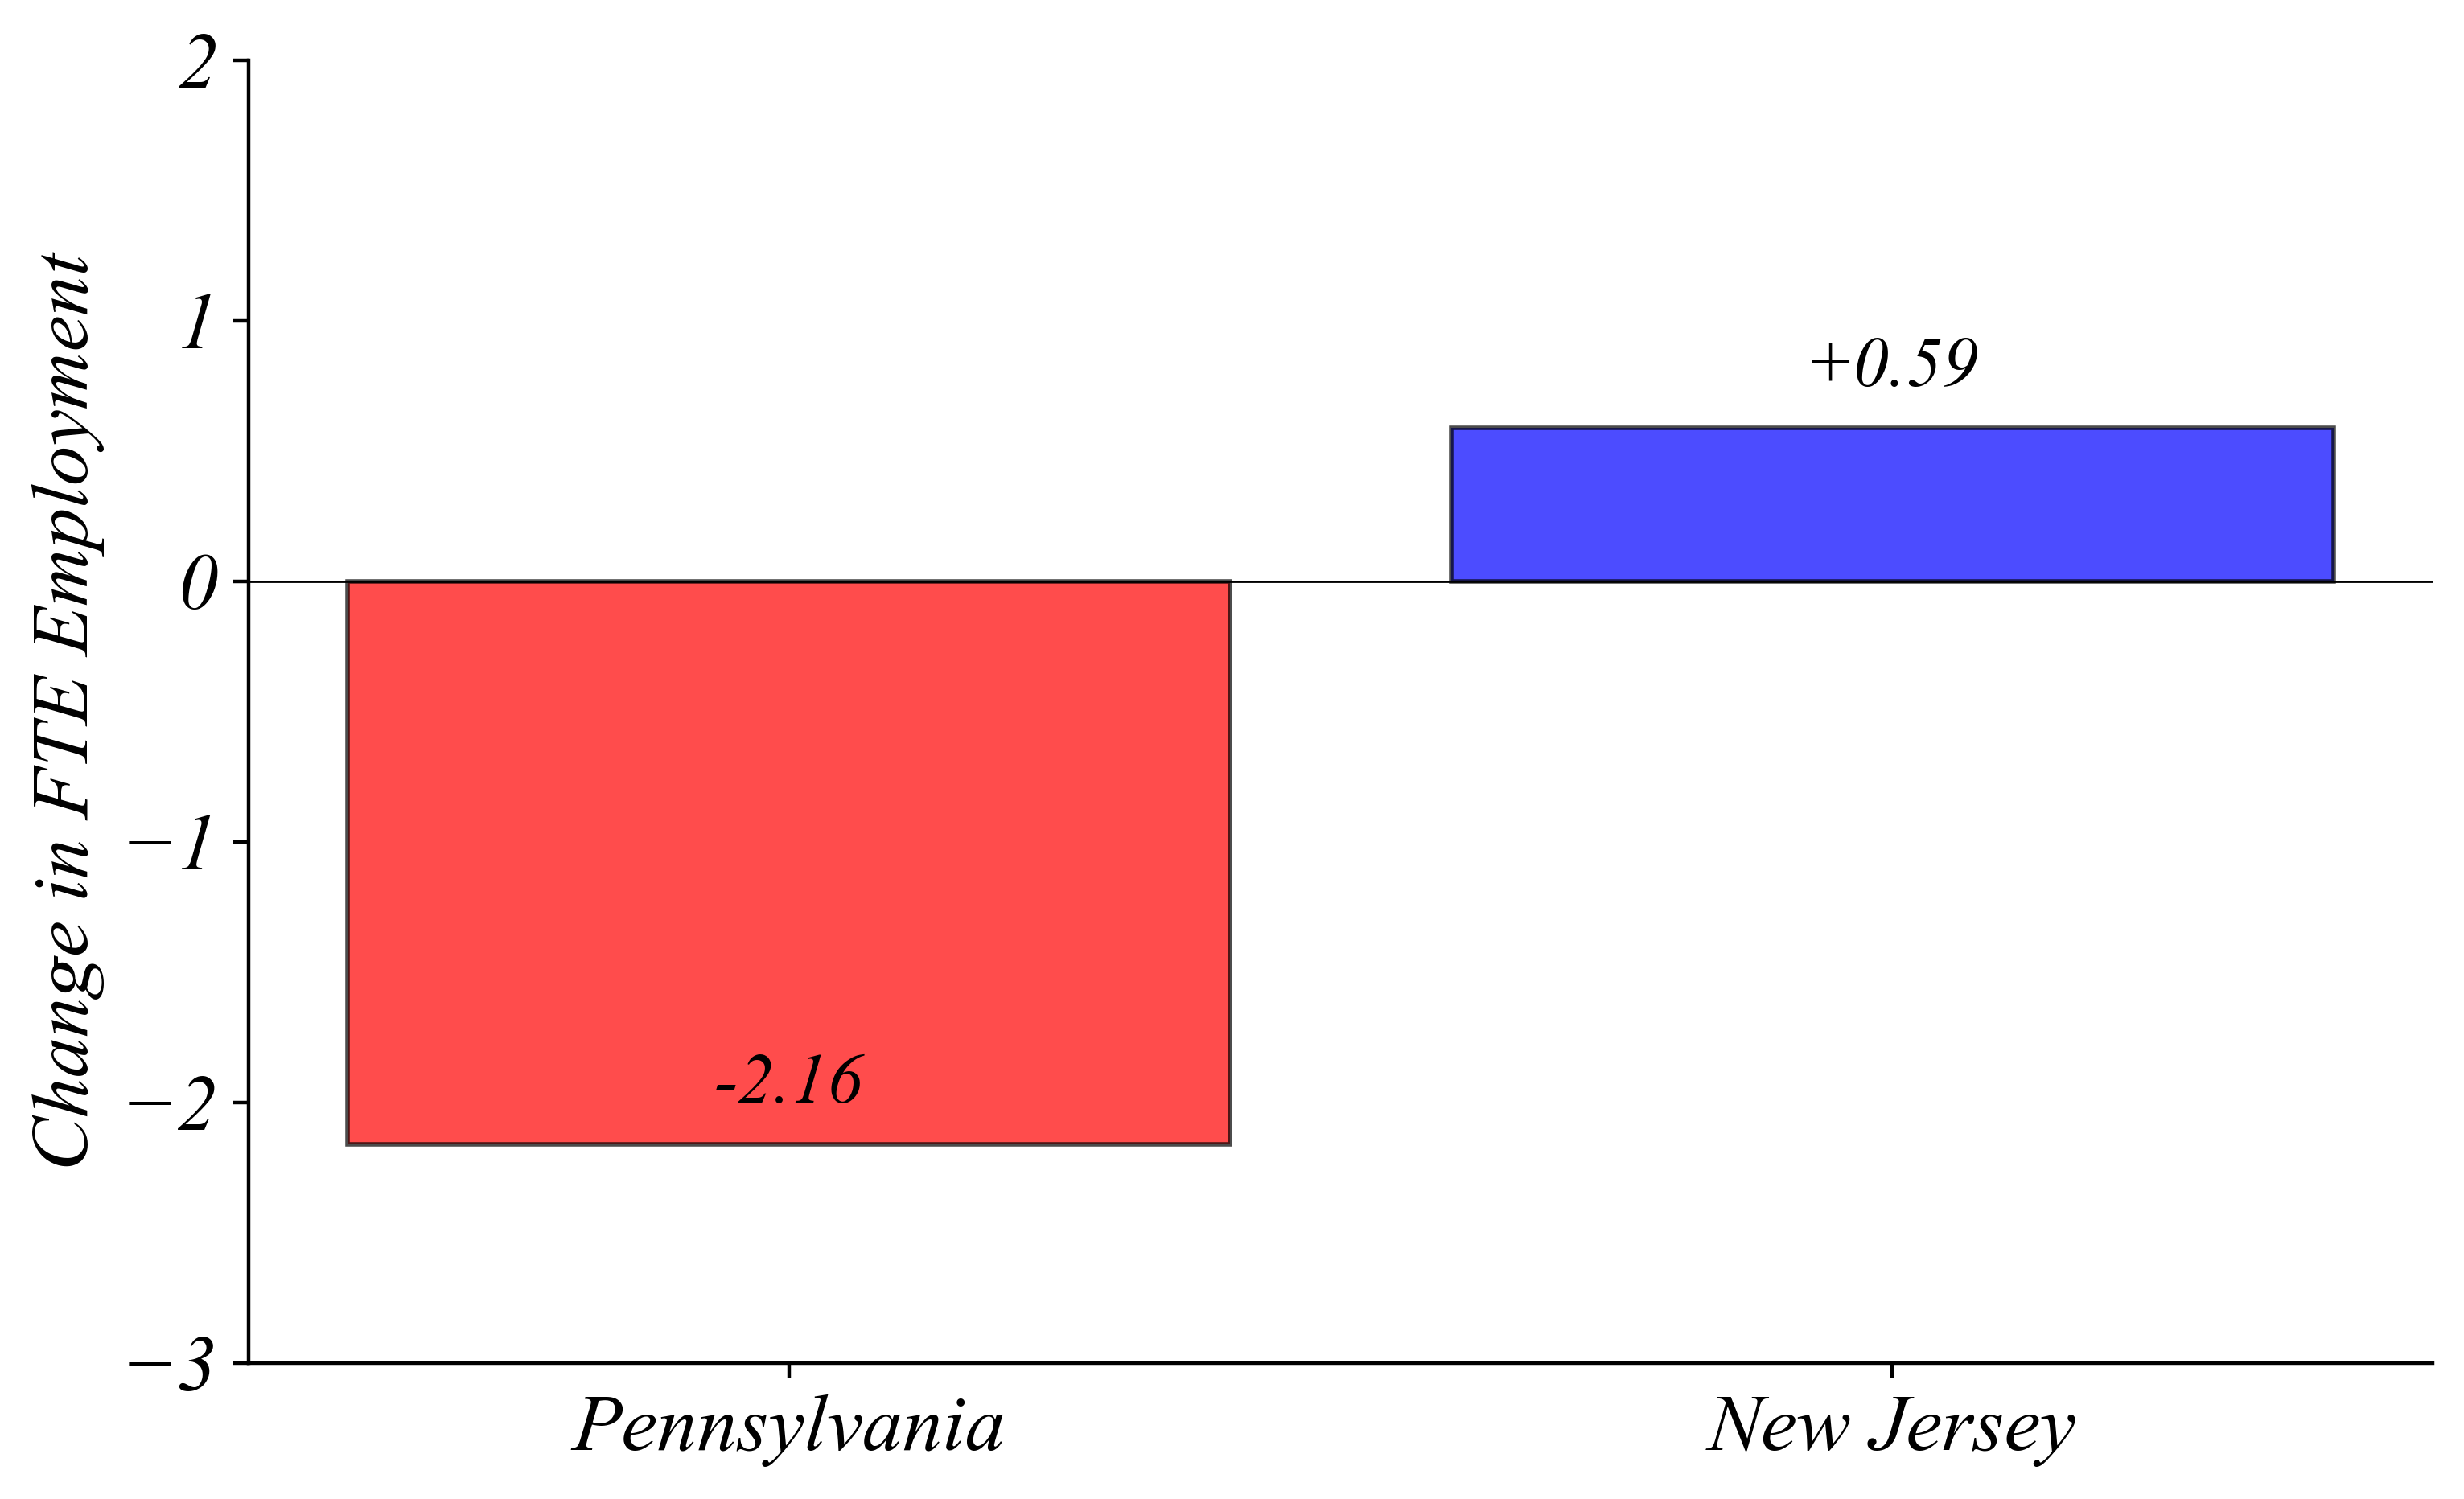

In [74]:
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 18,
    'font.style': 'italic'
})

fig, ax = plt.subplots(figsize=(8, 5), dpi=400)

states = ['Pennsylvania', 'New Jersey']
changes = [-2.16, 0.59]
colors = ['red', 'blue']

bars = ax.bar(states, changes, color=colors, alpha=0.7, edgecolor='black')
ax.axhline(0, color='black', linewidth=0.5)
ax.set_ylabel('Change in FTE Employment')

for bar, change in zip(bars, changes):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{change:+.2f}', ha='center', va='bottom', fontsize=16)

ax.set_ylim(-3, 2)

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig('i/fig_employment_changes.png', dpi=150, facecolor='white')
plt.show()

## Figure 9: Wage Distribution (Card & Krueger Figure 1)

In [ ]:
# Data extracted from Card & Krueger (1994) Figure 1
# Wage ranges (bins)
wages = ['4.25', '4.35', '4.45', '4.55', '4.65', '4.75', '4.85', '4.95', '5.05', '5.15', '5.25', '5.35', '5.45', '5.55']

# February 1992 (Wave 1) - before minimum wage increase
nj_feb = [30, 2, 2, 3, 3, 15, 3, 3, 23, 3, 5, 2, 2, 3]
pa_feb = [33, 2, 2, 3, 2, 17, 3, 2, 18, 2, 5, 2, 3, 3]

# November 1992 (Wave 2) - after minimum wage increase
nj_nov = [0, 0, 0, 0, 0, 0, 0, 0, 85, 5, 5, 2, 1, 1]
pa_nov = [30, 2, 2, 3, 2, 17, 3, 3, 2, 3, 5, 2, 2, 2]

x = np.arange(len(wages))
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# February 1992 panel
bars1_nj = ax1.bar(x - width/2, nj_feb, width, label='New Jersey', color='#2c3e50', edgecolor='black')
bars1_pa = ax1.bar(x + width/2, pa_feb, width, label='Pennsylvania', color='white', edgecolor='black', hatch='///')

ax1.set_ylabel('Percent of Stores', fontsize=12)
ax1.set_title('February 1992', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(wages)
ax1.set_xlabel('Wage Range', fontsize=12)
ax1.set_ylim(0, 35)
ax1.set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
ax1.legend(loc='upper right')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# November 1992 panel
bars2_nj = ax2.bar(x - width/2, nj_nov, width, label='New Jersey', color='#2c3e50', edgecolor='black')
bars2_pa = ax2.bar(x + width/2, pa_nov, width, label='Pennsylvania', color='white', edgecolor='black', hatch='///')

ax2.set_ylabel('Percent of Stores', fontsize=12)
ax2.set_title('November 1992', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(wages)
ax2.set_xlabel('Wage Range', fontsize=12)
ax2.set_ylim(0, 90)
ax2.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax2.legend(loc='upper right')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('i/fig_wage_distribution.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## Exercise 0 Figures

These figures are used in Exercise 0 to visualize the different data types and structures.

In [4]:
# Exercise figures setup
import pandas as pd
import seaborn as sns

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 16,
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'font.style': 'italic',
    'figure.dpi': 400   
})

file_path = 'data/'

### i_01: Binary Data (Employment Status)
Q2 visualization - dataset2.csv

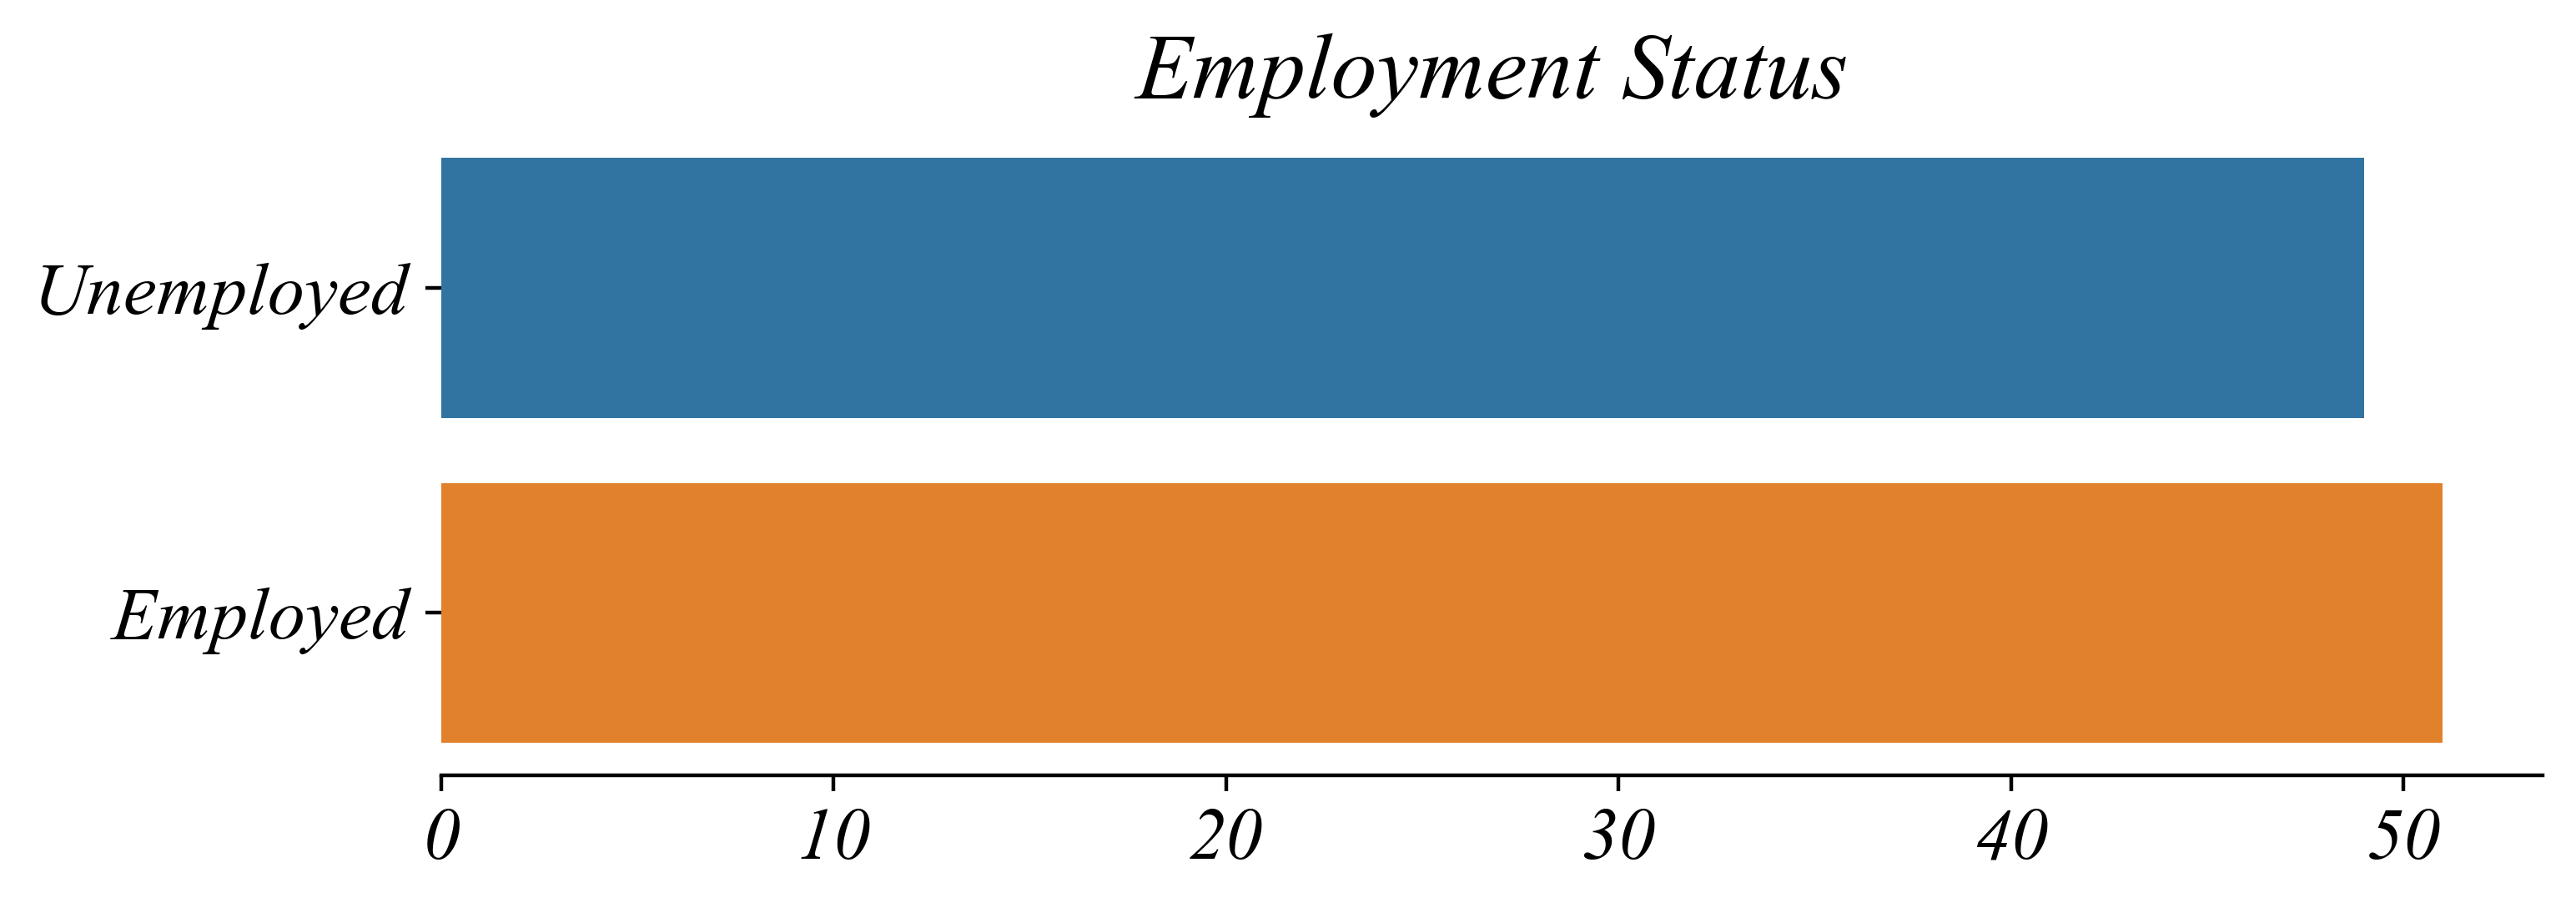

In [5]:
# Load Dataset - Binary (Employment Status)
binary = pd.read_csv(file_path + 'dataset2.csv')

# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.countplot(binary, y='Employment Status', hue='Employment Status')

# Style
plt.title("Employment Status")
plt.ylabel("")
plt.xlabel("")
sns.despine(left=True, right=True, top=True)
plt.grid(False)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_01.png')

### i_02: Nominal Data (Employment Sector)
Q5 visualization - dataset5.csv

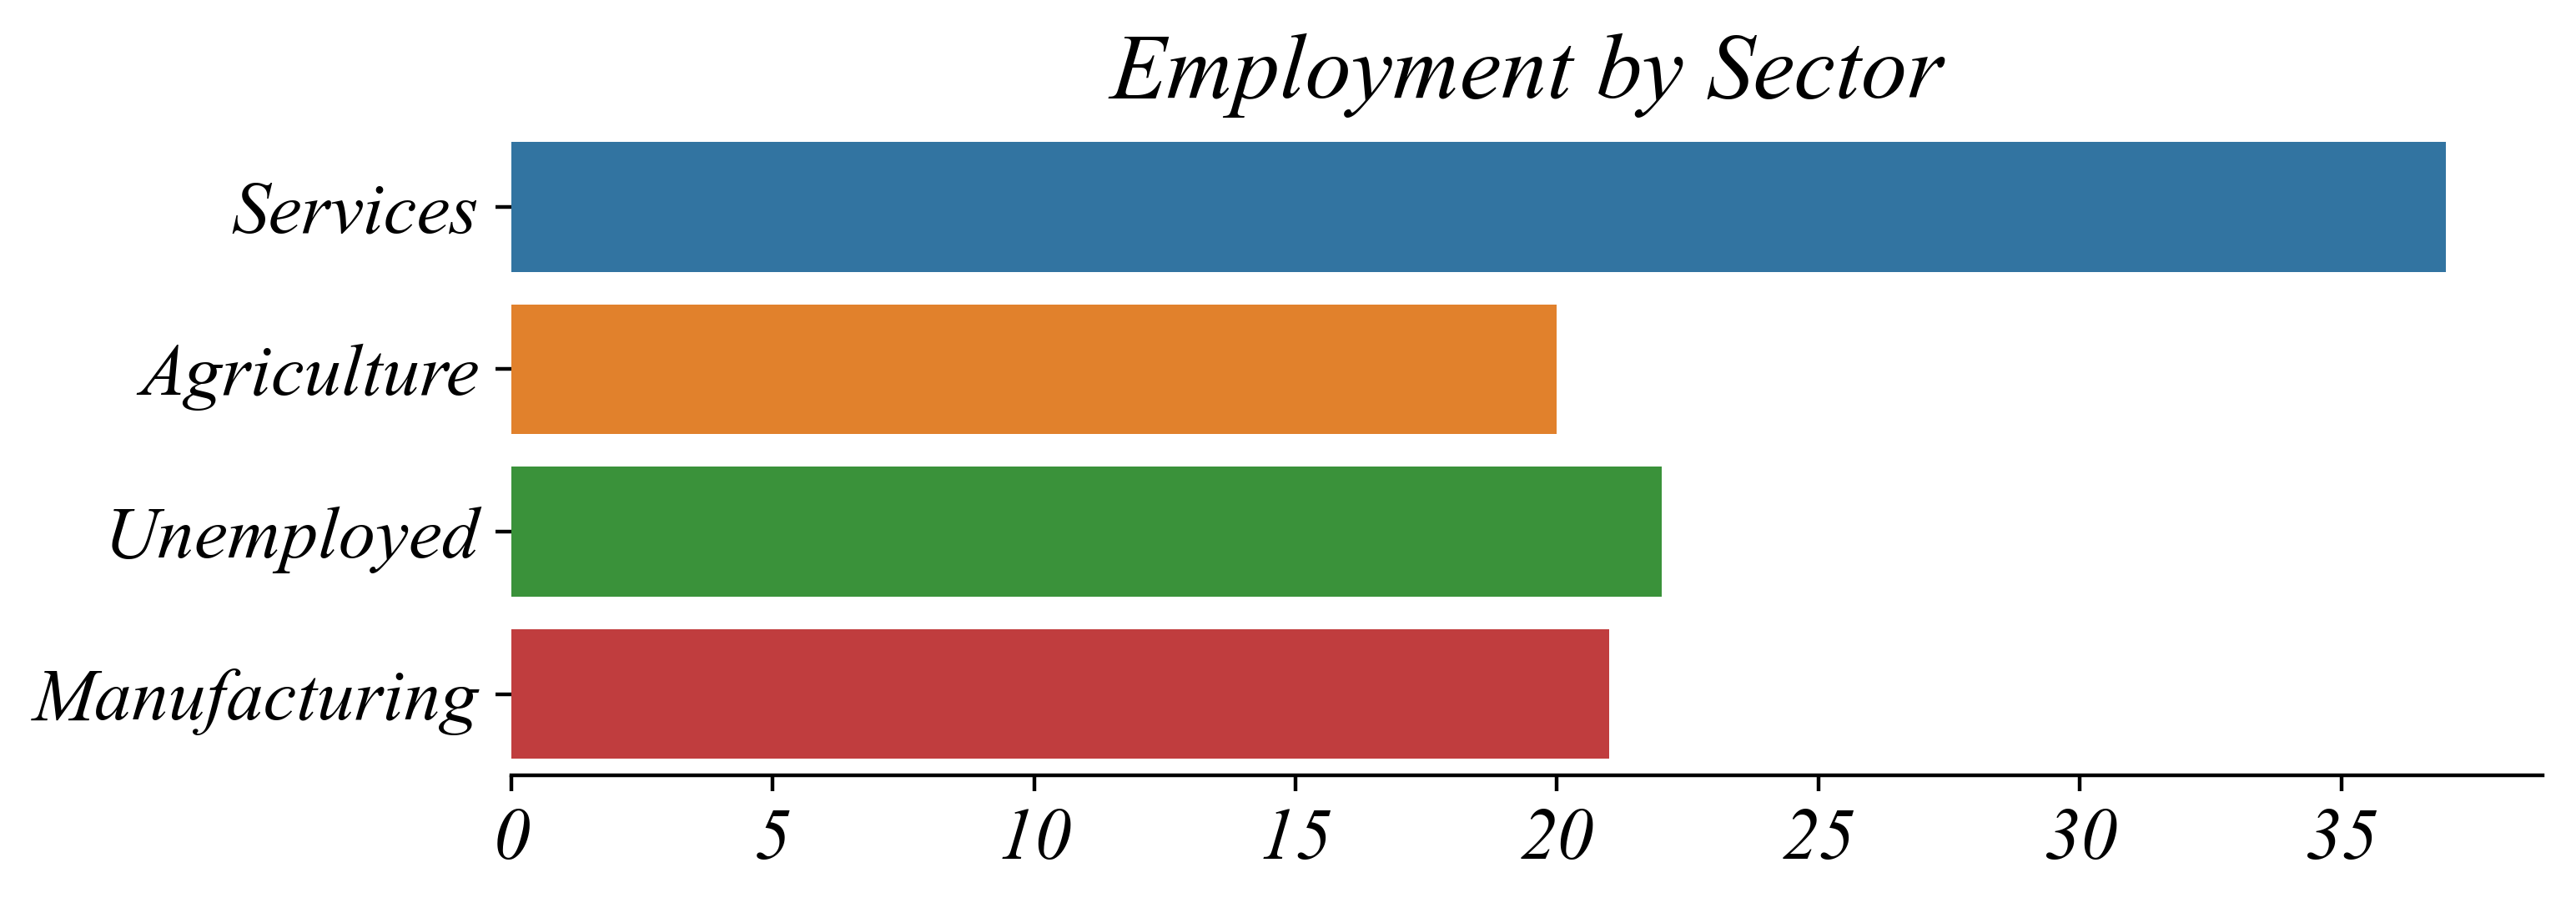

In [6]:
# Load Dataset - Nominal (Employment Sector)
nominal = pd.read_csv(file_path + 'dataset5.csv')

# Figure
plt.figure(figsize=(8, 3))
sns.countplot(nominal, y='Sector', hue='Sector')

# Style
plt.title('Employment by Sector')
plt.ylabel("")
plt.xlabel("")
sns.despine(left=True, right=True, top=True)
plt.grid(False)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_02.png')

### i_03: Ordinal Data (Economic Optimism)
Q4 visualization - dataset4.csv

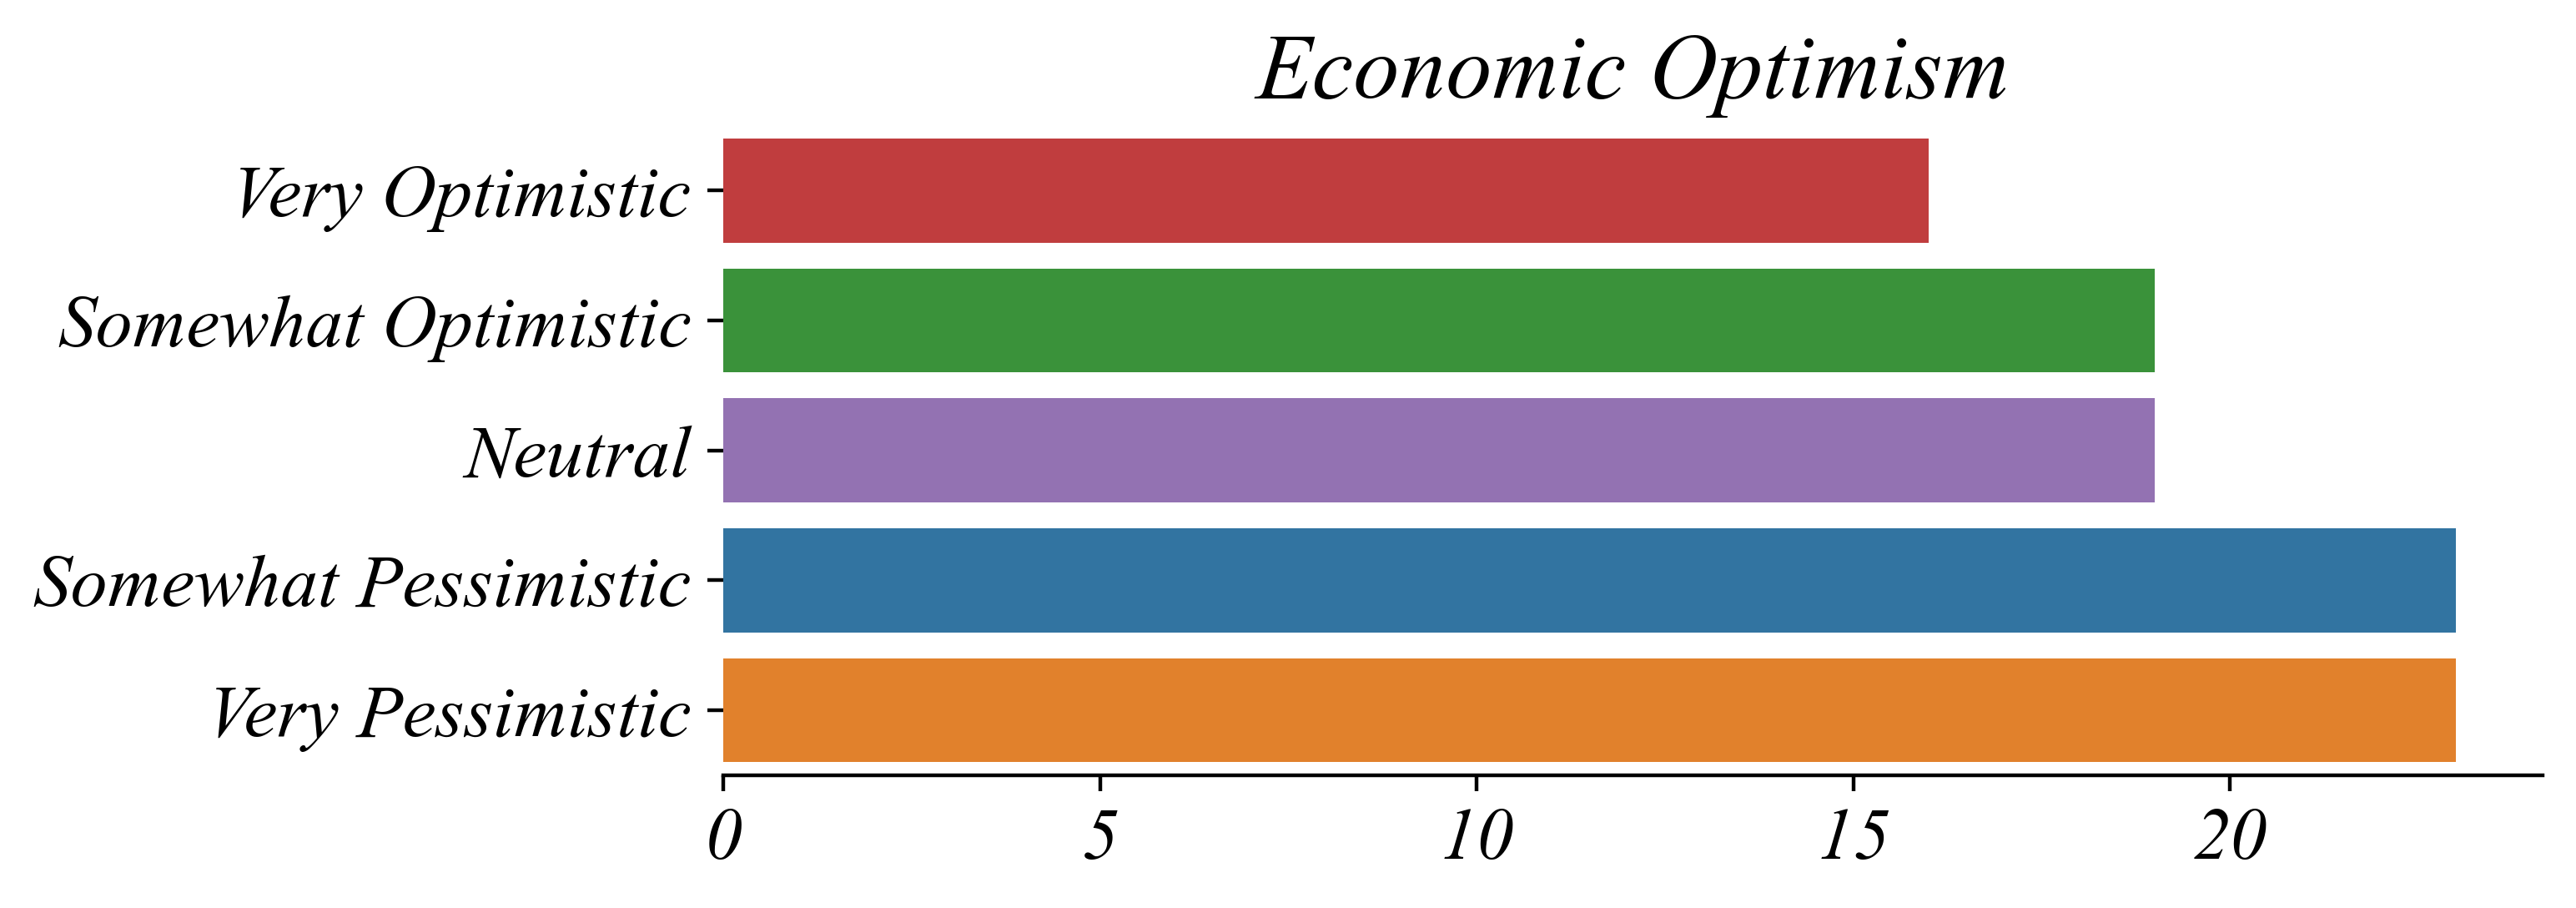

In [7]:
# Load Dataset - Ordinal (Economic Optimism)
optimism = pd.read_csv(file_path + 'dataset4.csv')

# Figure
plt.figure(figsize=(8, 3))
order = [
    'Very Optimistic',
    'Somewhat Optimistic',
    'Neutral',
    'Somewhat Pessimistic', 
    'Very Pessimistic', 
]
sns.countplot(optimism, y='Economic Optimism', hue='Economic Optimism', order=order)

# Style
plt.title('Economic Optimism')
plt.ylabel("")
plt.xlabel("")
sns.despine(left=True, right=True, top=True)
plt.grid(False)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_03.png')

### i_08: Panel Data (Household Income by Year)
Q3 visualization - dataset3.csv

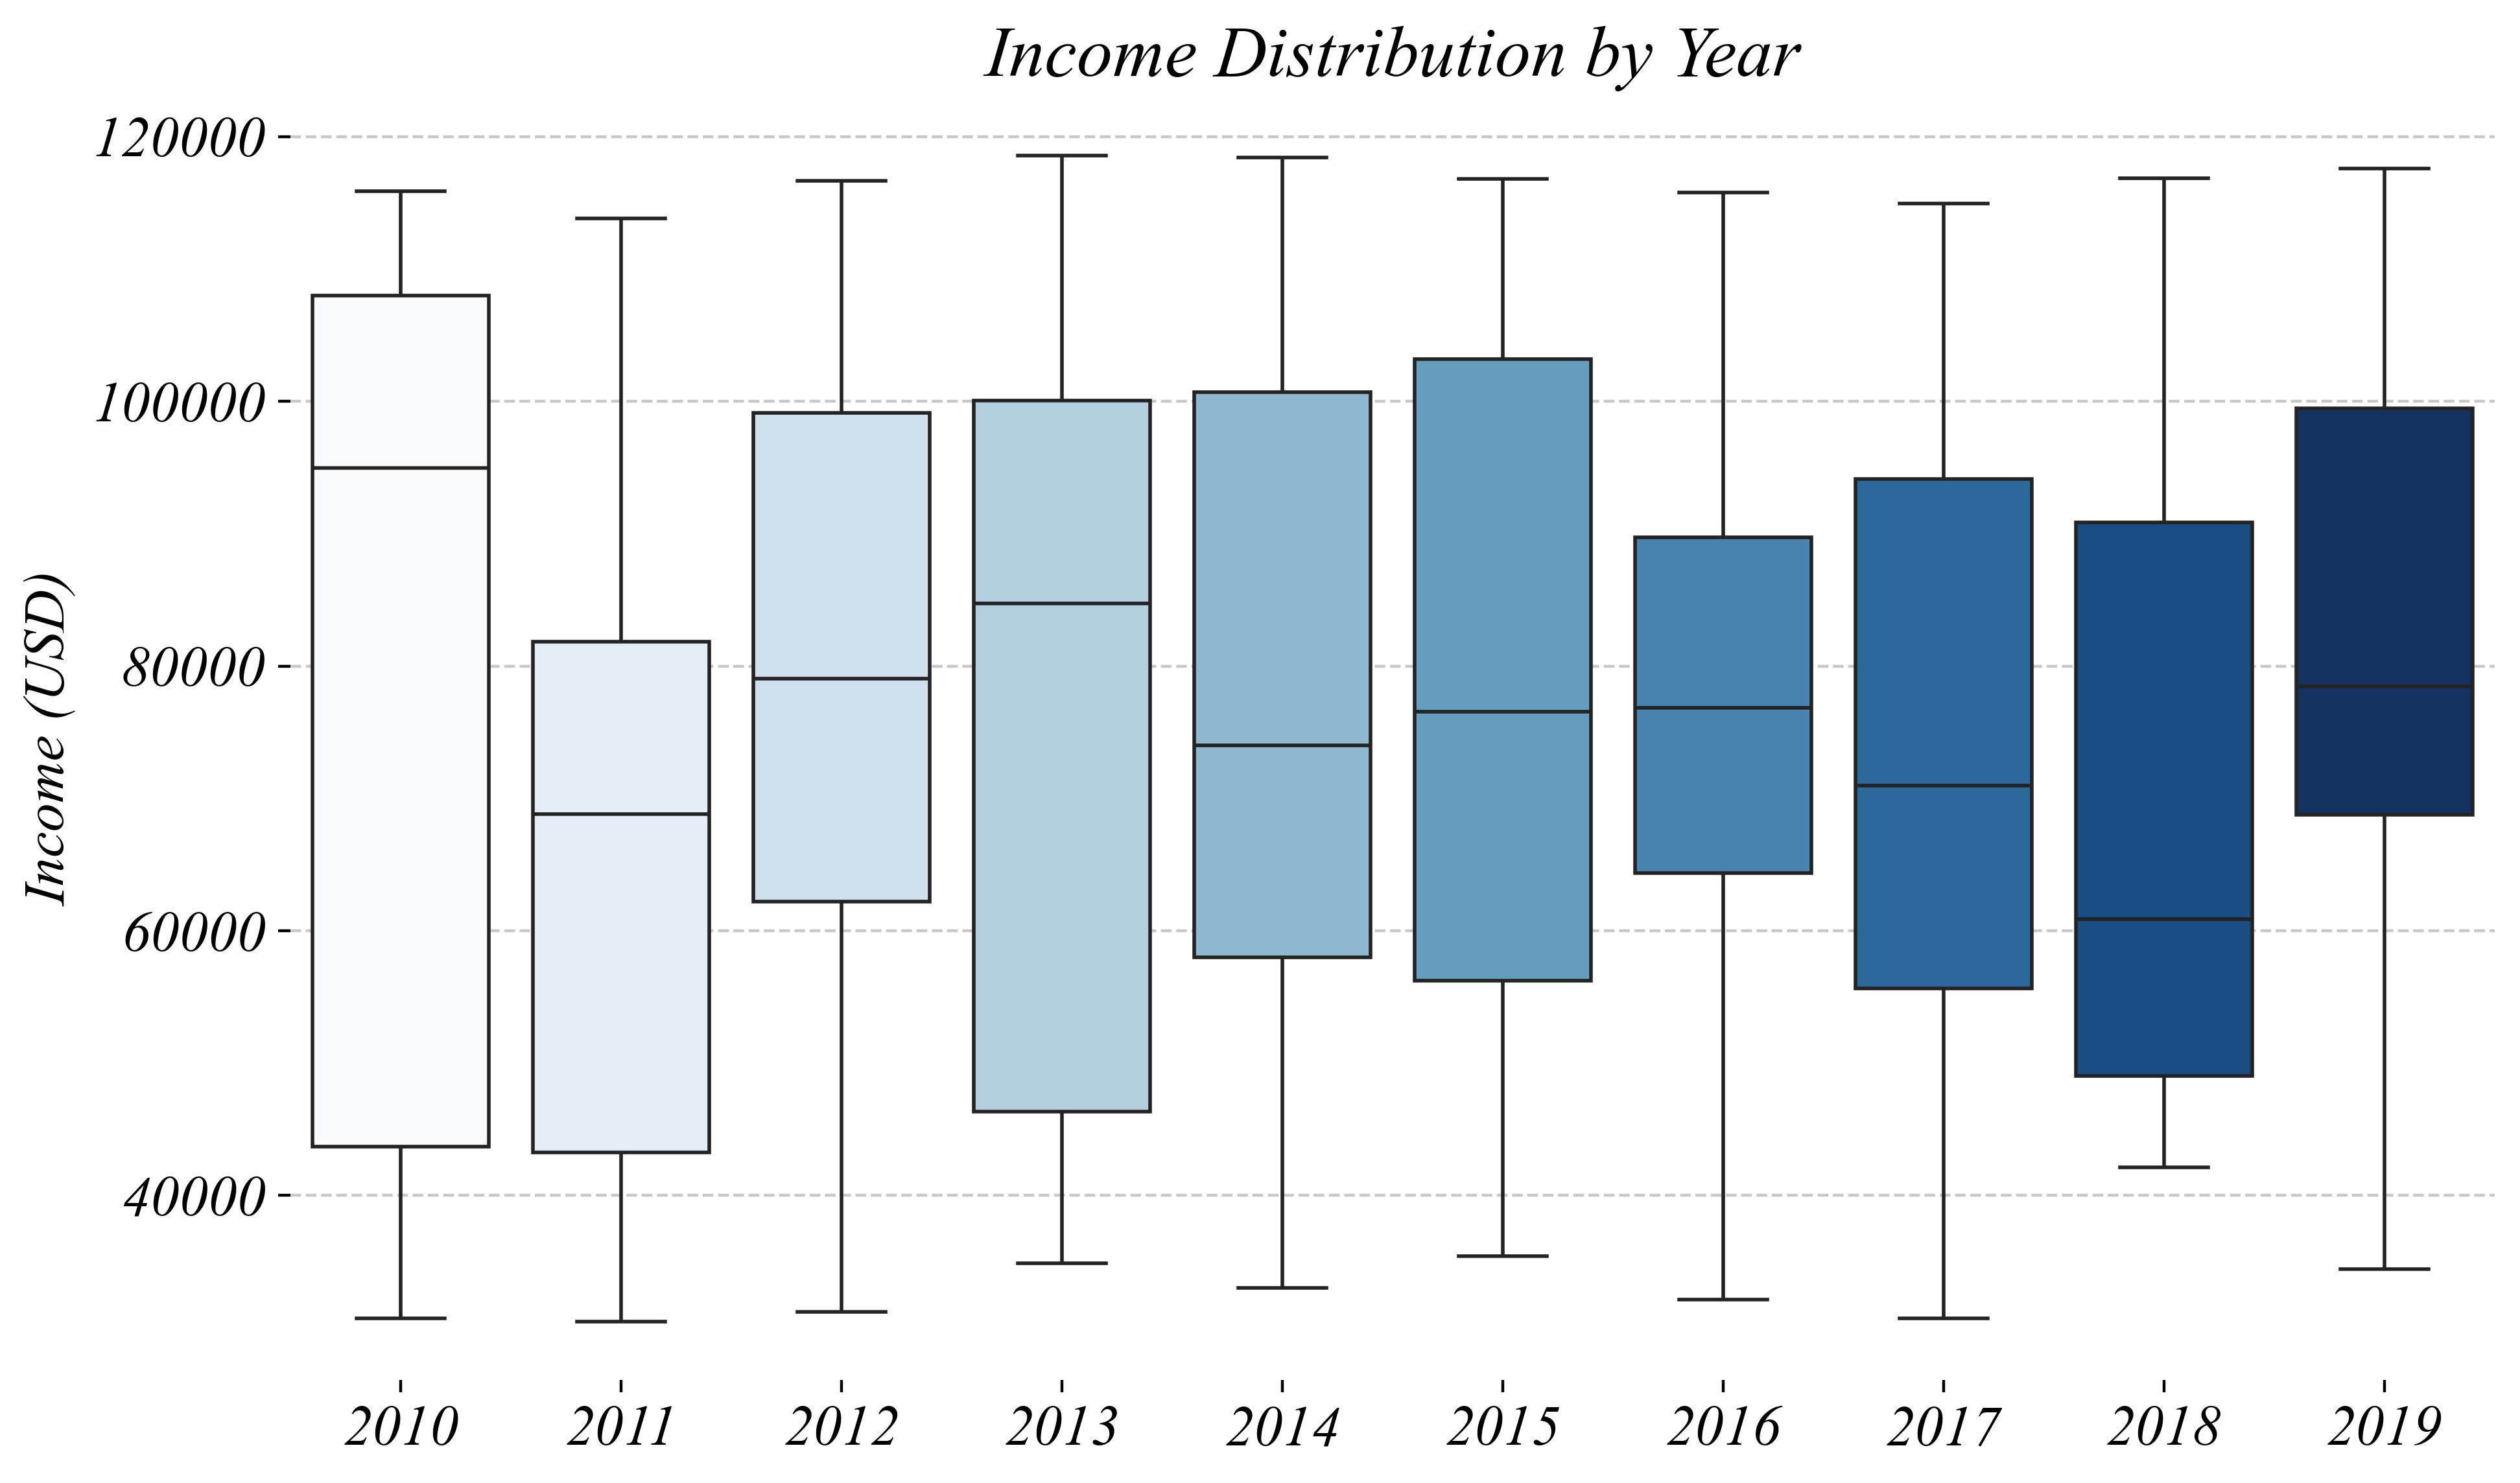

In [8]:
# Load Dataset - Panel Data (Household Income)
panel = pd.read_csv(file_path + 'dataset3.csv')

# Figure
plt.figure(figsize=(10, 6))
sns.boxplot(data=panel, x='Year', y='Income (USD)', hue='Year', palette='Blues', legend=False)

# Styling
plt.title("Income Distribution by Year")
plt.xlabel("")
plt.ylabel("Income (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, right=True, top=True, bottom=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_08.png')

### i_10: Time Series Data (US Real GDP)
Q1 visualization - dataset1.csv

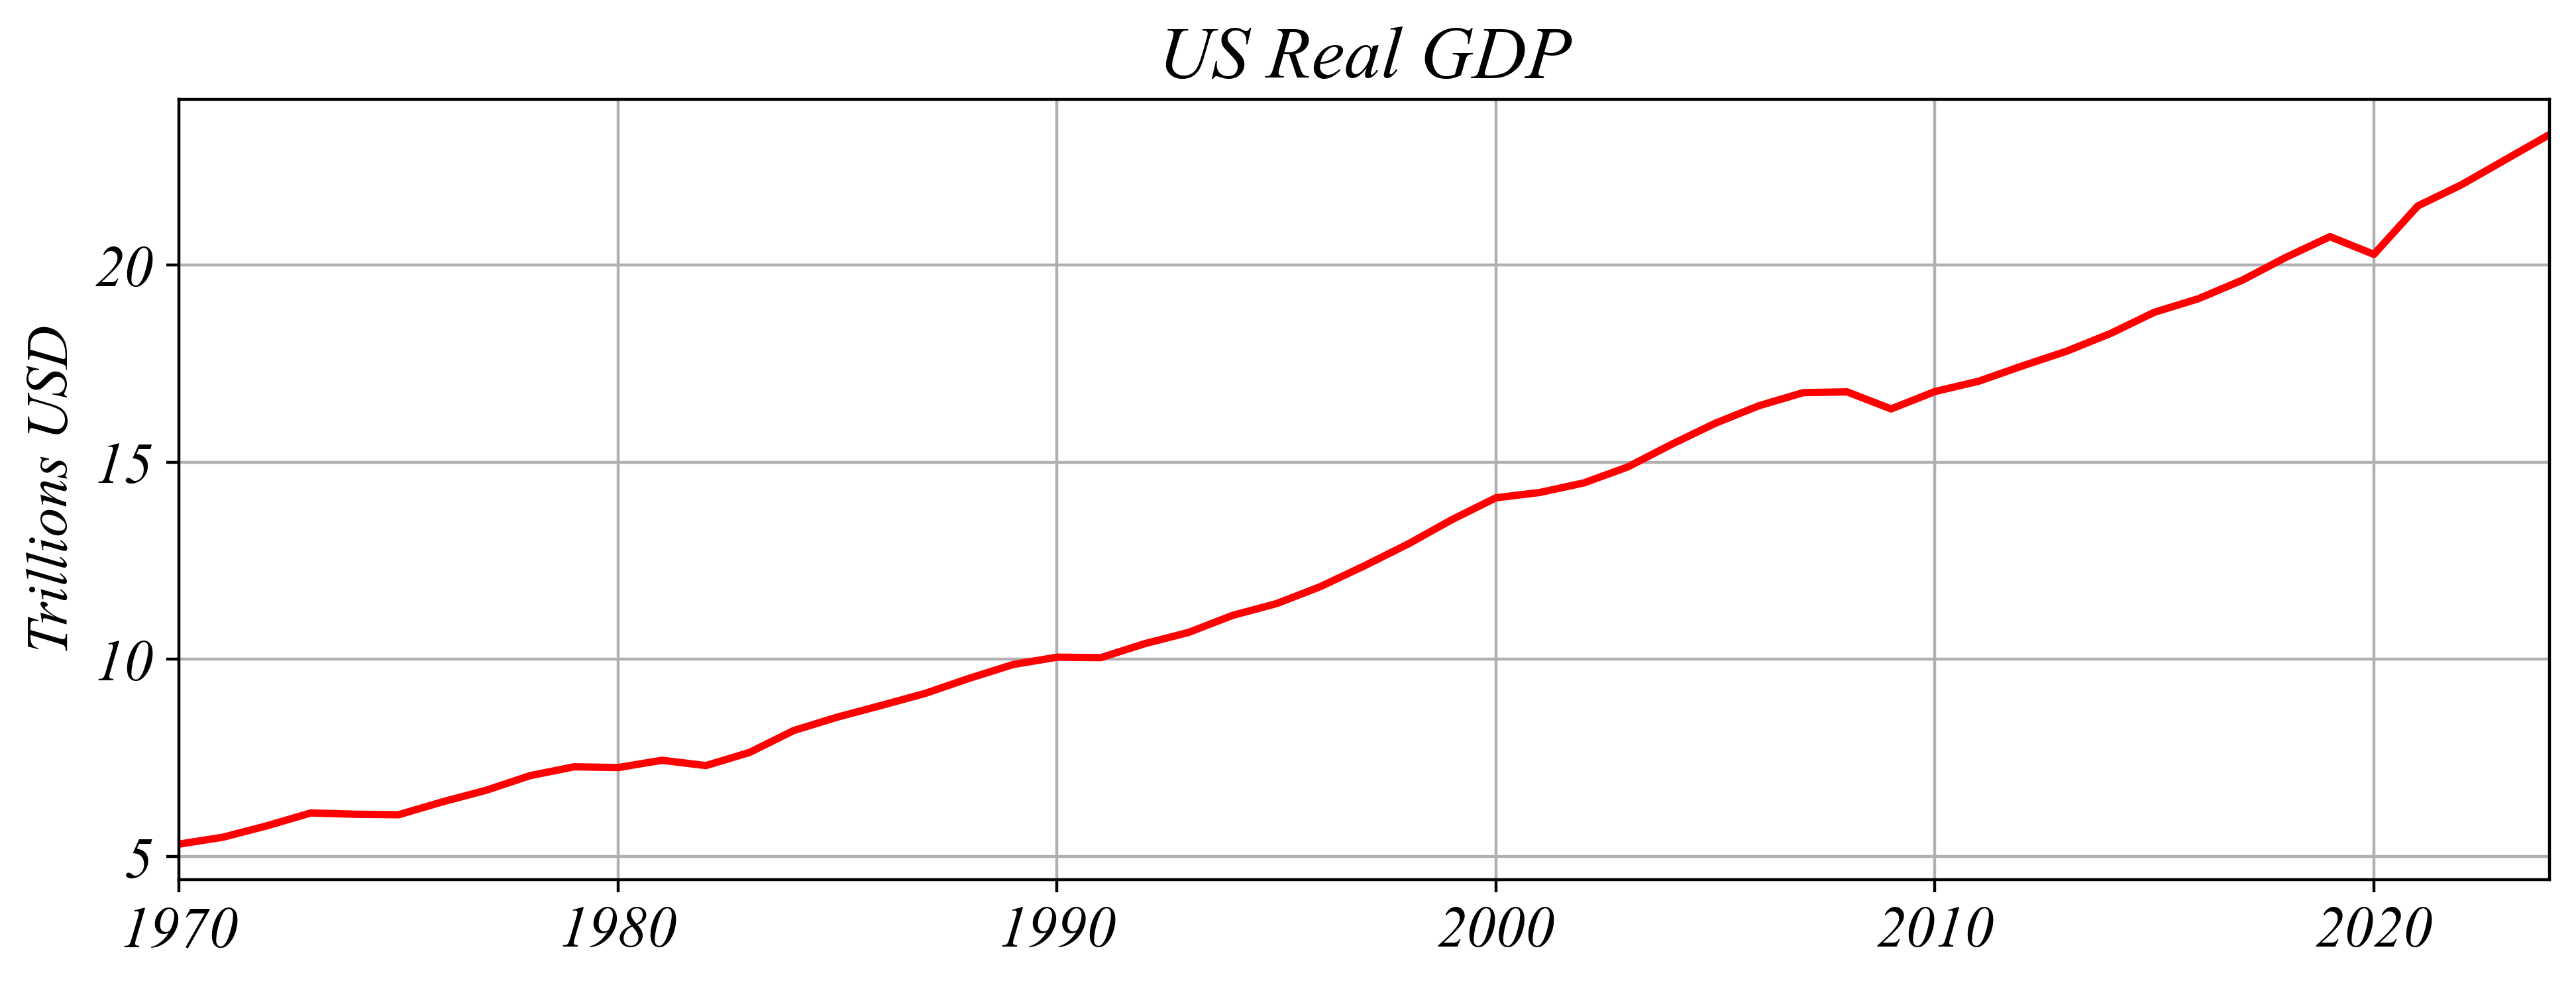

In [9]:
# Load Dataset - Time Series (US Real GDP)
time_series = pd.read_csv(file_path + 'dataset1.csv')

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(x=time_series['Year'], y=time_series['Real_GDP'], color='red', linewidth=2)

# Styling
plt.title('US Real GDP')
plt.xlabel('')
plt.xlim(time_series['Year'].min(), time_series['Year'].max())
plt.ylabel('Trillions USD')
plt.grid(True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_10.png')